In [ ]:
from matplotlib import pyplot as plt

# subtask1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


data preparation for task 1 region-Brunei neural net for weather data generation

In [ ]:
import pandas as pd
df_b_test = pd.read_csv('/content/drive/MyDrive/Task 1/Brunei/Testing/bn_test_airquality.csv')
df_b_train_airq = pd.read_csv('/content/drive/MyDrive/Task 1/Brunei/Training/bn_train_airquality.csv')
df_b_train_station = pd.read_csv('/content/drive/MyDrive/Task 1/Brunei/Training/bn_train_station.csv')
df_b_train_weather = pd.read_csv('/content/drive/MyDrive/Task 1/Brunei/Training/bn_train_weather.csv')

In [ ]:
k = df_b_train_station.groupby(['DISTRICT','ID'])
print(k.first())

                                                                NAME  ...   LONGITUDE
DISTRICT     ID                                                       ...            
Belait       302B              Mumong Air Quality Monitoring Station  ...  114.233096
             AWS9                       Sungai Liang Weather Station  ...  114.489167
Brunei-Muara 101B            Anggerek Air Quality Monitoring Station  ...  114.933330
             AWS1                       Brunei International Airport  ...  114.923664
Temburong    401B   Taman Batang Duri Air Quality Monitoring Station  ...  115.121521
             AWS12                      Pekan Bangar Weather Station  ...  115.068611
Tutong       201B       Bukit Bendera Air Quality Monitoring Station  ...  114.660166
             AWS6                             Sinaut Weather Station  ...  114.740278

[8 rows x 4 columns]


In [ ]:
kk = k['ID'].apply(list).groupby(level=0).apply(list)
l = []
for n,i in enumerate(kk):
  l1 = []
  for j in i:
    l1.append(j[0])
  # l1.append(n)
  l.append(l1)
print(l)
ll = dict()
for n,i in enumerate(l):
  for j in i:
    ll[j] = n
print(ll)

[['302B', 'AWS9'], ['101B', 'AWS1'], ['401B', 'AWS12'], ['201B', 'AWS6']]
{'302B': 0, 'AWS9': 0, '101B': 1, 'AWS1': 1, '401B': 2, 'AWS12': 2, '201B': 3, 'AWS6': 3}


In [ ]:
df_b_train_airq["PM10"] = pd.to_numeric(df_b_train_airq["PM10"], errors='coerce')
df_b_train_airq["PM10"] = df_b_train_airq["PM10"].fillna(df_b_train_airq.groupby(["Y","M","D"])["PM10"].transform('mean'))
df_b_train_airq = df_b_train_airq.replace({"ID": ll})
df_b_train_airq

,ID,Y,M,D,PM10
0,1,2010,1,1,19.0
1,3,2010,1,1,19.0
2,0,2010,1,1,19.0
3,2,2010,1,1,19.0
4,1,2010,1,2,17.0
...,...,...,...,...,...
11683,2,2017,12,30,11.2
11684,1,2017,12,31,13.9
11685,3,2017,12,31,17.1
11686,0,2017,12,31,17.7


In [ ]:
df_b_train_weather["TEMP"] = pd.to_numeric(df_b_train_weather["TEMP"], errors='coerce')
df_b_train_weather["TEMP"] = df_b_train_weather["TEMP"].fillna(df_b_train_weather.groupby(["Y","M","D"])["TEMP"].transform('mean'))
df_b_train_weather["HUM"] = pd.to_numeric(df_b_train_weather["HUM"], errors='coerce')
df_b_train_weather["HUM"] = df_b_train_weather["HUM"].fillna(df_b_train_weather.groupby(["Y","M","D"])["HUM"].transform('mean'))
df_b_train_weather["RAIN"] = pd.to_numeric(df_b_train_weather["RAIN"], errors='coerce')
df_b_train_weather["RAIN"] = df_b_train_weather["RAIN"].fillna(df_b_train_weather.groupby(["Y","M","D"])["RAIN"].transform('mean'))
for i in range(1,25):
  df_b_train_weather[f"WD{i}"] = pd.to_numeric(df_b_train_weather[f"WD{i}"], errors='coerce')
  df_b_train_weather[f"WD{i}"] = df_b_train_weather[f"WD{i}"].fillna(df_b_train_weather.groupby(["Y","M","D"])[f"WD{i}"].transform('mean'))
  df_b_train_weather[f"WS{i}"] = pd.to_numeric(df_b_train_weather[f"WS{i}"], errors='coerce')
  df_b_train_weather[f"WS{i}"] = df_b_train_weather[f"WS{i}"].fillna(df_b_train_weather.groupby(["Y","M","D"])[f"WS{i}"].transform('mean'))
df_b_train_weather2 = df_b_train_weather.replace({"ID": ll})
df_b_train_weather2 = df_b_train_weather2.dropna(how='any',axis=0)
df_b_train_weather2

,ID,Y,M,D,TEMP,HUM,RAIN,WD1,WS1,WD2,WS2,WD3,WS3,WD4,WS4,WD5,WS5,WD6,WS6,WD7,WS7,WD8,WS8,WD9,WS9,WD10,WS10,WD11,WS11,WD12,WS12,WD13,WS13,WD14,WS14,WD15,WS15,WD16,WS16,WD17,WS17,WD18,WS18,WD19,WS19,WD20,WS20,WD21,WS21,WD22,WS22,WD23,WS23,WD24,WS24
0,1,2010,1,1,28.0,82.200000,0.4,23.0,2.0,17.0,5.0,17.0,5.0,21.0,3.0,20.0,3.0,20.0,3.0,18.0,4.0,21.0,2.0,20.0,4.0,21.0,4.0,22.0,3.0,26.0,6.0,33.0,7.0,31.0,8.0,31.0,10.0,30.0,9.0,31.0,11.0,33.0,8.0,33.0,7.0,35.0,4.0,34.0,2.0,14.0,2.0,13.0,2.0,16.0,3.0
1,3,2010,1,1,27.9,85.700000,1.2,23.0,2.0,17.0,5.0,17.0,5.0,21.0,3.0,20.0,3.0,20.0,3.0,18.0,4.0,21.0,2.0,20.0,4.0,21.0,4.0,22.0,3.0,26.0,6.0,33.0,7.0,31.0,8.0,31.0,10.0,30.0,9.0,31.0,11.0,33.0,8.0,33.0,7.0,35.0,4.0,34.0,2.0,14.0,2.0,13.0,2.0,16.0,3.0
2,0,2010,1,1,27.4,85.900000,1.0,23.0,2.0,17.0,5.0,17.0,5.0,21.0,3.0,20.0,3.0,20.0,3.0,18.0,4.0,21.0,2.0,20.0,4.0,21.0,4.0,22.0,3.0,26.0,6.0,33.0,7.0,31.0,8.0,31.0,10.0,30.0,9.0,31.0,11.0,33.0,8.0,33.0,7.0,35.0,4.0,34.0,2.0,14.0,2.0,13.0,2.0,16.0,3.0
3,2,2010,1,1,26.8,89.000000,29.8,23.0,2.0,17.0,5.0,17.0,5.0,21.0,3.0,20.0,3.0,20.0,3.0,18.0,4.0,21.0,2.0,20.0,4.0,21.0,4.0,22.0,3.0,26.0,6.0,33.0,7.0,31.0,8.0,31.0,10.0,30.0,9.0,31.0,11.0,33.0,8.0,33.0,7.0,35.0,4.0,34.0,2.0,14.0,2.0,13.0,2.0,16.0,3.0
4,1,2010,1,2,28.2,92.900000,0.4,15.0,4.0,14.0,1.0,17.0,2.0,20.0,7.0,22.0,3.0,20.0,1.0,20.0,4.0,22.0,3.0,19.0,4.0,18.0,5.0,22.0,6.0,22.0,6.0,27.0,7.0,29.0,11.0,29.0,13.0,29.0,12.0,29.0,11.0,27.0,6.0,27.0,4.0,33.0,2.0,30.0,4.0,20.0,4.0,26.0,6.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,2,2017,12,30,27.4,83.033333,19.2,23.0,2.0,26.0,2.0,21.0,3.0,18.0,3.0,29.0,3.0,22.0,3.0,22.0,2.0,22.0,2.0,18.0,2.0,19.0,1.0,8.0,8.0,9.0,7.0,10.0,6.0,34.0,6.0,35.0,7.0,35.0,7.0,33.0,5.0,36.0,6.0,1.0,8.0,3.0,6.0,4.0,5.0,5.0,7.0,5.0,8.0,5.0,7.0
11684,1,2017,12,31,27.3,83.500000,3.0,5.0,5.0,5.0,4.0,3.0,4.0,5.0,4.0,7.0,3.0,16.0,3.0,10.0,2.0,19.0,2.0,9.0,1.0,2.0,5.0,4.0,6.0,1.0,5.0,2.0,6.0,33.0,8.0,34.0,7.0,35.0,5.0,1.0,3.0,5.0,4.0,7.0,5.0,9.0,3.0,10.0,2.0,15.0,3.0,33.0,1.0,16.0,4.0
11685,3,2017,12,31,26.5,83.500000,6.6,5.0,5.0,5.0,4.0,3.0,4.0,5.0,4.0,7.0,3.0,16.0,3.0,10.0,2.0,19.0,2.0,9.0,1.0,2.0,5.0,4.0,6.0,1.0,5.0,2.0,6.0,33.0,8.0,34.0,7.0,35.0,5.0,1.0,3.0,5.0,4.0,7.0,5.0,9.0,3.0,10.0,2.0,15.0,3.0,33.0,1.0,16.0,4.0
11686,0,2017,12,31,28.2,88.200000,5.0,5.0,5.0,5.0,4.0,3.0,4.0,5.0,4.0,7.0,3.0,16.0,3.0,10.0,2.0,19.0,2.0,9.0,1.0,2.0,5.0,4.0,6.0,1.0,5.0,2.0,6.0,33.0,8.0,34.0,7.0,35.0,5.0,1.0,3.0,5.0,4.0,7.0,5.0,9.0,3.0,10.0,2.0,15.0,3.0,33.0,1.0,16.0,4.0


In [ ]:
df_in = df_b_train_weather2.iloc[:, :4]
df_in

,ID,Y,M,D
0,1,2010,1,1
1,3,2010,1,1
2,0,2010,1,1
3,2,2010,1,1
4,1,2010,1,2
...,...,...,...,...
11683,2,2017,12,30
11684,1,2017,12,31
11685,3,2017,12,31
11686,0,2017,12,31


In [ ]:
df_out = df_b_train_weather2.iloc[:, 4:]
df_out

,TEMP,HUM,RAIN,WD1,WS1,WD2,WS2,WD3,WS3,WD4,WS4,WD5,WS5,WD6,WS6,WD7,WS7,WD8,WS8,WD9,WS9,WD10,WS10,WD11,WS11,WD12,WS12,WD13,WS13,WD14,WS14,WD15,WS15,WD16,WS16,WD17,WS17,WD18,WS18,WD19,WS19,WD20,WS20,WD21,WS21,WD22,WS22,WD23,WS23,WD24,WS24
0,28.0,82.200000,0.4,23.0,2.0,17.0,5.0,17.0,5.0,21.0,3.0,20.0,3.0,20.0,3.0,18.0,4.0,21.0,2.0,20.0,4.0,21.0,4.0,22.0,3.0,26.0,6.0,33.0,7.0,31.0,8.0,31.0,10.0,30.0,9.0,31.0,11.0,33.0,8.0,33.0,7.0,35.0,4.0,34.0,2.0,14.0,2.0,13.0,2.0,16.0,3.0
1,27.9,85.700000,1.2,23.0,2.0,17.0,5.0,17.0,5.0,21.0,3.0,20.0,3.0,20.0,3.0,18.0,4.0,21.0,2.0,20.0,4.0,21.0,4.0,22.0,3.0,26.0,6.0,33.0,7.0,31.0,8.0,31.0,10.0,30.0,9.0,31.0,11.0,33.0,8.0,33.0,7.0,35.0,4.0,34.0,2.0,14.0,2.0,13.0,2.0,16.0,3.0
2,27.4,85.900000,1.0,23.0,2.0,17.0,5.0,17.0,5.0,21.0,3.0,20.0,3.0,20.0,3.0,18.0,4.0,21.0,2.0,20.0,4.0,21.0,4.0,22.0,3.0,26.0,6.0,33.0,7.0,31.0,8.0,31.0,10.0,30.0,9.0,31.0,11.0,33.0,8.0,33.0,7.0,35.0,4.0,34.0,2.0,14.0,2.0,13.0,2.0,16.0,3.0
3,26.8,89.000000,29.8,23.0,2.0,17.0,5.0,17.0,5.0,21.0,3.0,20.0,3.0,20.0,3.0,18.0,4.0,21.0,2.0,20.0,4.0,21.0,4.0,22.0,3.0,26.0,6.0,33.0,7.0,31.0,8.0,31.0,10.0,30.0,9.0,31.0,11.0,33.0,8.0,33.0,7.0,35.0,4.0,34.0,2.0,14.0,2.0,13.0,2.0,16.0,3.0
4,28.2,92.900000,0.4,15.0,4.0,14.0,1.0,17.0,2.0,20.0,7.0,22.0,3.0,20.0,1.0,20.0,4.0,22.0,3.0,19.0,4.0,18.0,5.0,22.0,6.0,22.0,6.0,27.0,7.0,29.0,11.0,29.0,13.0,29.0,12.0,29.0,11.0,27.0,6.0,27.0,4.0,33.0,2.0,30.0,4.0,20.0,4.0,26.0,6.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,27.4,83.033333,19.2,23.0,2.0,26.0,2.0,21.0,3.0,18.0,3.0,29.0,3.0,22.0,3.0,22.0,2.0,22.0,2.0,18.0,2.0,19.0,1.0,8.0,8.0,9.0,7.0,10.0,6.0,34.0,6.0,35.0,7.0,35.0,7.0,33.0,5.0,36.0,6.0,1.0,8.0,3.0,6.0,4.0,5.0,5.0,7.0,5.0,8.0,5.0,7.0
11684,27.3,83.500000,3.0,5.0,5.0,5.0,4.0,3.0,4.0,5.0,4.0,7.0,3.0,16.0,3.0,10.0,2.0,19.0,2.0,9.0,1.0,2.0,5.0,4.0,6.0,1.0,5.0,2.0,6.0,33.0,8.0,34.0,7.0,35.0,5.0,1.0,3.0,5.0,4.0,7.0,5.0,9.0,3.0,10.0,2.0,15.0,3.0,33.0,1.0,16.0,4.0
11685,26.5,83.500000,6.6,5.0,5.0,5.0,4.0,3.0,4.0,5.0,4.0,7.0,3.0,16.0,3.0,10.0,2.0,19.0,2.0,9.0,1.0,2.0,5.0,4.0,6.0,1.0,5.0,2.0,6.0,33.0,8.0,34.0,7.0,35.0,5.0,1.0,3.0,5.0,4.0,7.0,5.0,9.0,3.0,10.0,2.0,15.0,3.0,33.0,1.0,16.0,4.0
11686,28.2,88.200000,5.0,5.0,5.0,5.0,4.0,3.0,4.0,5.0,4.0,7.0,3.0,16.0,3.0,10.0,2.0,19.0,2.0,9.0,1.0,2.0,5.0,4.0,6.0,1.0,5.0,2.0,6.0,33.0,8.0,34.0,7.0,35.0,5.0,1.0,3.0,5.0,4.0,7.0,5.0,9.0,3.0,10.0,2.0,15.0,3.0,33.0,1.0,16.0,4.0


neural network for data generation region-Brunei

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_in, df_out, test_size=0.1)
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())
print(normalizer(X_train).numpy())
print(y_train)
model = tf.keras.Sequential([
    # normalizer,
    tf.keras.layers.InputLayer(input_shape=(4)),
    layers.Dense(units=128),
    layers.Dense(units=256),
    layers.Dense(units=128),
    layers.Dense(units=51)
])
model.summary()
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mae')
k = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/IfW/nn1.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch"
)
history = model.fit(
    X_train, y_train,
    epochs=500,
    callbacks=[k],
    validation_data=(X_test,y_test))

[[1.5012306e+00 2.0135242e+03 6.7596946e+00 1.5775394e+01]]
[[-1.3409207   1.4938842   0.06943528  0.5940691 ]
 [-0.44770634  0.6343001   0.06943528  1.6174233 ]
 [ 0.44550797 -0.65507615 -0.50845665  0.7077751 ]
 ...
 [ 0.44550797  1.0640922   0.06943528 -0.31557906]
 [ 1.3387223  -0.65507615  0.35838127  0.36665708]
 [-1.3409207   1.0640922  -0.50845665 -0.9978152 ]]
tf.Tensor(
[[28.8        86.2         0.2        ...  2.          8.
   2.        ]
 [26.5        86.3        56.         ...  3.         19.
   6.        ]
 [27.6        83.4         0.2        ...  3.         18.
   4.        ]
 ...
 [28.93333333 89.          4.2        ...  3.         22.
   3.        ]
 [26.7        79.5         6.         ...  3.         17.
   2.        ]
 [29.9        78.          0.2        ...  1.         22.
   1.        ]], shape=(8535, 51), dtype=float64)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape          

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/IfW/nn1.h5')
model.predict(np.expand_dims(np.array([1,2010,12,31]),axis=0))

array([[27.375786 , 81.30421  ,  5.3497953, 19.070467 ,  2.9961762,
        19.522432 ,  2.9745307, 19.444523 ,  2.7643597, 19.607904 ,
         2.9485774, 19.394136 ,  2.9723127, 20.177256 ,  2.9096003,
        19.603336 ,  2.9933662, 18.72324  ,  3.035529 , 17.949568 ,
         4.0823064, 18.968885 ,  4.609214 , 21.11385  ,  4.7927194,
        22.573658 ,  5.958915 , 26.484367 ,  6.9637804, 28.039574 ,
         7.2536054, 28.218155 ,  7.576071 , 28.235296 ,  7.206062 ,
        28.05107  ,  5.781038 , 26.431982 ,  4.3489714, 24.19917  ,
         3.7199578, 19.298492 ,  3.0271988, 17.58462  ,  3.0108836,
        17.388327 ,  2.935681 , 18.24623  ,  3.0428088, 18.407482 ,
         3.039772 ]], dtype=float32)

neural network for Brunei PM10 pred

(11688, 4)
(11688,)
[[1.4910163e+00 2.0134926e+03 6.5229588e+00 1.5771650e+01]]
[[ 1.3525516   1.5335515  -1.6043997   0.93579495]
 [-1.3364468  -1.52704     0.7195716  -1.6799524 ]
 [-0.44011396 -0.65258527  0.7195716  -0.8838554 ]
 ...
 [-0.44011396  1.5335515  -0.44241405 -0.77012724]
 [-1.3364468   0.2218694   0.13857877 -0.2014865 ]
 [-1.3364468   0.2218694  -1.3139033  -1.5662242 ]]
tf.Tensor([11.   5.   7.4 ... 10.  20.2 21.4], shape=(10519,), dtype=float64)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 51)                73139     
_________________________________________________________________
dense_6 (Dense)              (None, 512)               26624     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
______________________________________________

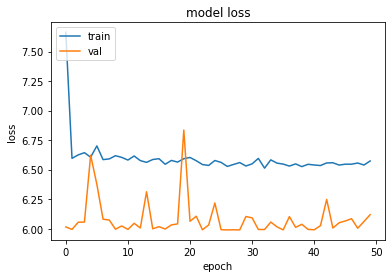

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

inp = df_b_train_airq.iloc[:, :4]
out = df_b_train_airq['PM10']
print(inp.shape)
print(out.shape)
X_train, X_test, y_train, y_test = train_test_split(inp, out, test_size=0.1)
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())
print(normalizer(X_train).numpy())
print(y_train)
model1 = tf.keras.models.load_model('/content/drive/MyDrive/IfW/nn1.h5')
for layer in model1.layers:
  layer.trainable = False
model = tf.keras.Sequential([
    # normalizer,
    tf.keras.layers.InputLayer(input_shape=(4)),
    model1,
    layers.Dense(units=512),
    layers.Dense(units=256),
    layers.Dense(units=128),
    layers.Dense(units=1)
])
model.summary()
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mae')
k = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/IfW/nn11.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch"
)
history = model.fit(
    X_train, y_train,
    epochs=50,
    callbacks=[k],
    validation_data=(X_test,y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/IfW/nn11.h5')
model.predict(np.expand_dims(np.array([1,2010,12,31]),axis=0))

array([[14.84324]], dtype=float32)

data preparation for task 1 region-Singapore neural net for weather data generation

In [ ]:
import pandas as pd
df_b_test = pd.read_csv('/content/drive/MyDrive/Task 1/Singapore/Testing/sg_test_airquality.csv')
df_b_train_airq = pd.read_csv('/content/drive/MyDrive/Task 1/Singapore/Training/sg_train_airquality.csv')
df_b_train_station = pd.read_csv('/content/drive/MyDrive/Task 1/Singapore/Training/sg_train_station.csv')
df_b_train_weather = pd.read_csv('/content/drive/MyDrive/Task 1/Singapore/Training/sg_train_weather.csv')

In [ ]:
li = ['North','East','West','South','Central']
o = [k for k,i in enumerate(df_b_train_station['REGION']) if i in li]
for idx in o:
  df_b_train_station.loc[idx,['NAME','REGION']] = df_b_train_station.loc[idx,['REGION','NAME']].values
df_b_train_station

,ID,NAME,TYPE,REGION,LATITUDE,LONGITUDE
0,1WS,West,Air Quality Monitoring Stations,"Lim Chu Kang, Choa Chu Kang, Bukit Panjang, Tu...",1.357350,103.700000
1,2ES,East,Air Quality Monitoring Stations,"Serangoon, Punggol, Hougang, Tampines, Pasir R...",1.357350,103.940000
2,3CS,Central,Air Quality Monitoring Stations,"Thomson, Marymount, Sin Ming, Ang Mo Kio, Bish...",1.357350,103.820000
3,4SS,South,Air Quality Monitoring Stations,"Holland, Queenstown, Bukit Merah, Telok Blanga...",1.295870,103.820000
4,5NS,North,Air Quality Monitoring Stations,"Admirality, Kranji, Woodlands, Sembawang, Yish...",1.418030,103.820000
5,S104,North,Weather Station,Admiralty,1.443867,103.785383
6,S106,East,Weather Station,Pulau Ubin,1.416800,103.967300
7,S116,South,Weather Station,Pasir Panjang,1.282350,103.754500
8,S44,West,Weather Station,Jurong West,1.345233,103.683333
9,S109,Central,Weather Station,Ang Mo Kio,1.379267,103.850017


In [ ]:
k = df_b_train_station.groupby(['NAME','ID'])
print(k.first())

                                         TYPE  ...   LONGITUDE
NAME    ID                                     ...            
Central 3CS   Air Quality Monitoring Stations  ...  103.820000
        S109                  Weather Station  ...  103.850017
East    2ES   Air Quality Monitoring Stations  ...  103.940000
        S106                  Weather Station  ...  103.967300
North   5NS   Air Quality Monitoring Stations  ...  103.820000
        S104                  Weather Station  ...  103.785383
South   4SS   Air Quality Monitoring Stations  ...  103.820000
        S116                  Weather Station  ...  103.754500
West    1WS   Air Quality Monitoring Stations  ...  103.700000
        S44                   Weather Station  ...  103.683333

[10 rows x 4 columns]


In [ ]:
kk = k['ID'].apply(list).groupby(level=0).apply(list)
l = []
for n,i in enumerate(kk):
  l1 = []
  for j in i:
    l1.append(j[0])
  # l1.append(n)
  l.append(l1)
print(l)
ll = dict()
for n,i in enumerate(l):
  for j in i:
    ll[j] = n
print(ll)

[['3CS', 'S109'], ['2ES', 'S106'], ['5NS', 'S104'], ['4SS', 'S116'], ['1WS', 'S44']]
{'3CS': 0, 'S109': 0, '2ES': 1, 'S106': 1, '5NS': 2, 'S104': 2, '4SS': 3, 'S116': 3, '1WS': 4, 'S44': 4}


In [ ]:
df_b_train_airq = df_b_train_airq.dropna(how='any',axis=0)
def func(x):
  r = x.split("-")
  return r[0], r[1], "".join(['20',r[2].strip()])

df_b_train_airq['D'], df_b_train_airq['M'], df_b_train_airq['Y'] = zip(*df_b_train_airq['DATE'].map(func))
df_b_train_airq.dtypes
df_b_train_airq

,ID,DATE,PM10_1,PM25_1,PM10_2,PM25_2,PM10_3,PM25_3,PM10_4,PM25_4,PM10_5,PM25_5,PM10_6,PM25_6,PM10_7,PM25_7,PM10_8,PM25_8,PM10_9,PM25_9,PM10_10,PM25_10,PM10_11,PM25_11,PM10_12,PM25_12,PM10_13,PM25_13,PM10_14,PM25_14,PM10_15,PM25_15,PM10_16,PM25_16,PM10_17,PM25_17,PM10_18,PM25_18,PM10_19,PM25_19,PM10_20,PM25_20,PM10_21,PM25_21,PM10_22,PM25_22,PM10_23,PM25_23,D,M,Y
11150,4SS,09-02-16,42.0,18.0,42.0,18.0,42.0,18.0,42.0,18.0,42.0,18.0,42.0,19.0,41.0,18.0,41.0,18.0,41.0,18.0,42.0,18.0,43.0,18.0,43.0,19.0,44.0,19.0,44.0,19.0,45.0,19.0,45.0,19.0,46.0,20.0,46.0,20.0,46.0,20.0,45.0,19.0,44.0,19.0,43.0,19.0,43.0,19.0,09,02,2016
11151,5NS,09-02-16,30.0,16.0,30.0,15.0,30.0,15.0,30.0,16.0,31.0,16.0,31.0,16.0,31.0,17.0,31.0,17.0,31.0,17.0,31.0,18.0,31.0,18.0,32.0,18.0,32.0,19.0,32.0,19.0,33.0,19.0,33.0,19.0,33.0,19.0,34.0,19.0,34.0,19.0,33.0,19.0,33.0,19.0,32.0,19.0,32.0,18.0,09,02,2016
11152,2ES,09-02-16,35.0,19.0,35.0,19.0,35.0,19.0,36.0,20.0,36.0,20.0,38.0,20.0,39.0,21.0,39.0,21.0,39.0,21.0,40.0,21.0,41.0,22.0,41.0,22.0,42.0,22.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,41.0,23.0,41.0,23.0,41.0,23.0,40.0,22.0,09,02,2016
11153,3CS,09-02-16,34.0,17.0,34.0,17.0,33.0,17.0,33.0,17.0,33.0,17.0,34.0,17.0,34.0,17.0,34.0,17.0,34.0,17.0,34.0,18.0,34.0,18.0,34.0,18.0,35.0,19.0,35.0,19.0,35.0,19.0,35.0,19.0,36.0,19.0,36.0,20.0,35.0,20.0,35.0,19.0,35.0,19.0,34.0,19.0,34.0,19.0,09,02,2016
11154,1WS,09-02-16,27.0,16.0,27.0,16.0,27.0,16.0,27.0,17.0,27.0,16.0,27.0,17.0,27.0,17.0,27.0,17.0,27.0,17.0,28.0,17.0,28.0,18.0,29.0,18.0,29.0,19.0,30.0,19.0,30.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,30.0,20.0,09,02,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,1WS,31-12-17,18.0,8.0,18.0,8.0,18.0,8.0,18.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,16.0,7.0,15.0,6.0,15.0,6.0,13.0,5.0,13.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,31,12,2017
14606,2ES,31-12-17,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,26.0,12.0,27.0,12.0,27.0,12.0,28.0,13.0,28.0,12.0,27.0,12.0,27.0,12.0,26.0,11.0,25.0,11.0,24.0,11.0,24.0,11.0,23.0,10.0,23.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,31,12,2017
14607,3CS,31-12-17,21.0,12.0,21.0,12.0,21.0,11.0,21.0,11.0,20.0,11.0,20.0,11.0,21.0,11.0,20.0,11.0,20.0,12.0,20.0,11.0,19.0,11.0,19.0,11.0,18.0,10.0,17.0,10.0,16.0,9.0,15.0,8.0,15.0,8.0,14.0,8.0,13.0,7.0,13.0,7.0,13.0,7.0,13.0,7.0,13.0,7.0,31,12,2017
14608,4SS,31-12-17,42.0,10.0,42.0,10.0,42.0,10.0,41.0,10.0,41.0,10.0,41.0,10.0,41.0,11.0,41.0,11.0,41.0,11.0,41.0,11.0,40.0,10.0,39.0,10.0,39.0,10.0,38.0,9.0,37.0,9.0,36.0,8.0,36.0,8.0,36.0,8.0,35.0,7.0,35.0,7.0,35.0,7.0,22.0,7.0,15.0,7.0,31,12,2017


In [ ]:
df_b_train_airq['Y'] = df_b_train_airq['Y'].apply(pd.to_numeric)
df_b_train_airq['M'] = df_b_train_airq['M'].apply(pd.to_numeric)
df_b_train_airq['D'] = df_b_train_airq['D'].apply(pd.to_numeric)
# df_b_train_airq.dtypes
df_b_train_airq = df_b_train_airq.drop('DATE', 1)
df_b_train_airq

,ID,PM10_1,PM25_1,PM10_2,PM25_2,PM10_3,PM25_3,PM10_4,PM25_4,PM10_5,PM25_5,PM10_6,PM25_6,PM10_7,PM25_7,PM10_8,PM25_8,PM10_9,PM25_9,PM10_10,PM25_10,PM10_11,PM25_11,PM10_12,PM25_12,PM10_13,PM25_13,PM10_14,PM25_14,PM10_15,PM25_15,PM10_16,PM25_16,PM10_17,PM25_17,PM10_18,PM25_18,PM10_19,PM25_19,PM10_20,PM25_20,PM10_21,PM25_21,PM10_22,PM25_22,PM10_23,PM25_23,D,M,Y
11150,4SS,42.0,18.0,42.0,18.0,42.0,18.0,42.0,18.0,42.0,18.0,42.0,19.0,41.0,18.0,41.0,18.0,41.0,18.0,42.0,18.0,43.0,18.0,43.0,19.0,44.0,19.0,44.0,19.0,45.0,19.0,45.0,19.0,46.0,20.0,46.0,20.0,46.0,20.0,45.0,19.0,44.0,19.0,43.0,19.0,43.0,19.0,9,2,2016
11151,5NS,30.0,16.0,30.0,15.0,30.0,15.0,30.0,16.0,31.0,16.0,31.0,16.0,31.0,17.0,31.0,17.0,31.0,17.0,31.0,18.0,31.0,18.0,32.0,18.0,32.0,19.0,32.0,19.0,33.0,19.0,33.0,19.0,33.0,19.0,34.0,19.0,34.0,19.0,33.0,19.0,33.0,19.0,32.0,19.0,32.0,18.0,9,2,2016
11152,2ES,35.0,19.0,35.0,19.0,35.0,19.0,36.0,20.0,36.0,20.0,38.0,20.0,39.0,21.0,39.0,21.0,39.0,21.0,40.0,21.0,41.0,22.0,41.0,22.0,42.0,22.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,41.0,23.0,41.0,23.0,41.0,23.0,40.0,22.0,9,2,2016
11153,3CS,34.0,17.0,34.0,17.0,33.0,17.0,33.0,17.0,33.0,17.0,34.0,17.0,34.0,17.0,34.0,17.0,34.0,17.0,34.0,18.0,34.0,18.0,34.0,18.0,35.0,19.0,35.0,19.0,35.0,19.0,35.0,19.0,36.0,19.0,36.0,20.0,35.0,20.0,35.0,19.0,35.0,19.0,34.0,19.0,34.0,19.0,9,2,2016
11154,1WS,27.0,16.0,27.0,16.0,27.0,16.0,27.0,17.0,27.0,16.0,27.0,17.0,27.0,17.0,27.0,17.0,27.0,17.0,28.0,17.0,28.0,18.0,29.0,18.0,29.0,19.0,30.0,19.0,30.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,30.0,20.0,9,2,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,1WS,18.0,8.0,18.0,8.0,18.0,8.0,18.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,16.0,7.0,15.0,6.0,15.0,6.0,13.0,5.0,13.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,31,12,2017
14606,2ES,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,26.0,12.0,27.0,12.0,27.0,12.0,28.0,13.0,28.0,12.0,27.0,12.0,27.0,12.0,26.0,11.0,25.0,11.0,24.0,11.0,24.0,11.0,23.0,10.0,23.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,31,12,2017
14607,3CS,21.0,12.0,21.0,12.0,21.0,11.0,21.0,11.0,20.0,11.0,20.0,11.0,21.0,11.0,20.0,11.0,20.0,12.0,20.0,11.0,19.0,11.0,19.0,11.0,18.0,10.0,17.0,10.0,16.0,9.0,15.0,8.0,15.0,8.0,14.0,8.0,13.0,7.0,13.0,7.0,13.0,7.0,13.0,7.0,13.0,7.0,31,12,2017
14608,4SS,42.0,10.0,42.0,10.0,42.0,10.0,41.0,10.0,41.0,10.0,41.0,10.0,41.0,11.0,41.0,11.0,41.0,11.0,41.0,11.0,40.0,10.0,39.0,10.0,39.0,10.0,38.0,9.0,37.0,9.0,36.0,8.0,36.0,8.0,36.0,8.0,35.0,7.0,35.0,7.0,35.0,7.0,22.0,7.0,15.0,7.0,31,12,2017


In [ ]:
cols = df_b_train_airq.columns.tolist()
cols = [cols[0]] + cols[-3:] + cols[1:-3]
df_b_train_airq = df_b_train_airq[cols]
df_b_train_airq

,ID,D,M,Y,PM10_1,PM25_1,PM10_2,PM25_2,PM10_3,PM25_3,PM10_4,PM25_4,PM10_5,PM25_5,PM10_6,PM25_6,PM10_7,PM25_7,PM10_8,PM25_8,PM10_9,PM25_9,PM10_10,PM25_10,PM10_11,PM25_11,PM10_12,PM25_12,PM10_13,PM25_13,PM10_14,PM25_14,PM10_15,PM25_15,PM10_16,PM25_16,PM10_17,PM25_17,PM10_18,PM25_18,PM10_19,PM25_19,PM10_20,PM25_20,PM10_21,PM25_21,PM10_22,PM25_22,PM10_23,PM25_23
11150,4SS,9,2,2016,42.0,18.0,42.0,18.0,42.0,18.0,42.0,18.0,42.0,18.0,42.0,19.0,41.0,18.0,41.0,18.0,41.0,18.0,42.0,18.0,43.0,18.0,43.0,19.0,44.0,19.0,44.0,19.0,45.0,19.0,45.0,19.0,46.0,20.0,46.0,20.0,46.0,20.0,45.0,19.0,44.0,19.0,43.0,19.0,43.0,19.0
11151,5NS,9,2,2016,30.0,16.0,30.0,15.0,30.0,15.0,30.0,16.0,31.0,16.0,31.0,16.0,31.0,17.0,31.0,17.0,31.0,17.0,31.0,18.0,31.0,18.0,32.0,18.0,32.0,19.0,32.0,19.0,33.0,19.0,33.0,19.0,33.0,19.0,34.0,19.0,34.0,19.0,33.0,19.0,33.0,19.0,32.0,19.0,32.0,18.0
11152,2ES,9,2,2016,35.0,19.0,35.0,19.0,35.0,19.0,36.0,20.0,36.0,20.0,38.0,20.0,39.0,21.0,39.0,21.0,39.0,21.0,40.0,21.0,41.0,22.0,41.0,22.0,42.0,22.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,41.0,23.0,41.0,23.0,41.0,23.0,40.0,22.0
11153,3CS,9,2,2016,34.0,17.0,34.0,17.0,33.0,17.0,33.0,17.0,33.0,17.0,34.0,17.0,34.0,17.0,34.0,17.0,34.0,17.0,34.0,18.0,34.0,18.0,34.0,18.0,35.0,19.0,35.0,19.0,35.0,19.0,35.0,19.0,36.0,19.0,36.0,20.0,35.0,20.0,35.0,19.0,35.0,19.0,34.0,19.0,34.0,19.0
11154,1WS,9,2,2016,27.0,16.0,27.0,16.0,27.0,16.0,27.0,17.0,27.0,16.0,27.0,17.0,27.0,17.0,27.0,17.0,27.0,17.0,28.0,17.0,28.0,18.0,29.0,18.0,29.0,19.0,30.0,19.0,30.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,30.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,1WS,31,12,2017,18.0,8.0,18.0,8.0,18.0,8.0,18.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,16.0,7.0,15.0,6.0,15.0,6.0,13.0,5.0,13.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0
14606,2ES,31,12,2017,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,26.0,12.0,27.0,12.0,27.0,12.0,28.0,13.0,28.0,12.0,27.0,12.0,27.0,12.0,26.0,11.0,25.0,11.0,24.0,11.0,24.0,11.0,23.0,10.0,23.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0
14607,3CS,31,12,2017,21.0,12.0,21.0,12.0,21.0,11.0,21.0,11.0,20.0,11.0,20.0,11.0,21.0,11.0,20.0,11.0,20.0,12.0,20.0,11.0,19.0,11.0,19.0,11.0,18.0,10.0,17.0,10.0,16.0,9.0,15.0,8.0,15.0,8.0,14.0,8.0,13.0,7.0,13.0,7.0,13.0,7.0,13.0,7.0,13.0,7.0
14608,4SS,31,12,2017,42.0,10.0,42.0,10.0,42.0,10.0,41.0,10.0,41.0,10.0,41.0,10.0,41.0,11.0,41.0,11.0,41.0,11.0,41.0,11.0,40.0,10.0,39.0,10.0,39.0,10.0,38.0,9.0,37.0,9.0,36.0,8.0,36.0,8.0,36.0,8.0,35.0,7.0,35.0,7.0,35.0,7.0,22.0,7.0,15.0,7.0


In [ ]:
for i in range(1,24):
  df_b_train_airq[f"PM10_{i}"] = pd.to_numeric(df_b_train_airq[f"PM10_{i}"], errors='coerce')
  df_b_train_airq[f"PM10_{i}"] = df_b_train_airq[f"PM10_{i}"].fillna(df_b_train_airq.groupby(["Y","M","D"])[f"PM10_{i}"].transform('mean'))
  df_b_train_airq[f"PM25_{i}"] = pd.to_numeric(df_b_train_airq[f"PM25_{i}"], errors='coerce')
  df_b_train_airq[f"PM25_{i}"] = df_b_train_airq[f"PM25_{i}"].fillna(df_b_train_airq.groupby(["Y","M","D"])[f"PM25_{i}"].transform('mean'))
df_b_train_airq = df_b_train_airq.replace({"ID": ll})
df_b_train_airq

,ID,D,M,Y,PM10_1,PM25_1,PM10_2,PM25_2,PM10_3,PM25_3,PM10_4,PM25_4,PM10_5,PM25_5,PM10_6,PM25_6,PM10_7,PM25_7,PM10_8,PM25_8,PM10_9,PM25_9,PM10_10,PM25_10,PM10_11,PM25_11,PM10_12,PM25_12,PM10_13,PM25_13,PM10_14,PM25_14,PM10_15,PM25_15,PM10_16,PM25_16,PM10_17,PM25_17,PM10_18,PM25_18,PM10_19,PM25_19,PM10_20,PM25_20,PM10_21,PM25_21,PM10_22,PM25_22,PM10_23,PM25_23
11150,3,9,2,2016,42.0,18.0,42.0,18.0,42.0,18.0,42.0,18.0,42.0,18.0,42.0,19.0,41.0,18.0,41.0,18.0,41.0,18.0,42.0,18.0,43.0,18.0,43.0,19.0,44.0,19.0,44.0,19.0,45.0,19.0,45.0,19.0,46.0,20.0,46.0,20.0,46.0,20.0,45.0,19.0,44.0,19.0,43.0,19.0,43.0,19.0
11151,2,9,2,2016,30.0,16.0,30.0,15.0,30.0,15.0,30.0,16.0,31.0,16.0,31.0,16.0,31.0,17.0,31.0,17.0,31.0,17.0,31.0,18.0,31.0,18.0,32.0,18.0,32.0,19.0,32.0,19.0,33.0,19.0,33.0,19.0,33.0,19.0,34.0,19.0,34.0,19.0,33.0,19.0,33.0,19.0,32.0,19.0,32.0,18.0
11152,1,9,2,2016,35.0,19.0,35.0,19.0,35.0,19.0,36.0,20.0,36.0,20.0,38.0,20.0,39.0,21.0,39.0,21.0,39.0,21.0,40.0,21.0,41.0,22.0,41.0,22.0,42.0,22.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,41.0,23.0,41.0,23.0,41.0,23.0,40.0,22.0
11153,0,9,2,2016,34.0,17.0,34.0,17.0,33.0,17.0,33.0,17.0,33.0,17.0,34.0,17.0,34.0,17.0,34.0,17.0,34.0,17.0,34.0,18.0,34.0,18.0,34.0,18.0,35.0,19.0,35.0,19.0,35.0,19.0,35.0,19.0,36.0,19.0,36.0,20.0,35.0,20.0,35.0,19.0,35.0,19.0,34.0,19.0,34.0,19.0
11154,4,9,2,2016,27.0,16.0,27.0,16.0,27.0,16.0,27.0,17.0,27.0,16.0,27.0,17.0,27.0,17.0,27.0,17.0,27.0,17.0,28.0,17.0,28.0,18.0,29.0,18.0,29.0,19.0,30.0,19.0,30.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,30.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,4,31,12,2017,18.0,8.0,18.0,8.0,18.0,8.0,18.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,16.0,7.0,15.0,6.0,15.0,6.0,13.0,5.0,13.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0
14606,1,31,12,2017,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,26.0,12.0,27.0,12.0,27.0,12.0,28.0,13.0,28.0,12.0,27.0,12.0,27.0,12.0,26.0,11.0,25.0,11.0,24.0,11.0,24.0,11.0,23.0,10.0,23.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0
14607,0,31,12,2017,21.0,12.0,21.0,12.0,21.0,11.0,21.0,11.0,20.0,11.0,20.0,11.0,21.0,11.0,20.0,11.0,20.0,12.0,20.0,11.0,19.0,11.0,19.0,11.0,18.0,10.0,17.0,10.0,16.0,9.0,15.0,8.0,15.0,8.0,14.0,8.0,13.0,7.0,13.0,7.0,13.0,7.0,13.0,7.0,13.0,7.0
14608,3,31,12,2017,42.0,10.0,42.0,10.0,42.0,10.0,41.0,10.0,41.0,10.0,41.0,10.0,41.0,11.0,41.0,11.0,41.0,11.0,41.0,11.0,40.0,10.0,39.0,10.0,39.0,10.0,38.0,9.0,37.0,9.0,36.0,8.0,36.0,8.0,36.0,8.0,35.0,7.0,35.0,7.0,35.0,7.0,22.0,7.0,15.0,7.0


In [ ]:
df_b_train_weather["TEMP_AVG"] = pd.to_numeric(df_b_train_weather["TEMP_AVG"], errors='coerce')
df_b_train_weather["TEMP_AVG"] = df_b_train_weather["TEMP_AVG"].fillna(df_b_train_weather.groupby(["Y","M","D"])["TEMP_AVG"].transform('mean'))
df_b_train_weather["TEMP_MAX"] = pd.to_numeric(df_b_train_weather["TEMP_MAX"], errors='coerce')
df_b_train_weather["TEMP_MAX"] = df_b_train_weather["TEMP_MAX"].fillna(df_b_train_weather.groupby(["Y","M","D"])["TEMP_MAX"].transform('mean'))
df_b_train_weather["TEMP_MIN"] = pd.to_numeric(df_b_train_weather["TEMP_MIN"], errors='coerce')
df_b_train_weather["TEMP_MIN"] = df_b_train_weather["TEMP_MIN"].fillna(df_b_train_weather.groupby(["Y","M","D"])["TEMP_MIN"].transform('mean'))
df_b_train_weather["WIND_SP"] = pd.to_numeric(df_b_train_weather["WIND_SP"], errors='coerce')
df_b_train_weather["WIND_SP"] = df_b_train_weather["WIND_SP"].fillna(df_b_train_weather.groupby(["Y","M","D"])["WIND_SP"].transform('mean'))
df_b_train_weather["MAXWIND_SP"] = pd.to_numeric(df_b_train_weather["MAXWIND_SP"], errors='coerce')
df_b_train_weather["MAXWIND_SP"] = df_b_train_weather["MAXWIND_SP"].fillna(df_b_train_weather.groupby(["Y","M","D"])["MAXWIND_SP"].transform('mean'))
df_b_train_weather["RAIN"] = pd.to_numeric(df_b_train_weather["RAIN"], errors='coerce')
df_b_train_weather["RAIN"] = df_b_train_weather["RAIN"].fillna(df_b_train_weather.groupby(["Y","M","D"])["RAIN"].transform('mean'))
df_b_train_weather["HR30"] = pd.to_numeric(df_b_train_weather["HR30"], errors='coerce')
df_b_train_weather["HR30"] = df_b_train_weather["HR30"].fillna(df_b_train_weather.groupby(["Y","M","D"])["HR30"].transform('mean'))
df_b_train_weather["HR60"] = pd.to_numeric(df_b_train_weather["HR60"], errors='coerce')
df_b_train_weather["HR60"] = df_b_train_weather["HR60"].fillna(df_b_train_weather.groupby(["Y","M","D"])["HR60"].transform('mean'))
df_b_train_weather["HR120"] = pd.to_numeric(df_b_train_weather["HR120"], errors='coerce')
df_b_train_weather["HR120"] = df_b_train_weather["HR120"].fillna(df_b_train_weather.groupby(["Y","M","D"])["HR120"].transform('mean'))
df_b_train_weather2 = df_b_train_weather.replace({"ID": ll})
df_b_train_weather2 = df_b_train_weather2.dropna(how='any',axis=0)
df_b_train_weather2

,ID,Y,M,D,RAIN,HR30,HR60,HR120,TEMP_AVG,TEMP_MAX,TEMP_MIN,WIND_SP,MAXWIND_SP
0,2,2016,1,1,10.40,5.40,6.20,6.8,26.600,28.5,24.500,10.100,41.8
1,1,2016,1,1,3.40,1.00,1.00,1.0,27.000,30.0,24.700,11.200,38.9
2,3,2016,1,1,12.20,6.60,8.80,11.2,27.000,28.5,25.300,10.100,40.3
3,4,2016,1,1,11.20,5.60,6.00,10.4,25.200,27.1,24.200,5.800,28.1
4,0,2016,1,1,6.40,3.80,3.80,3.8,26.800,28.7,24.800,6.100,33.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,2,2017,12,31,81.05,16.35,21.45,28.9,24.775,25.7,23.825,7.475,42.5
3651,1,2017,12,31,103.60,19.40,28.80,37.8,24.800,25.9,23.800,9.700,69.5
3652,3,2017,12,31,109.80,18.00,23.20,38.8,25.200,26.1,24.000,9.400,36.4
3653,4,2017,12,31,27.40,5.60,7.00,8.0,24.500,25.3,24.000,5.800,28.8


In [ ]:
df_in = df_b_train_weather2.iloc[:, :4]
df_in

,ID,Y,M,D
0,2,2016,1,1
1,1,2016,1,1
2,3,2016,1,1
3,4,2016,1,1
4,0,2016,1,1
...,...,...,...,...
3650,2,2017,12,31
3651,1,2017,12,31
3652,3,2017,12,31
3653,4,2017,12,31


In [ ]:
df_out = df_b_train_weather2.iloc[:, 4:]
df_out

,RAIN,HR30,HR60,HR120,TEMP_AVG,TEMP_MAX,TEMP_MIN,WIND_SP,MAXWIND_SP
0,10.40,5.40,6.20,6.8,26.600,28.5,24.500,10.100,41.8
1,3.40,1.00,1.00,1.0,27.000,30.0,24.700,11.200,38.9
2,12.20,6.60,8.80,11.2,27.000,28.5,25.300,10.100,40.3
3,11.20,5.60,6.00,10.4,25.200,27.1,24.200,5.800,28.1
4,6.40,3.80,3.80,3.8,26.800,28.7,24.800,6.100,33.1
...,...,...,...,...,...,...,...,...,...
3650,81.05,16.35,21.45,28.9,24.775,25.7,23.825,7.475,42.5
3651,103.60,19.40,28.80,37.8,24.800,25.9,23.800,9.700,69.5
3652,109.80,18.00,23.20,38.8,25.200,26.1,24.000,9.400,36.4
3653,27.40,5.60,7.00,8.0,24.500,25.3,24.000,5.800,28.8


neural network for data generation region-Singapore

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_in, df_out, test_size=0.1)
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())
print(normalizer(X_train).numpy())
print(y_train)
model = tf.keras.Sequential([
    # normalizer,
    tf.keras.layers.InputLayer(input_shape=(4)),
    layers.Dense(units=128),
    layers.Dense(units=256),
    layers.Dense(units=128),
    layers.Dense(units=9)
])
model.summary()
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mae')
k = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/IfW/nn2.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch"
)
history = model.fit(
    X_train, y_train,
    epochs=500,
    callbacks=[k],
    validation_data=(X_test,y_test))

[[2.0006082e+00 2.0165012e+03 6.5047131e+00 1.5761328e+01]]
[[-1.4116429  -1.0024531   1.2976744  -0.54128593]
 [-1.4116429   0.9975703  -1.5890698  -0.8823374 ]
 [-0.70603603 -1.0024531   1.009       0.02713317]
 ...
 [-0.70603603 -1.0024531  -0.14569776 -0.9960212 ]
 [ 0.7051777   0.9975703  -1.5890698   0.7092361 ]
 [-0.70603603  0.9975703   1.5863488  -0.65496975]]
tf.Tensor(
[[ 1.   0.6  0.6 ... 24.9  3.6 31.3]
 [ 0.   0.   0.  ... 26.7  5.8 31. ]
 [ 3.2  1.8  1.8 ... 24.6  8.6 42.1]
 ...
 [ 0.   0.   0.  ... 26.3  9.4 29.2]
 [ 4.8  2.8  3.4 ... 25.  13.  45. ]
 [15.2  9.8 14.8 ... 24.   8.6 31. ]], shape=(3289, 9), dtype=float64)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               640       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
______

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/IfW/nn2.h5')
model.predict(np.expand_dims(np.array([1,2010,12,31]),axis=0))

array([[ 0.9001459,  0.64751  ,  0.7700678,  0.7311657, 27.656998 ,
        31.470987 , 24.777685 ,  7.198008 , 30.96061  ]], dtype=float32)

neural network for Singapore PM10 and PM25 pred

(2615, 4)
(2615, 46)
       PM10_1  PM25_1  PM10_2  PM25_2  ...  PM10_22  PM25_22  PM10_23  PM25_23
11150    42.0    18.0    42.0    18.0  ...     43.0     19.0     43.0     19.0
11151    30.0    16.0    30.0    15.0  ...     32.0     19.0     32.0     18.0
11152    35.0    19.0    35.0    19.0  ...     41.0     23.0     40.0     22.0
11153    34.0    17.0    34.0    17.0  ...     34.0     19.0     34.0     19.0
11154    27.0    16.0    27.0    16.0  ...     31.0     20.0     30.0     20.0

[5 rows x 46 columns]
[[2.0131745e+00 1.6001698e+01 6.8839784e+00 2.0166171e+03]]
[[-0.71531457  0.9217302  -0.27614817 -1.2691604 ]
 [ 1.402725   -0.23067708 -0.900933   -1.2691604 ]
 [ 0.6967118   1.1522117  -0.900933   -1.2691604 ]
 ...
 [-0.0093014  -0.57639927  0.66102916  0.78760755]
 [ 1.402725    0.9217302  -0.5885406  -1.2691604 ]
 [ 1.402725    0.6912488  -1.525718   -1.2691604 ]]
tf.Tensor(
[[19. 10. 19. ... 10. 17. 10.]
 [31. 20. 32. ... 19. 31. 19.]
 [26. 14. 27. ... 15. 29. 16.]
 ...
 

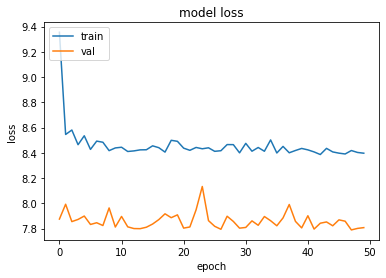

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

inp = df_b_train_airq.iloc[:, :4]
out = df_b_train_airq.iloc[:, 4:]
print(inp.shape)
print(out.shape)
print(out.head())
X_train, X_test, y_train, y_test = train_test_split(inp, out, test_size=0.1)
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())
print(normalizer(X_train).numpy())
print(y_train)
model1 = tf.keras.models.load_model('/content/drive/MyDrive/IfW/nn2.h5')
for layer in model1.layers:
  layer.trainable = False
model = tf.keras.Sequential([
    # normalizer,
    tf.keras.layers.InputLayer(input_shape=(4)),
    model1,
    layers.Dense(units=512),
    layers.Dense(units=256),
    layers.Dense(units=128),
    layers.Dense(units=46,activation='relu')
])
model.summary()
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mae')
k = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/IfW/nn22.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch"
)
history = model.fit(
    X_train, y_train,
    epochs=50,
    callbacks=[k],
    validation_data=(X_test,y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/IfW/nn22.h5')
model.predict(np.expand_dims(np.array([1,2010,12,31]),axis=0))

array([[36.145546,  0.      , 39.815556,  0.      ,  0.      ,  0.      ,
        42.98249 ,  0.      , 46.590557,  0.      , 45.62097 ,  0.      ,
        41.352516,  0.      , 36.663475,  0.      , 34.966732,  0.      ,
        45.670364,  0.      , 34.394073,  9.049387, 40.209053,  0.      ,
        34.84636 ,  0.      , 38.28746 ,  3.635707, 40.21418 ,  0.      ,
        39.703632, 19.882515, 26.076351,  0.      , 47.708168,  0.      ,
        34.22844 ,  0.      , 46.238197,  0.      , 31.27883 ,  0.      ,
        32.863724,  0.      , 35.64665 ,  0.      ]], dtype=float32)

data preparation for task 1 region-Thailand neural net for weather data generation

In [ ]:
import pandas as pd
df_b_test = pd.read_csv('/content/drive/MyDrive/Task 1/Thailand/Testing/th_test_airquality.csv',encoding = "ISO-8859-1")
df_b_train_airq = pd.read_csv('/content/drive/MyDrive/Task 1/Thailand/Training/th_train_airquality.csv',encoding = "ISO-8859-1")
df_b_train_station = pd.read_csv('/content/drive/MyDrive/Task 1/Thailand/Training/th_train_station.csv',encoding = "ISO-8859-1")
df_b_train_weather = pd.read_csv('/content/drive/MyDrive/Task 1/Thailand/Training/th_train_weather.csv',encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_b_train_station.rename(columns={'ï»¿ID': 'ID'}, inplace=True)
k = df_b_train_station.groupby(['PROVINCE','ID'])
print(k.first())

                                                            NAME  ...   LONGITUDE
PROVINCE    ID                                                    ...            
Narathiwat  62T                            City Hall, Narathiwat  ...  101.823427
            87                        Narathiwat Weather Station  ...  101.816694
Phuket      43T                          Municipal Health Center  ...   98.391281
            68          Phuket Airport Weather Observing Station  ...   98.307778
Satun       63                   Satun Weather Observing Station  ...  100.083111
            80T                                 City Hall, Satun  ...  100.066152
Songkhla    44T                             Hat Yai Municipality  ...  100.484056
            52                Songkhla Weather Observing Station  ...  100.604194
Surat Thani 42T       Environment Agency Section 14, Surat Thani  ...   99.325148
            88   Kanjanadit Kanjanadit Agrometeorlogical Station  ...   99.733333
Yala        63T 

In [ ]:
kk = k['ID'].apply(list).groupby(level=0).apply(list)
l = []
for n,i in enumerate(kk):
  l1 = []
  for j in i:
    l1.append(j[0])
  # l1.append(n)
  l.append(l1)
print(l)
ll = dict()
for n,i in enumerate(l):
  for j in i:
    ll[j] = n
print(ll)

[['62T', '87'], ['43T', '68'], ['63', '80T'], ['44T', '52'], ['42T', '88'], ['63T', '86']]
{'62T': 0, '87': 0, '43T': 1, '68': 1, '63': 2, '80T': 2, '44T': 3, '52': 3, '42T': 4, '88': 4, '63T': 5, '86': 5}


In [ ]:
df_b_train_airq = df_b_train_airq.dropna(how='any',axis=0)
def func(x):
  r = x.split("-")
  return r[0], r[1], "".join(['20',r[2].strip()])

df_b_train_airq['D'], df_b_train_airq['M'], df_b_train_airq['Y'] = zip(*df_b_train_airq['DATE'].map(func))
df_b_train_airq.dtypes
df_b_train_airq

,ï»¿ID,DATE,PM10_1,PM10_2,PM10_3,PM10_4,PM10_5,PM10_6,PM10_7,PM10_8,PM10_9,PM10_10,PM10_11,PM10_12,PM10_13,PM10_14,PM10_15,PM10_16,PM10_17,PM10_18,PM10_19,PM10_20,PM10_21,PM10_22,PM10_23,PM10_24,PM25_1,PM25_2,PM25_3,PM25_4,PM25_5,PM25_6,PM25_7,PM25_8,PM25_9,PM25_10,PM25_11,PM25_12,PM25_13,PM25_14,PM25_15,PM25_16,PM25_17,PM25_18,PM25_19,PM25_20,PM25_21,PM25_22,PM25_23,PM25_24,D,M,Y
5408,44T,20-06-12,28.0,26.0,24.0,32.0,50.0,39.0,32.0,30.0,39.0,37.0,26.0,33.0,25.0,25.0,21.0,31.0,25.0,23.0,19.0,29.0,34.0,38.0,49.0,41.0,11.0,17.0,16.0,33.0,40.0,34.0,22.0,25.0,33.0,20.0,20.0,14.0,18.0,13.0,16.0,12.0,16.0,12.0,17.0,24.0,20.0,26.0,10,38.0,20,06,2012
5420,44T,22-06-12,68.0,59.0,68.0,65.0,57.0,65.0,61.0,68.0,89.0,76.0,57.0,61.0,45.0,46.0,41.0,51.0,40.0,52.0,55.0,69.0,73.0,79.0,71.0,70.0,56.0,53.0,56.0,50.0,45.0,51.0,56.0,60.0,53.0,48.0,46.0,32.0,25.0,28.0,32.0,24.0,35.0,29.0,50.0,48.0,43.0,45.0,35,40.0,22,06,2012
5426,44T,23-06-12,71.0,88.0,72.0,76.0,65.0,60.0,52.0,56.0,68.0,67.0,69.0,50.0,45.0,52.0,43.0,24.0,23.0,32.0,28.0,31.0,37.0,52.0,55.0,51.0,49.0,58.0,52.0,59.0,57.0,42.0,29.0,32.0,48.0,47.0,40.0,35.0,32.0,29.0,27.0,16.0,11.0,18.0,11.0,16.0,23.0,27.0,30,46.0,23,06,2012
5432,44T,24-06-12,65.0,27.0,40.0,39.0,60.0,57.0,76.0,57.0,40.0,43.0,31.0,34.0,31.0,34.0,44.0,33.0,20.0,24.0,28.0,30.0,28.0,49.0,35.0,37.0,52.0,27.0,36.0,37.0,39.0,51.0,53.0,36.0,24.0,26.0,10.0,17.0,16.0,21.0,22.0,18.0,30.0,15.0,17.0,16.0,28.0,31.0,23,22.0,24,06,2012
5450,44T,27-06-12,39.0,20.0,53.0,44.0,42.0,29.0,28.0,44.0,59.0,68.0,46.0,21.0,24.0,13.0,14.0,16.0,23.0,19.0,17.0,19.0,18.0,16.0,23.0,34.0,19.0,15.0,18.0,23.0,27.0,25.0,25.0,28.0,32.0,32.0,27.0,23.0,20.0,17.0,13.0,10.0,11.0,11.0,12.0,13.0,11.0,10.0,11,12.0,27,06,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17524,63T,30-12-17,27.0,25.0,35.0,28.0,31.0,34.0,34.0,41.0,48.0,49.0,31.0,45.0,38.0,29.0,41.0,31.0,48.0,44.0,35.0,52.0,41.0,45.0,61.0,37.0,15.0,12.0,19.0,16.0,15.0,11.0,17.0,18.0,18.0,19.0,17.0,19.0,15.0,19.0,15.0,15.0,19.0,18.0,21.0,21.0,22.0,22.0,19,16.0,30,12,2017
17525,80T,30-12-17,17.0,18.0,15.0,13.0,16.0,16.0,16.0,20.0,26.0,22.0,17.0,18.0,22.0,21.0,20.0,17.0,20.0,23.0,23.0,27.0,27.0,26.0,21.0,27.0,4.0,7.0,2.0,5.0,5.0,8.0,6.0,7.0,22.0,8.0,4.0,4.0,1.0,2.0,4.0,8.0,11.0,11.0,10.0,12.0,17.0,15.0,6,8.0,30,12,2017
17528,44T,31-12-17,26.0,26.0,22.0,15.0,20.0,22.0,21.0,26.0,26.0,31.0,28.0,34.0,30.0,28.0,26.0,29.0,24.0,24.0,29.0,27.0,26.0,23.0,25.0,21.0,12.0,5.0,3.0,4.0,4.0,7.0,12.0,16.0,16.0,15.0,14.0,11.0,11.0,9.0,5.0,7.0,10.0,11.0,12.0,12.0,11.0,12.0,11,5.0,31,12,2017
17530,63T,31-12-17,34.0,32.0,38.0,32.0,33.0,32.0,33.0,49.0,58.0,54.0,33.0,27.0,44.0,46.0,42.0,41.0,38.0,37.0,48.0,46.0,39.0,48.0,44.0,44.0,15.0,16.0,17.0,15.0,15.0,17.0,15.0,17.0,22.0,24.0,18.0,18.0,18.0,17.0,19.0,18.0,18.0,18.0,18.0,20.0,18.0,21.0,18,19.0,31,12,2017


In [ ]:
df_b_train_airq['Y'] = df_b_train_airq['Y'].apply(pd.to_numeric)
df_b_train_airq['M'] = df_b_train_airq['M'].apply(pd.to_numeric)
df_b_train_airq['D'] = df_b_train_airq['D'].apply(pd.to_numeric)
# df_b_train_airq.dtypes
df_b_train_airq = df_b_train_airq.drop('DATE', 1)
df_b_train_airq

,ï»¿ID,PM10_1,PM10_2,PM10_3,PM10_4,PM10_5,PM10_6,PM10_7,PM10_8,PM10_9,PM10_10,PM10_11,PM10_12,PM10_13,PM10_14,PM10_15,PM10_16,PM10_17,PM10_18,PM10_19,PM10_20,PM10_21,PM10_22,PM10_23,PM10_24,PM25_1,PM25_2,PM25_3,PM25_4,PM25_5,PM25_6,PM25_7,PM25_8,PM25_9,PM25_10,PM25_11,PM25_12,PM25_13,PM25_14,PM25_15,PM25_16,PM25_17,PM25_18,PM25_19,PM25_20,PM25_21,PM25_22,PM25_23,PM25_24,D,M,Y
5408,44T,28.0,26.0,24.0,32.0,50.0,39.0,32.0,30.0,39.0,37.0,26.0,33.0,25.0,25.0,21.0,31.0,25.0,23.0,19.0,29.0,34.0,38.0,49.0,41.0,11.0,17.0,16.0,33.0,40.0,34.0,22.0,25.0,33.0,20.0,20.0,14.0,18.0,13.0,16.0,12.0,16.0,12.0,17.0,24.0,20.0,26.0,10,38.0,20,6,2012
5420,44T,68.0,59.0,68.0,65.0,57.0,65.0,61.0,68.0,89.0,76.0,57.0,61.0,45.0,46.0,41.0,51.0,40.0,52.0,55.0,69.0,73.0,79.0,71.0,70.0,56.0,53.0,56.0,50.0,45.0,51.0,56.0,60.0,53.0,48.0,46.0,32.0,25.0,28.0,32.0,24.0,35.0,29.0,50.0,48.0,43.0,45.0,35,40.0,22,6,2012
5426,44T,71.0,88.0,72.0,76.0,65.0,60.0,52.0,56.0,68.0,67.0,69.0,50.0,45.0,52.0,43.0,24.0,23.0,32.0,28.0,31.0,37.0,52.0,55.0,51.0,49.0,58.0,52.0,59.0,57.0,42.0,29.0,32.0,48.0,47.0,40.0,35.0,32.0,29.0,27.0,16.0,11.0,18.0,11.0,16.0,23.0,27.0,30,46.0,23,6,2012
5432,44T,65.0,27.0,40.0,39.0,60.0,57.0,76.0,57.0,40.0,43.0,31.0,34.0,31.0,34.0,44.0,33.0,20.0,24.0,28.0,30.0,28.0,49.0,35.0,37.0,52.0,27.0,36.0,37.0,39.0,51.0,53.0,36.0,24.0,26.0,10.0,17.0,16.0,21.0,22.0,18.0,30.0,15.0,17.0,16.0,28.0,31.0,23,22.0,24,6,2012
5450,44T,39.0,20.0,53.0,44.0,42.0,29.0,28.0,44.0,59.0,68.0,46.0,21.0,24.0,13.0,14.0,16.0,23.0,19.0,17.0,19.0,18.0,16.0,23.0,34.0,19.0,15.0,18.0,23.0,27.0,25.0,25.0,28.0,32.0,32.0,27.0,23.0,20.0,17.0,13.0,10.0,11.0,11.0,12.0,13.0,11.0,10.0,11,12.0,27,6,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17524,63T,27.0,25.0,35.0,28.0,31.0,34.0,34.0,41.0,48.0,49.0,31.0,45.0,38.0,29.0,41.0,31.0,48.0,44.0,35.0,52.0,41.0,45.0,61.0,37.0,15.0,12.0,19.0,16.0,15.0,11.0,17.0,18.0,18.0,19.0,17.0,19.0,15.0,19.0,15.0,15.0,19.0,18.0,21.0,21.0,22.0,22.0,19,16.0,30,12,2017
17525,80T,17.0,18.0,15.0,13.0,16.0,16.0,16.0,20.0,26.0,22.0,17.0,18.0,22.0,21.0,20.0,17.0,20.0,23.0,23.0,27.0,27.0,26.0,21.0,27.0,4.0,7.0,2.0,5.0,5.0,8.0,6.0,7.0,22.0,8.0,4.0,4.0,1.0,2.0,4.0,8.0,11.0,11.0,10.0,12.0,17.0,15.0,6,8.0,30,12,2017
17528,44T,26.0,26.0,22.0,15.0,20.0,22.0,21.0,26.0,26.0,31.0,28.0,34.0,30.0,28.0,26.0,29.0,24.0,24.0,29.0,27.0,26.0,23.0,25.0,21.0,12.0,5.0,3.0,4.0,4.0,7.0,12.0,16.0,16.0,15.0,14.0,11.0,11.0,9.0,5.0,7.0,10.0,11.0,12.0,12.0,11.0,12.0,11,5.0,31,12,2017
17530,63T,34.0,32.0,38.0,32.0,33.0,32.0,33.0,49.0,58.0,54.0,33.0,27.0,44.0,46.0,42.0,41.0,38.0,37.0,48.0,46.0,39.0,48.0,44.0,44.0,15.0,16.0,17.0,15.0,15.0,17.0,15.0,17.0,22.0,24.0,18.0,18.0,18.0,17.0,19.0,18.0,18.0,18.0,18.0,20.0,18.0,21.0,18,19.0,31,12,2017


In [ ]:
cols = df_b_train_airq.columns.tolist()
cols = [cols[0]] + cols[-3:] + cols[1:-3]
df_b_train_airq = df_b_train_airq[cols]
df_b_train_airq

,ï»¿ID,D,M,Y,PM10_1,PM10_2,PM10_3,PM10_4,PM10_5,PM10_6,PM10_7,PM10_8,PM10_9,PM10_10,PM10_11,PM10_12,PM10_13,PM10_14,PM10_15,PM10_16,PM10_17,PM10_18,PM10_19,PM10_20,PM10_21,PM10_22,PM10_23,PM10_24,PM25_1,PM25_2,PM25_3,PM25_4,PM25_5,PM25_6,PM25_7,PM25_8,PM25_9,PM25_10,PM25_11,PM25_12,PM25_13,PM25_14,PM25_15,PM25_16,PM25_17,PM25_18,PM25_19,PM25_20,PM25_21,PM25_22,PM25_23,PM25_24
5408,44T,20,6,2012,28.0,26.0,24.0,32.0,50.0,39.0,32.0,30.0,39.0,37.0,26.0,33.0,25.0,25.0,21.0,31.0,25.0,23.0,19.0,29.0,34.0,38.0,49.0,41.0,11.0,17.0,16.0,33.0,40.0,34.0,22.0,25.0,33.0,20.0,20.0,14.0,18.0,13.0,16.0,12.0,16.0,12.0,17.0,24.0,20.0,26.0,10,38.0
5420,44T,22,6,2012,68.0,59.0,68.0,65.0,57.0,65.0,61.0,68.0,89.0,76.0,57.0,61.0,45.0,46.0,41.0,51.0,40.0,52.0,55.0,69.0,73.0,79.0,71.0,70.0,56.0,53.0,56.0,50.0,45.0,51.0,56.0,60.0,53.0,48.0,46.0,32.0,25.0,28.0,32.0,24.0,35.0,29.0,50.0,48.0,43.0,45.0,35,40.0
5426,44T,23,6,2012,71.0,88.0,72.0,76.0,65.0,60.0,52.0,56.0,68.0,67.0,69.0,50.0,45.0,52.0,43.0,24.0,23.0,32.0,28.0,31.0,37.0,52.0,55.0,51.0,49.0,58.0,52.0,59.0,57.0,42.0,29.0,32.0,48.0,47.0,40.0,35.0,32.0,29.0,27.0,16.0,11.0,18.0,11.0,16.0,23.0,27.0,30,46.0
5432,44T,24,6,2012,65.0,27.0,40.0,39.0,60.0,57.0,76.0,57.0,40.0,43.0,31.0,34.0,31.0,34.0,44.0,33.0,20.0,24.0,28.0,30.0,28.0,49.0,35.0,37.0,52.0,27.0,36.0,37.0,39.0,51.0,53.0,36.0,24.0,26.0,10.0,17.0,16.0,21.0,22.0,18.0,30.0,15.0,17.0,16.0,28.0,31.0,23,22.0
5450,44T,27,6,2012,39.0,20.0,53.0,44.0,42.0,29.0,28.0,44.0,59.0,68.0,46.0,21.0,24.0,13.0,14.0,16.0,23.0,19.0,17.0,19.0,18.0,16.0,23.0,34.0,19.0,15.0,18.0,23.0,27.0,25.0,25.0,28.0,32.0,32.0,27.0,23.0,20.0,17.0,13.0,10.0,11.0,11.0,12.0,13.0,11.0,10.0,11,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17524,63T,30,12,2017,27.0,25.0,35.0,28.0,31.0,34.0,34.0,41.0,48.0,49.0,31.0,45.0,38.0,29.0,41.0,31.0,48.0,44.0,35.0,52.0,41.0,45.0,61.0,37.0,15.0,12.0,19.0,16.0,15.0,11.0,17.0,18.0,18.0,19.0,17.0,19.0,15.0,19.0,15.0,15.0,19.0,18.0,21.0,21.0,22.0,22.0,19,16.0
17525,80T,30,12,2017,17.0,18.0,15.0,13.0,16.0,16.0,16.0,20.0,26.0,22.0,17.0,18.0,22.0,21.0,20.0,17.0,20.0,23.0,23.0,27.0,27.0,26.0,21.0,27.0,4.0,7.0,2.0,5.0,5.0,8.0,6.0,7.0,22.0,8.0,4.0,4.0,1.0,2.0,4.0,8.0,11.0,11.0,10.0,12.0,17.0,15.0,6,8.0
17528,44T,31,12,2017,26.0,26.0,22.0,15.0,20.0,22.0,21.0,26.0,26.0,31.0,28.0,34.0,30.0,28.0,26.0,29.0,24.0,24.0,29.0,27.0,26.0,23.0,25.0,21.0,12.0,5.0,3.0,4.0,4.0,7.0,12.0,16.0,16.0,15.0,14.0,11.0,11.0,9.0,5.0,7.0,10.0,11.0,12.0,12.0,11.0,12.0,11,5.0
17530,63T,31,12,2017,34.0,32.0,38.0,32.0,33.0,32.0,33.0,49.0,58.0,54.0,33.0,27.0,44.0,46.0,42.0,41.0,38.0,37.0,48.0,46.0,39.0,48.0,44.0,44.0,15.0,16.0,17.0,15.0,15.0,17.0,15.0,17.0,22.0,24.0,18.0,18.0,18.0,17.0,19.0,18.0,18.0,18.0,18.0,20.0,18.0,21.0,18,19.0


In [ ]:
df_b_train_airq.rename(columns={'ï»¿ID': 'ID'}, inplace=True)

In [ ]:
for i in range(1,25):
  df_b_train_airq[f"PM10_{i}"] = pd.to_numeric(df_b_train_airq[f"PM10_{i}"], errors='coerce')
  df_b_train_airq[f"PM10_{i}"] = df_b_train_airq[f"PM10_{i}"].fillna(df_b_train_airq.groupby(["Y","M","D"])[f"PM10_{i}"].transform('mean'))
  df_b_train_airq[f"PM25_{i}"] = pd.to_numeric(df_b_train_airq[f"PM25_{i}"], errors='coerce')
  df_b_train_airq[f"PM25_{i}"] = df_b_train_airq[f"PM25_{i}"].fillna(df_b_train_airq.groupby(["Y","M","D"])[f"PM25_{i}"].transform('mean'))
df_b_train_airq = df_b_train_airq.replace({"ID": ll})
df_b_train_airq

,ID,D,M,Y,PM10_1,PM10_2,PM10_3,PM10_4,PM10_5,PM10_6,PM10_7,PM10_8,PM10_9,PM10_10,PM10_11,PM10_12,PM10_13,PM10_14,PM10_15,PM10_16,PM10_17,PM10_18,PM10_19,PM10_20,PM10_21,PM10_22,PM10_23,PM10_24,PM25_1,PM25_2,PM25_3,PM25_4,PM25_5,PM25_6,PM25_7,PM25_8,PM25_9,PM25_10,PM25_11,PM25_12,PM25_13,PM25_14,PM25_15,PM25_16,PM25_17,PM25_18,PM25_19,PM25_20,PM25_21,PM25_22,PM25_23,PM25_24
5408,3,20,6,2012,28.0,26.0,24.0,32.0,50.0,39.0,32.0,30.0,39.0,37.0,26.0,33.0,25.0,25.0,21.0,31.0,25.0,23.0,19.0,29.0,34.0,38.0,49.0,41.0,11.0,17.0,16.0,33.0,40.0,34.0,22.0,25.0,33.0,20.0,20.0,14.0,18.0,13.0,16.0,12.0,16.0,12.0,17.0,24.0,20.0,26.0,10.0,38.0
5420,3,22,6,2012,68.0,59.0,68.0,65.0,57.0,65.0,61.0,68.0,89.0,76.0,57.0,61.0,45.0,46.0,41.0,51.0,40.0,52.0,55.0,69.0,73.0,79.0,71.0,70.0,56.0,53.0,56.0,50.0,45.0,51.0,56.0,60.0,53.0,48.0,46.0,32.0,25.0,28.0,32.0,24.0,35.0,29.0,50.0,48.0,43.0,45.0,35.0,40.0
5426,3,23,6,2012,71.0,88.0,72.0,76.0,65.0,60.0,52.0,56.0,68.0,67.0,69.0,50.0,45.0,52.0,43.0,24.0,23.0,32.0,28.0,31.0,37.0,52.0,55.0,51.0,49.0,58.0,52.0,59.0,57.0,42.0,29.0,32.0,48.0,47.0,40.0,35.0,32.0,29.0,27.0,16.0,11.0,18.0,11.0,16.0,23.0,27.0,30.0,46.0
5432,3,24,6,2012,65.0,27.0,40.0,39.0,60.0,57.0,76.0,57.0,40.0,43.0,31.0,34.0,31.0,34.0,44.0,33.0,20.0,24.0,28.0,30.0,28.0,49.0,35.0,37.0,52.0,27.0,36.0,37.0,39.0,51.0,53.0,36.0,24.0,26.0,10.0,17.0,16.0,21.0,22.0,18.0,30.0,15.0,17.0,16.0,28.0,31.0,23.0,22.0
5450,3,27,6,2012,39.0,20.0,53.0,44.0,42.0,29.0,28.0,44.0,59.0,68.0,46.0,21.0,24.0,13.0,14.0,16.0,23.0,19.0,17.0,19.0,18.0,16.0,23.0,34.0,19.0,15.0,18.0,23.0,27.0,25.0,25.0,28.0,32.0,32.0,27.0,23.0,20.0,17.0,13.0,10.0,11.0,11.0,12.0,13.0,11.0,10.0,11.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17524,5,30,12,2017,27.0,25.0,35.0,28.0,31.0,34.0,34.0,41.0,48.0,49.0,31.0,45.0,38.0,29.0,41.0,31.0,48.0,44.0,35.0,52.0,41.0,45.0,61.0,37.0,15.0,12.0,19.0,16.0,15.0,11.0,17.0,18.0,18.0,19.0,17.0,19.0,15.0,19.0,15.0,15.0,19.0,18.0,21.0,21.0,22.0,22.0,19.0,16.0
17525,2,30,12,2017,17.0,18.0,15.0,13.0,16.0,16.0,16.0,20.0,26.0,22.0,17.0,18.0,22.0,21.0,20.0,17.0,20.0,23.0,23.0,27.0,27.0,26.0,21.0,27.0,4.0,7.0,2.0,5.0,5.0,8.0,6.0,7.0,22.0,8.0,4.0,4.0,1.0,2.0,4.0,8.0,11.0,11.0,10.0,12.0,17.0,15.0,6.0,8.0
17528,3,31,12,2017,26.0,26.0,22.0,15.0,20.0,22.0,21.0,26.0,26.0,31.0,28.0,34.0,30.0,28.0,26.0,29.0,24.0,24.0,29.0,27.0,26.0,23.0,25.0,21.0,12.0,5.0,3.0,4.0,4.0,7.0,12.0,16.0,16.0,15.0,14.0,11.0,11.0,9.0,5.0,7.0,10.0,11.0,12.0,12.0,11.0,12.0,11.0,5.0
17530,5,31,12,2017,34.0,32.0,38.0,32.0,33.0,32.0,33.0,49.0,58.0,54.0,33.0,27.0,44.0,46.0,42.0,41.0,38.0,37.0,48.0,46.0,39.0,48.0,44.0,44.0,15.0,16.0,17.0,15.0,15.0,17.0,15.0,17.0,22.0,24.0,18.0,18.0,18.0,17.0,19.0,18.0,18.0,18.0,18.0,20.0,18.0,21.0,18.0,19.0


In [ ]:
df_b_train_weather.head()

,ID,DATE,TEMP_AVG,TEMP_MIN,TEMP_MAX,HUM_AVG,HUM_MIN,HUM_MAX,RAIN,WIND_SP,WIND_DD,WIND_DC,MAXWIND_SP,MAXWIND_DD,MAXWIND_DC
0,52,10/01/01,28.2,26.8,31.2,76,65,85,0.0,9.5,74,ENE,18.0,75,ENE
1,63,10/01/01,28.2,23.6,32.7,70,51,88,0.4,6.0,61,ENE,16.6,69,ENE
2,68,10/01/01,27.6,23.5,31.8,77,53,97,0.0,3.5,69,CALM,15.5,87,E
3,86,10/01/01,25.9,22.8,29.0,84,64,93,2.8,1.1,75,CALM,12.6,96,E
4,87,10/01/01,27.0,23.8,29.5,80,66,90,3.6,6.4,101,E,20.9,54,NE


In [ ]:
kk1 = df_b_train_weather['WIND_DC'].unique()
d = dict()
for j,i in enumerate(kk1):
  try:
    d[i] = j
  except:
    d['nan'] = j
print(d)
df_b_train_weather2 = df_b_train_weather.replace({"WIND_DC": d})
kk1 = df_b_train_weather['MAXWIND_DC'].unique()
d = dict()
for j,i in enumerate(kk1):
  try:
    d[i] = j
  except:
    d['nan'] = j
print(d)
df_b_train_weather2 = df_b_train_weather2.replace({"MAXWIND_DC": d})
df_b_train_weather2['ID'] = df_b_train_weather2['ID'].astype("string")
df_b_train_weather2 = df_b_train_weather2.replace({"ID": ll})
df_b_train_weather2

{'\xa0ENE': 0, '\xa0CALM': 1, '\xa0 E': 2, '\xa0': 3, '\xa0 NE': 4, '\xa0SSE': 5, '\xa0ESE': 6, '\xa0 SE': 7, '\xa0NNE': 8, '\xa0 N': 9, '\xa0 NW': 10, '\xa0NNW': 11, '\xa0WNW': 12, '\xa0 S': 13, '\xa0 SW': 14, '\xa0SSW': 15, '\xa0 W': 16, '\xa0WSW': 17, nan: 18}
{'\xa0ENE': 0, '\xa0 E': 1, '\xa0 NE': 2, '\xa0': 3, '\xa0 SE': 4, '\xa0 NW': 5, '\xa0SSW': 6, '\xa0NNE': 7, '\xa0 W': 8, '\xa0ESE': 9, '\xa0 N': 10, '\xa0SSE': 11, '\xa0WNW': 12, '\xa0WSW': 13, '\xa0 SW': 14, '\xa0 S': 15, '\xa0NNW': 16, '\xa0CALM': 17, nan: 18}


,ID,DATE,TEMP_AVG,TEMP_MIN,TEMP_MAX,HUM_AVG,HUM_MIN,HUM_MAX,RAIN,WIND_SP,WIND_DD,WIND_DC,MAXWIND_SP,MAXWIND_DD,MAXWIND_DC
0,3,10/01/01,28.2,26.8,31.2,76,65,85,0.0,9.5,74,0,18.0,75,0
1,2,10/01/01,28.2,23.6,32.7,70,51,88,0.4,6.0,61,0,16.6,69,0
2,1,10/01/01,27.6,23.5,31.8,77,53,97,0.0,3.5,69,1,15.5,87,1
3,5,10/01/01,25.9,22.8,29.0,84,64,93,2.8,1.1,75,1,12.6,96,1
4,0,10/01/01,27.0,23.8,29.5,80,66,90,3.6,6.4,101,2,20.9,54,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,2,17/12/31,28.3,25.9,32.6,68,53,78,0.0,9.9,55,4,25.6,51,2
17528,1,17/12/31,26.4,23.2,32.0,80,54,90,8.4,5.8,79,2,29.2,66,0
17529,5,17/12/31,26.0,23.3,29.6,85,71,97,0.4,7.7,74,0,19.4,88,1
17530,0,17/12/31,27.5,25.0,30.4,73,66,87,0.2,21.6,90,2,31.0,85,1


In [ ]:
def func(x):
  r = x.split("/")
  return "".join(['20',r[0].strip()]), r[1], r[2]

df_b_train_weather2['Y'], df_b_train_weather2['M'], df_b_train_weather2['D'] = zip(*df_b_train_weather2['DATE'].map(func))
df_b_train_weather2.dtypes
df_b_train_weather2

,ID,DATE,TEMP_AVG,TEMP_MIN,TEMP_MAX,HUM_AVG,HUM_MIN,HUM_MAX,RAIN,WIND_SP,WIND_DD,WIND_DC,MAXWIND_SP,MAXWIND_DD,MAXWIND_DC,Y,M,D
0,3,10/01/01,28.2,26.8,31.2,76,65,85,0.0,9.5,74,0,18.0,75,0,2010,01,01
1,2,10/01/01,28.2,23.6,32.7,70,51,88,0.4,6.0,61,0,16.6,69,0,2010,01,01
2,1,10/01/01,27.6,23.5,31.8,77,53,97,0.0,3.5,69,1,15.5,87,1,2010,01,01
3,5,10/01/01,25.9,22.8,29.0,84,64,93,2.8,1.1,75,1,12.6,96,1,2010,01,01
4,0,10/01/01,27.0,23.8,29.5,80,66,90,3.6,6.4,101,2,20.9,54,2,2010,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,2,17/12/31,28.3,25.9,32.6,68,53,78,0.0,9.9,55,4,25.6,51,2,2017,12,31
17528,1,17/12/31,26.4,23.2,32.0,80,54,90,8.4,5.8,79,2,29.2,66,0,2017,12,31
17529,5,17/12/31,26.0,23.3,29.6,85,71,97,0.4,7.7,74,0,19.4,88,1,2017,12,31
17530,0,17/12/31,27.5,25.0,30.4,73,66,87,0.2,21.6,90,2,31.0,85,1,2017,12,31


In [ ]:
df_b_train_weather2['Y'] = df_b_train_weather2['Y'].apply(pd.to_numeric)
df_b_train_weather2['M'] = df_b_train_weather2['M'].apply(pd.to_numeric)
df_b_train_weather2['D'] = df_b_train_weather2['D'].apply(pd.to_numeric)
# df_b_train_weather2.dtypes
df_b_train_weather2 = df_b_train_weather2.drop('DATE', 1)
df_b_train_weather2

,ID,TEMP_AVG,TEMP_MIN,TEMP_MAX,HUM_AVG,HUM_MIN,HUM_MAX,RAIN,WIND_SP,WIND_DD,WIND_DC,MAXWIND_SP,MAXWIND_DD,MAXWIND_DC,Y,M,D
0,3,28.2,26.8,31.2,76,65,85,0.0,9.5,74,0,18.0,75,0,2010,1,1
1,2,28.2,23.6,32.7,70,51,88,0.4,6.0,61,0,16.6,69,0,2010,1,1
2,1,27.6,23.5,31.8,77,53,97,0.0,3.5,69,1,15.5,87,1,2010,1,1
3,5,25.9,22.8,29.0,84,64,93,2.8,1.1,75,1,12.6,96,1,2010,1,1
4,0,27.0,23.8,29.5,80,66,90,3.6,6.4,101,2,20.9,54,2,2010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,2,28.3,25.9,32.6,68,53,78,0.0,9.9,55,4,25.6,51,2,2017,12,31
17528,1,26.4,23.2,32.0,80,54,90,8.4,5.8,79,2,29.2,66,0,2017,12,31
17529,5,26.0,23.3,29.6,85,71,97,0.4,7.7,74,0,19.4,88,1,2017,12,31
17530,0,27.5,25.0,30.4,73,66,87,0.2,21.6,90,2,31.0,85,1,2017,12,31


In [ ]:
cols = df_b_train_weather2.columns.tolist()
cols = [cols[0]] + cols[-3:] + cols[1:-3]
df_b_train_weather2 = df_b_train_weather2[cols]
df_b_train_weather2

,ID,Y,M,D,TEMP_AVG,TEMP_MIN,TEMP_MAX,HUM_AVG,HUM_MIN,HUM_MAX,RAIN,WIND_SP,WIND_DD,WIND_DC,MAXWIND_SP,MAXWIND_DD,MAXWIND_DC
0,3,2010,1,1,28.2,26.8,31.2,76,65,85,0.0,9.5,74,0,18.0,75,0
1,2,2010,1,1,28.2,23.6,32.7,70,51,88,0.4,6.0,61,0,16.6,69,0
2,1,2010,1,1,27.6,23.5,31.8,77,53,97,0.0,3.5,69,1,15.5,87,1
3,5,2010,1,1,25.9,22.8,29.0,84,64,93,2.8,1.1,75,1,12.6,96,1
4,0,2010,1,1,27.0,23.8,29.5,80,66,90,3.6,6.4,101,2,20.9,54,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,2,2017,12,31,28.3,25.9,32.6,68,53,78,0.0,9.9,55,4,25.6,51,2
17528,1,2017,12,31,26.4,23.2,32.0,80,54,90,8.4,5.8,79,2,29.2,66,0
17529,5,2017,12,31,26.0,23.3,29.6,85,71,97,0.4,7.7,74,0,19.4,88,1
17530,0,2017,12,31,27.5,25.0,30.4,73,66,87,0.2,21.6,90,2,31.0,85,1


In [ ]:
print(df_b_train_weather2['TEMP_AVG'].str.split().str.join(' ').tolist())

['28.2', '28.2', '27.6', '25.9', '27.0', '', '28.2', '27.4', '27.2', '25.6', '27.8', '', '27.6', '26.8', '27.5', '24.9', '25.4', '', '27.2', '26.9', '28.2', '27.1', '27.1', '', '27.2', '27.2', '27.5', '26.5', '26.9', '', '27.9', '27.5', '28.3', '27.6', '28.2', '', '26.6', '26.9', '25.5', '25.8', '26.3', '', '27.5', '27.7', '27.8', '26.0', '26.7', '', '27.5', '27.3', '27.8', '26.1', '26.9', '', '27.3', '26.9', '27.6', '25.8', '26.8', '', '27.2', '27.1', '28.0', '26.0', '26.6', '', '27.7', '27.9', '28.1', '26.0', '27.0', '', '28.2', '28.3', '28.3', '26.6', '27.9', '', '27.8', '28.0', '28.8', '26.0', '27.2', '', '27.8', '27.7', '27.6', '26.3', '27.4', '', '27.5', '27.2', '27.9', '26.0', '27.1', '', '27.8', '27.3', '27.9', '26.1', '27.2', '', '27.7', '27.6', '27.8', '26.4', '27.3', '', '27.5', '27.6', '28.1', '26.0', '27.0', '', '27.3', '27.3', '27.8', '26.7', '27.6', '', '28.2', '27.8', '28.3', '27.7', '27.9', '', '28.4', '28.4', '28.7', '27.3', '27.2', '', '28.6', '29.2', '28.7', '27.5',

In [ ]:
cols1 = ['TEMP_AVG', 'TEMP_MIN', 'TEMP_MAX', 'HUM_AVG', 'HUM_MIN', 'HUM_MAX', 'RAIN', 'WIND_SP', 'WIND_DD', 'MAXWIND_SP', 'MAXWIND_DD']
for i in cols1:
  df_b_train_weather2[i] = pd.to_numeric(df_b_train_weather2[i].str.split().str.join(' '), errors='coerce')
  df_b_train_weather2[i] = df_b_train_weather2[i].fillna(df_b_train_weather2.groupby(["Y","M","D"])[i].transform('mean'))
df_b_train_weather2 = df_b_train_weather2.dropna(how='any',axis=0)
df_b_train_weather2

,ID,Y,M,D,TEMP_AVG,TEMP_MIN,TEMP_MAX,HUM_AVG,HUM_MIN,HUM_MAX,RAIN,WIND_SP,WIND_DD,WIND_DC,MAXWIND_SP,MAXWIND_DD,MAXWIND_DC
0,3,2010,1,1,28.2,26.8,31.2,76.0,65.0,85.0,0.0,9.5,74.0,0,18.0,75.0,0
1,2,2010,1,1,28.2,23.6,32.7,70.0,51.0,88.0,0.4,6.0,61.0,0,16.6,69.0,0
2,1,2010,1,1,27.6,23.5,31.8,77.0,53.0,97.0,0.0,3.5,69.0,1,15.5,87.0,1
3,5,2010,1,1,25.9,22.8,29.0,84.0,64.0,93.0,2.8,1.1,75.0,1,12.6,96.0,1
4,0,2010,1,1,27.0,23.8,29.5,80.0,66.0,90.0,3.6,6.4,101.0,2,20.9,54.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,2,2017,12,31,28.3,25.9,32.6,68.0,53.0,78.0,0.0,9.9,55.0,4,25.6,51.0,2
17528,1,2017,12,31,26.4,23.2,32.0,80.0,54.0,90.0,8.4,5.8,79.0,2,29.2,66.0,0
17529,5,2017,12,31,26.0,23.3,29.6,85.0,71.0,97.0,0.4,7.7,74.0,0,19.4,88.0,1
17530,0,2017,12,31,27.5,25.0,30.4,73.0,66.0,87.0,0.2,21.6,90.0,2,31.0,85.0,1


In [ ]:
df_in = df_b_train_weather2.iloc[:, :4]
df_in

,ID,Y,M,D
0,3,2010,1,1
1,2,2010,1,1
2,1,2010,1,1
3,5,2010,1,1
4,0,2010,1,1
...,...,...,...,...
17527,2,2017,12,31
17528,1,2017,12,31
17529,5,2017,12,31
17530,0,2017,12,31


In [ ]:
df_out = df_b_train_weather2.iloc[:, 4:]
df_out

,TEMP_AVG,TEMP_MIN,TEMP_MAX,HUM_AVG,HUM_MIN,HUM_MAX,RAIN,WIND_SP,WIND_DD,WIND_DC,MAXWIND_SP,MAXWIND_DD,MAXWIND_DC
0,28.2,26.8,31.2,76.0,65.0,85.0,0.0,9.5,74.0,0,18.0,75.0,0
1,28.2,23.6,32.7,70.0,51.0,88.0,0.4,6.0,61.0,0,16.6,69.0,0
2,27.6,23.5,31.8,77.0,53.0,97.0,0.0,3.5,69.0,1,15.5,87.0,1
3,25.9,22.8,29.0,84.0,64.0,93.0,2.8,1.1,75.0,1,12.6,96.0,1
4,27.0,23.8,29.5,80.0,66.0,90.0,3.6,6.4,101.0,2,20.9,54.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,28.3,25.9,32.6,68.0,53.0,78.0,0.0,9.9,55.0,4,25.6,51.0,2
17528,26.4,23.2,32.0,80.0,54.0,90.0,8.4,5.8,79.0,2,29.2,66.0,0
17529,26.0,23.3,29.6,85.0,71.0,97.0,0.4,7.7,74.0,0,19.4,88.0,1
17530,27.5,25.0,30.4,73.0,66.0,87.0,0.2,21.6,90.0,2,31.0,85.0,1


neural network for data generation region-Thailand

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_in, df_out, test_size=0.1)
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())
print(normalizer(X_train).numpy())
print(y_train)
model = tf.keras.Sequential([
    # normalizer,
    tf.keras.layers.InputLayer(input_shape=(4)),
    layers.Dense(units=128),
    layers.Dense(units=256),
    layers.Dense(units=128),
    layers.Dense(units=13)
])
model.summary()
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mae')
k = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/IfW/nn3.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch"
)
history = model.fit(
    X_train, y_train,
    epochs=500,
    callbacks=[k],
    validation_data=(X_test,y_test))

[[   2.4934888 2012.9387       6.421051    15.740374 ]]
[[ 0.8815354  -1.1932034   0.469146   -0.5373524 ]
 [ 0.29638517  1.6489938  -1.3136071  -0.0839262 ]
 [ 0.8815354   0.02488112 -0.71935606  1.2763524 ]
 ...
 [-0.28876507 -1.1932034  -1.0164815   1.0496393 ]
 [-0.8739153   0.4309093   0.469146    0.1427869 ]
 [ 0.29638517 -1.1932034   0.76627153 -1.4442048 ]]
tf.Tensor(
[[ 27.9   24.78  32.52 ...  15.64 113.6    3.  ]
 [ 27.9   26.2   31.2  ...  20.9   93.     1.  ]
 [ 24.6   21.5   33.4  ...  19.1  113.     9.  ]
 ...
 [ 28.5   22.9   35.5  ...  25.9  116.     9.  ]
 [ 28.9   26.7   31.6  ...  16.2  261.     8.  ]
 [ 27.2   25.5   31.3  ...  23.   235.    14.  ]], shape=(10519, 13), dtype=float64)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               640       
_________________________________________________________________


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/IfW/nn3.h5')
model.predict(np.expand_dims(np.array([1,2010,12,31]),axis=0))

array([[ 27.694014,  24.5986  ,  31.872187,  82.51748 ,  59.63967 ,
         96.5677  ,   1.624596,   4.757493, 240.12344 ,   5.18644 ,
         17.92373 , 228.8787  ,   9.032435]], dtype=float32)

neural network for Thailand PM10 and PM25 pred

(1324, 4)
(1324, 48)
[[   2.972292    15.932828     7.2485294 2015.3805   ]]
[[ 0.02352587  0.6963732  -1.3160307  -1.2933553 ]
 [ 0.02352587 -0.33662188  1.4718225  -1.8366694 ]
 [ 0.02352587  1.3850366  -0.07698484 -1.8366694 ]
 ...
 [ 0.02352587  1.7293683   0.23277663  0.8799008 ]
 [-2.5236611  -0.68095356 -0.07698484  0.8799008 ]
 [ 0.02352587  1.040705   -0.69650775  0.8799008 ]]
tf.Tensor(
[[ 26.  26.  33. ...  17.  18.  18.]
 [ 34.  31.  33. ...  11.   9.   8.]
 [102. 107. 107. ...  38.  41.  49.]
 ...
 [ 34.  41.  49. ...  17.  18.  17.]
 [ 27.  17.  12. ...  14.  13.   9.]
 [ 26.  41.  31. ...  17.  17.  21.]], shape=(1191, 48), dtype=float64)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 13)                68237     
_________________________________________________________________
dense_14 (Dense)             (None, 512)            

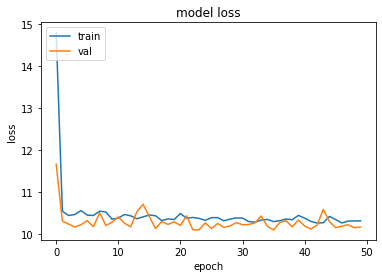

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

inp = df_b_train_airq.iloc[:, :4]
out = df_b_train_airq.iloc[:, 4:]
print(inp.shape)
print(out.shape)
X_train, X_test, y_train, y_test = train_test_split(inp, out, test_size=0.1)
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())
print(normalizer(X_train).numpy())
print(y_train)
model1 = tf.keras.models.load_model('/content/drive/MyDrive/IfW/nn3.h5')
for layer in model1.layers:
  layer.trainable = False
model = tf.keras.Sequential([
    # normalizer,
    tf.keras.layers.InputLayer(input_shape=(4)),
    model1,
    layers.Dense(units=512),
    layers.Dense(units=256),
    layers.Dense(units=128),
    layers.Dense(units=48,activation='relu')
])
model.summary()
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mae')
k = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/IfW/nn33.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch"
)
history = model.fit(
    X_train, y_train,
    epochs=50,
    callbacks=[k],
    validation_data=(X_test,y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/IfW/nn33.h5')
model.predict(np.expand_dims(np.array([1,2010,12,31]),axis=0))

array([[ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  6.324143 ,
         6.5310493,  7.1372476,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  6.7146697,
         0.       ,  6.299036 ,  0.       ,  0.       , 10.51009  ,
         1.5607215, 13.943612 ,  0.       ]], dtype=float32)

#Subtask 2

##data preparation

In [ ]:
import pandas as pd
df_b_test1 = pd.read_csv('/content/drive/MyDrive/Task 1/Brunei/Testing/bn_test_airquality.csv')
df_b_train_airq1 = pd.read_csv('/content/drive/MyDrive/Task 1/Brunei/Training/bn_train_airquality.csv')
df_b_train_station1 = pd.read_csv('/content/drive/MyDrive/Task 1/Brunei/Training/bn_train_station.csv')
df_b_train_weather1 = pd.read_csv('/content/drive/MyDrive/Task 1/Brunei/Training/bn_train_weather.csv')
df_b_test2 = pd.read_csv('/content/drive/MyDrive/Task 1/Singapore/Testing/sg_test_airquality.csv')
df_b_train_airq2 = pd.read_csv('/content/drive/MyDrive/Task 1/Singapore/Training/sg_train_airquality.csv')
df_b_train_station2 = pd.read_csv('/content/drive/MyDrive/Task 1/Singapore/Training/sg_train_station.csv')
df_b_train_weather2 = pd.read_csv('/content/drive/MyDrive/Task 1/Singapore/Training/sg_train_weather.csv')
df_b_test3 = pd.read_csv('/content/drive/MyDrive/Task 1/Thailand/Testing/th_test_airquality.csv',encoding = "ISO-8859-1")
df_b_train_airq3 = pd.read_csv('/content/drive/MyDrive/Task 1/Thailand/Training/th_train_airquality.csv',encoding = "ISO-8859-1")
df_b_train_station3 = pd.read_csv('/content/drive/MyDrive/Task 1/Thailand/Training/th_train_station.csv',encoding = "ISO-8859-1")
df_b_train_weather3 = pd.read_csv('/content/drive/MyDrive/Task 1/Thailand/Training/th_train_weather.csv',encoding = "ISO-8859-1")
k1 = df_b_train_station1.groupby(['DISTRICT','ID'])
kk1 = k1['ID'].apply(list).groupby(level=0).apply(list)
l11 = []
for n,i in enumerate(kk1):
  l1 = []
  for j in i:
    l1.append(j[0])
  # l1.append(n)
  l11.append(l1)
print(l11)
ll1 = dict()
for n,i in enumerate(l11):
  for j in i:
    ll1[j] = n
print(ll1)
df_b_train_airq1["PM10"] = pd.to_numeric(df_b_train_airq1["PM10"], errors='coerce')
df_b_train_airq1["PM10"] = df_b_train_airq1["PM10"].fillna(df_b_train_airq1.groupby(["Y","M","D"])["PM10"].transform('mean'))
df_b_train_airq1 = df_b_train_airq1.replace({"ID": ll1})
df_b_train_weather1["TEMP"] = pd.to_numeric(df_b_train_weather1["TEMP"], errors='coerce')
df_b_train_weather1["TEMP"] = df_b_train_weather1["TEMP"].fillna(df_b_train_weather1.groupby(["Y","M","D"])["TEMP"].transform('mean'))
df_b_train_weather1["HUM"] = pd.to_numeric(df_b_train_weather1["HUM"], errors='coerce')
df_b_train_weather1["HUM"] = df_b_train_weather1["HUM"].fillna(df_b_train_weather1.groupby(["Y","M","D"])["HUM"].transform('mean'))
df_b_train_weather1["RAIN"] = pd.to_numeric(df_b_train_weather1["RAIN"], errors='coerce')
df_b_train_weather1["RAIN"] = df_b_train_weather1["RAIN"].fillna(df_b_train_weather1.groupby(["Y","M","D"])["RAIN"].transform('mean'))
for i in range(1,25):
  df_b_train_weather1[f"WD{i}"] = pd.to_numeric(df_b_train_weather1[f"WD{i}"], errors='coerce')
  df_b_train_weather1[f"WD{i}"] = df_b_train_weather1[f"WD{i}"].fillna(df_b_train_weather1.groupby(["Y","M","D"])[f"WD{i}"].transform('mean'))
  df_b_train_weather1[f"WS{i}"] = pd.to_numeric(df_b_train_weather1[f"WS{i}"], errors='coerce')
  df_b_train_weather1[f"WS{i}"] = df_b_train_weather1[f"WS{i}"].fillna(df_b_train_weather1.groupby(["Y","M","D"])[f"WS{i}"].transform('mean'))
df_b_train_weather21 = df_b_train_weather1.replace({"ID": ll1})
df_b_train_weather21 = df_b_train_weather21.dropna(how='any',axis=0)

li = ['North','East','West','South','Central']
o = [k for k,i in enumerate(df_b_train_station2['REGION']) if i in li]
for idx in o:
  df_b_train_station2.loc[idx,['NAME','REGION']] = df_b_train_station2.loc[idx,['REGION','NAME']].values
k2 = df_b_train_station2.groupby(['NAME','ID'])
kk2 = k2['ID'].apply(list).groupby(level=0).apply(list)
l2 = []
for n,i in enumerate(kk2):
  l1 = []
  for j in i:
    l1.append(j[0])
  # l1.append(n)
  l2.append(l1)
print(l2)
ll2 = dict()
for n,i in enumerate(l2):
  for j in i:
    ll2[j] = n
print(ll2)
df_b_train_airq2 = df_b_train_airq2.dropna(how='any',axis=0)
def func(x):
  r = x.split("-")
  return r[0], r[1], "".join(['20',r[2].strip()])

df_b_train_airq2['D'], df_b_train_airq2['M'], df_b_train_airq2['Y'] = zip(*df_b_train_airq2['DATE'].map(func))
df_b_train_airq2['Y'] = df_b_train_airq2['Y'].apply(pd.to_numeric)
df_b_train_airq2['M'] = df_b_train_airq2['M'].apply(pd.to_numeric)
df_b_train_airq2['D'] = df_b_train_airq2['D'].apply(pd.to_numeric)
df_b_train_airq2 = df_b_train_airq2.drop('DATE', 1)
cols2 = df_b_train_airq2.columns.tolist()
cols2 = [cols2[0]] + cols2[-3:] + cols2[1:-3]
df_b_train_airq2 = df_b_train_airq2[cols2]
for i in range(1,24):
  df_b_train_airq2[f"PM10_{i}"] = pd.to_numeric(df_b_train_airq2[f"PM10_{i}"], errors='coerce')
  df_b_train_airq2[f"PM10_{i}"] = df_b_train_airq2[f"PM10_{i}"].fillna(df_b_train_airq2.groupby(["Y","M","D"])[f"PM10_{i}"].transform('mean'))
  df_b_train_airq2[f"PM25_{i}"] = pd.to_numeric(df_b_train_airq2[f"PM25_{i}"], errors='coerce')
  df_b_train_airq2[f"PM25_{i}"] = df_b_train_airq2[f"PM25_{i}"].fillna(df_b_train_airq2.groupby(["Y","M","D"])[f"PM25_{i}"].transform('mean'))
df_b_train_airq2 = df_b_train_airq2.replace({"ID": ll2})
df_b_train_weather2["TEMP_AVG"] = pd.to_numeric(df_b_train_weather2["TEMP_AVG"], errors='coerce')
df_b_train_weather2["TEMP_AVG"] = df_b_train_weather2["TEMP_AVG"].fillna(df_b_train_weather2.groupby(["Y","M","D"])["TEMP_AVG"].transform('mean'))
df_b_train_weather2["TEMP_MAX"] = pd.to_numeric(df_b_train_weather2["TEMP_MAX"], errors='coerce')
df_b_train_weather2["TEMP_MAX"] = df_b_train_weather2["TEMP_MAX"].fillna(df_b_train_weather2.groupby(["Y","M","D"])["TEMP_MAX"].transform('mean'))
df_b_train_weather2["TEMP_MIN"] = pd.to_numeric(df_b_train_weather2["TEMP_MIN"], errors='coerce')
df_b_train_weather2["TEMP_MIN"] = df_b_train_weather2["TEMP_MIN"].fillna(df_b_train_weather2.groupby(["Y","M","D"])["TEMP_MIN"].transform('mean'))
df_b_train_weather2["WIND_SP"] = pd.to_numeric(df_b_train_weather2["WIND_SP"], errors='coerce')
df_b_train_weather2["WIND_SP"] = df_b_train_weather2["WIND_SP"].fillna(df_b_train_weather2.groupby(["Y","M","D"])["WIND_SP"].transform('mean'))
df_b_train_weather2["MAXWIND_SP"] = pd.to_numeric(df_b_train_weather2["MAXWIND_SP"], errors='coerce')
df_b_train_weather2["MAXWIND_SP"] = df_b_train_weather2["MAXWIND_SP"].fillna(df_b_train_weather2.groupby(["Y","M","D"])["MAXWIND_SP"].transform('mean'))
df_b_train_weather2["RAIN"] = pd.to_numeric(df_b_train_weather2["RAIN"], errors='coerce')
df_b_train_weather2["RAIN"] = df_b_train_weather2["RAIN"].fillna(df_b_train_weather2.groupby(["Y","M","D"])["RAIN"].transform('mean'))
df_b_train_weather2["HR30"] = pd.to_numeric(df_b_train_weather2["HR30"], errors='coerce')
df_b_train_weather2["HR30"] = df_b_train_weather2["HR30"].fillna(df_b_train_weather2.groupby(["Y","M","D"])["HR30"].transform('mean'))
df_b_train_weather2["HR60"] = pd.to_numeric(df_b_train_weather2["HR60"], errors='coerce')
df_b_train_weather2["HR60"] = df_b_train_weather2["HR60"].fillna(df_b_train_weather2.groupby(["Y","M","D"])["HR60"].transform('mean'))
df_b_train_weather2["HR120"] = pd.to_numeric(df_b_train_weather2["HR120"], errors='coerce')
df_b_train_weather2["HR120"] = df_b_train_weather2["HR120"].fillna(df_b_train_weather2.groupby(["Y","M","D"])["HR120"].transform('mean'))
df_b_train_weather22 = df_b_train_weather2.replace({"ID": ll2})
df_b_train_weather22 = df_b_train_weather22.dropna(how='any',axis=0)

df_b_train_station3.rename(columns={'ï»¿ID': 'ID'}, inplace=True)
k3 = df_b_train_station3.groupby(['PROVINCE','ID'])
kk3 = k3['ID'].apply(list).groupby(level=0).apply(list)
l3 = []
for n,i in enumerate(kk3):
  l1 = []
  for j in i:
    l1.append(j[0])
  # l1.append(n)
  l3.append(l1)
print(l3)
ll3 = dict()
for n,i in enumerate(l3):
  for j in i:
    ll3[j] = n
print(ll3)
df_b_train_airq3 = df_b_train_airq3.dropna(how='any',axis=0)
def func(x):
  r = x.split("-")
  return r[0], r[1], "".join(['20',r[2].strip()])

df_b_train_airq3['D'], df_b_train_airq3['M'], df_b_train_airq3['Y'] = zip(*df_b_train_airq3['DATE'].map(func))
df_b_train_airq3['Y'] = df_b_train_airq3['Y'].apply(pd.to_numeric)
df_b_train_airq3['M'] = df_b_train_airq3['M'].apply(pd.to_numeric)
df_b_train_airq3['D'] = df_b_train_airq3['D'].apply(pd.to_numeric)
df_b_train_airq3 = df_b_train_airq3.drop('DATE', 1)
cols3 = df_b_train_airq3.columns.tolist()
cols3 = [cols3[0]] + cols3[-3:] + cols3[1:-3]
df_b_train_airq3 = df_b_train_airq3[cols3]
df_b_train_airq3.rename(columns={'ï»¿ID': 'ID'}, inplace=True)
for i in range(1,25):
  df_b_train_airq3[f"PM10_{i}"] = pd.to_numeric(df_b_train_airq3[f"PM10_{i}"], errors='coerce')
  df_b_train_airq3[f"PM10_{i}"] = df_b_train_airq3[f"PM10_{i}"].fillna(df_b_train_airq3.groupby(["Y","M","D"])[f"PM10_{i}"].transform('mean'))
  df_b_train_airq3[f"PM25_{i}"] = pd.to_numeric(df_b_train_airq3[f"PM25_{i}"], errors='coerce')
  df_b_train_airq3[f"PM25_{i}"] = df_b_train_airq3[f"PM25_{i}"].fillna(df_b_train_airq3.groupby(["Y","M","D"])[f"PM25_{i}"].transform('mean'))
df_b_train_airq3 = df_b_train_airq3.replace({"ID": ll3})
kk13 = df_b_train_weather3['WIND_DC'].unique()
d3 = dict()
for j,i in enumerate(kk13):
  try:
    d3[i] = j
  except:
    d3['nan'] = j
print(d3)
df_b_train_weather23 = df_b_train_weather3.replace({"WIND_DC": d3})
kk13 = df_b_train_weather3['MAXWIND_DC'].unique()
d3 = dict()
for j,i in enumerate(kk13):
  try:
    d3[i] = j
  except:
    d3['nan'] = j
print(d3)
df_b_train_weather23 = df_b_train_weather23.replace({"MAXWIND_DC": d3})
df_b_train_weather23['ID'] = df_b_train_weather23['ID'].astype("string")
df_b_train_weather23 = df_b_train_weather23.replace({"ID": ll3})
def func(x):
  r = x.split("/")
  return "".join(['20',r[0].strip()]), r[1], r[2]

df_b_train_weather23['Y'], df_b_train_weather23['M'], df_b_train_weather23['D'] = zip(*df_b_train_weather23['DATE'].map(func))
df_b_train_weather23['Y'] = df_b_train_weather23['Y'].apply(pd.to_numeric)
df_b_train_weather23['M'] = df_b_train_weather23['M'].apply(pd.to_numeric)
df_b_train_weather23['D'] = df_b_train_weather23['D'].apply(pd.to_numeric)
df_b_train_weather23 = df_b_train_weather23.drop('DATE', 1)
cols3 = df_b_train_weather23.columns.tolist()
cols3 = [cols3[0]] + cols3[-3:] + cols3[1:-3]
df_b_train_weather23 = df_b_train_weather23[cols3]
cols13 = ['TEMP_AVG', 'TEMP_MIN', 'TEMP_MAX', 'HUM_AVG', 'HUM_MIN', 'HUM_MAX', 'RAIN', 'WIND_SP', 'WIND_DD', 'MAXWIND_SP', 'MAXWIND_DD']
for i in cols13:
  df_b_train_weather23[i] = pd.to_numeric(df_b_train_weather23[i].str.split().str.join(' '), errors='coerce')
  df_b_train_weather23[i] = df_b_train_weather23[i].fillna(df_b_train_weather23.groupby(["Y","M","D"])[i].transform('mean'))
df_b_train_weather23 = df_b_train_weather23.dropna(how='any',axis=0)

df_b_train_weather21.rename(columns={'ID': 'ID1'}, inplace=True)
df_b_train_airq1.rename(columns={'ID': 'ID1'}, inplace=True)
df_b_train_weather22.rename(columns={'ID': 'ID2'}, inplace=True)
df_b_train_airq2.rename(columns={'ID': 'ID2'}, inplace=True)
df_b_train_weather23.rename(columns={'ID': 'ID3'}, inplace=True)
df_b_train_airq3.rename(columns={'ID': 'ID3'}, inplace=True)
# df_b_train_weather = pd.concat([df_b_train_weather21,df_b_train_weather22,df_b_train_weather23], axis=0)
# df_b_train_airq = pd.concat([df_b_train_airq1,df_b_train_airq2,df_b_train_airq3], axis=0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[['302B', 'AWS9'], ['101B', 'AWS1'], ['401B', 'AWS12'], ['201B', 'AWS6']]
{'302B': 0, 'AWS9': 0, '101B': 1, 'AWS1': 1, '401B': 2, 'AWS12': 2, '201B': 3, 'AWS6': 3}
[['3CS', 'S109'], ['2ES', 'S106'], ['5NS', 'S104'], ['4SS', 'S116'], ['1WS', 'S44']]
{'3CS': 0, 'S109': 0, '2ES': 1, 'S106': 1, '5NS': 2, 'S104': 2, '4SS': 3, 'S116': 3, '1WS': 4, 'S44': 4}
[['62T', '87'], ['43T', '68'], ['63', '80T'], ['44T', '52'], ['42T', '88'], ['63T', '86']]
{'62T': 0, '87': 0, '43T': 1, '68': 1, '63': 2, '80T': 2, '44T': 3, '52': 3, '42T': 4, '88': 4, '63T': 5, '86': 5}
{'\xa0ENE': 0, '\xa0CALM': 1, '\xa0 E': 2, '\xa0': 3, '\xa0 NE': 4, '\xa0SSE': 5, '\xa0ESE': 6, '\xa0 SE': 7, '\xa0NNE': 8, '\xa0 N': 9, '\xa0 NW': 10, '\xa0NNW': 11, '\xa0WNW': 12, '\xa0 S': 13, '\xa0 SW': 14, '\xa0SSW': 15, '\xa0 W': 16, '\xa0WSW': 17, nan: 18}
{'\xa0ENE': 0, '\xa0 E': 1, '\xa0 NE': 2, '\xa0': 3, '\xa0 SE': 4, '\xa0 NW': 5, '\xa0SSW': 6, '\xa0NNE': 7, '\xa0 W': 8, '\xa0ESE': 9, '\xa0 N': 10, '\xa0SSE': 11, '\xa0WNW': 

In [ ]:
# df_b_train_weather.fillna(0, inplace=True)
df_b_train_weather21

,ID1,Y,M,D,TEMP,HUM,RAIN,WD1,WS1,WD2,WS2,WD3,WS3,WD4,WS4,WD5,WS5,WD6,WS6,WD7,WS7,WD8,WS8,WD9,WS9,WD10,WS10,WD11,WS11,WD12,WS12,WD13,WS13,WD14,WS14,WD15,WS15,WD16,WS16,WD17,WS17,WD18,WS18,WD19,WS19,WD20,WS20,WD21,WS21,WD22,WS22,WD23,WS23,WD24,WS24
0,1,2010,1,1,28.0,82.200000,0.4,23.0,2.0,17.0,5.0,17.0,5.0,21.0,3.0,20.0,3.0,20.0,3.0,18.0,4.0,21.0,2.0,20.0,4.0,21.0,4.0,22.0,3.0,26.0,6.0,33.0,7.0,31.0,8.0,31.0,10.0,30.0,9.0,31.0,11.0,33.0,8.0,33.0,7.0,35.0,4.0,34.0,2.0,14.0,2.0,13.0,2.0,16.0,3.0
1,3,2010,1,1,27.9,85.700000,1.2,23.0,2.0,17.0,5.0,17.0,5.0,21.0,3.0,20.0,3.0,20.0,3.0,18.0,4.0,21.0,2.0,20.0,4.0,21.0,4.0,22.0,3.0,26.0,6.0,33.0,7.0,31.0,8.0,31.0,10.0,30.0,9.0,31.0,11.0,33.0,8.0,33.0,7.0,35.0,4.0,34.0,2.0,14.0,2.0,13.0,2.0,16.0,3.0
2,0,2010,1,1,27.4,85.900000,1.0,23.0,2.0,17.0,5.0,17.0,5.0,21.0,3.0,20.0,3.0,20.0,3.0,18.0,4.0,21.0,2.0,20.0,4.0,21.0,4.0,22.0,3.0,26.0,6.0,33.0,7.0,31.0,8.0,31.0,10.0,30.0,9.0,31.0,11.0,33.0,8.0,33.0,7.0,35.0,4.0,34.0,2.0,14.0,2.0,13.0,2.0,16.0,3.0
3,2,2010,1,1,26.8,89.000000,29.8,23.0,2.0,17.0,5.0,17.0,5.0,21.0,3.0,20.0,3.0,20.0,3.0,18.0,4.0,21.0,2.0,20.0,4.0,21.0,4.0,22.0,3.0,26.0,6.0,33.0,7.0,31.0,8.0,31.0,10.0,30.0,9.0,31.0,11.0,33.0,8.0,33.0,7.0,35.0,4.0,34.0,2.0,14.0,2.0,13.0,2.0,16.0,3.0
4,1,2010,1,2,28.2,92.900000,0.4,15.0,4.0,14.0,1.0,17.0,2.0,20.0,7.0,22.0,3.0,20.0,1.0,20.0,4.0,22.0,3.0,19.0,4.0,18.0,5.0,22.0,6.0,22.0,6.0,27.0,7.0,29.0,11.0,29.0,13.0,29.0,12.0,29.0,11.0,27.0,6.0,27.0,4.0,33.0,2.0,30.0,4.0,20.0,4.0,26.0,6.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,2,2017,12,30,27.4,83.033333,19.2,23.0,2.0,26.0,2.0,21.0,3.0,18.0,3.0,29.0,3.0,22.0,3.0,22.0,2.0,22.0,2.0,18.0,2.0,19.0,1.0,8.0,8.0,9.0,7.0,10.0,6.0,34.0,6.0,35.0,7.0,35.0,7.0,33.0,5.0,36.0,6.0,1.0,8.0,3.0,6.0,4.0,5.0,5.0,7.0,5.0,8.0,5.0,7.0
11684,1,2017,12,31,27.3,83.500000,3.0,5.0,5.0,5.0,4.0,3.0,4.0,5.0,4.0,7.0,3.0,16.0,3.0,10.0,2.0,19.0,2.0,9.0,1.0,2.0,5.0,4.0,6.0,1.0,5.0,2.0,6.0,33.0,8.0,34.0,7.0,35.0,5.0,1.0,3.0,5.0,4.0,7.0,5.0,9.0,3.0,10.0,2.0,15.0,3.0,33.0,1.0,16.0,4.0
11685,3,2017,12,31,26.5,83.500000,6.6,5.0,5.0,5.0,4.0,3.0,4.0,5.0,4.0,7.0,3.0,16.0,3.0,10.0,2.0,19.0,2.0,9.0,1.0,2.0,5.0,4.0,6.0,1.0,5.0,2.0,6.0,33.0,8.0,34.0,7.0,35.0,5.0,1.0,3.0,5.0,4.0,7.0,5.0,9.0,3.0,10.0,2.0,15.0,3.0,33.0,1.0,16.0,4.0
11686,0,2017,12,31,28.2,88.200000,5.0,5.0,5.0,5.0,4.0,3.0,4.0,5.0,4.0,7.0,3.0,16.0,3.0,10.0,2.0,19.0,2.0,9.0,1.0,2.0,5.0,4.0,6.0,1.0,5.0,2.0,6.0,33.0,8.0,34.0,7.0,35.0,5.0,1.0,3.0,5.0,4.0,7.0,5.0,9.0,3.0,10.0,2.0,15.0,3.0,33.0,1.0,16.0,4.0


BRUNEI NN1

In [ ]:
cross = pd.read_csv('/content/drive/MyDrive/Task 2/Additional Cross-Data/id_weather.csv')
cross.drop('ID', 1, inplace=True)
def func(x):
  r = x.split("-")
  return r[0], r[1], "".join(['20',r[2].strip()])

cross['D'], cross['M'], cross['Y'] = zip(*cross['DATE'].map(func))
cross['Y'] = cross['Y'].apply(pd.to_numeric)
cross['M'] = cross['M'].apply(pd.to_numeric)
cross['D'] = cross['D'].apply(pd.to_numeric)
cross.drop('DATE', 1, inplace=True)
c = cross.groupby(["Y","M","D"]).mean()
c.reset_index(inplace = True)
c
df_b_train_weather = c.merge(df_b_train_weather21, how = 'inner', on = ['Y', 'M', 'D'])
df_b_train_weather.dropna(how='any',inplace=True) 
df_b_train_weather

,Y,M,D,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,ID1,TEMP,HUM,RAIN,WD1,WS1,WD2,WS2,WD3,WS3,WD4,WS4,WD5,WS5,WD6,WS6,WD7,WS7,WD8,WS8,WD9,WS9,WD10,WS10,WD11,WS11,WD12,WS12,WD13,WS13,WD14,WS14,WD15,WS15,WD16,WS16,WD17,WS17,WD18,WS18,WD19,WS19,WD20,WS20,WD21,WS21,WD22,WS22,WD23,WS23,WD24,WS24
0,2010,1,1,24.05,31.550000,26.625,86.750000,3.000,2.475,3.75,253.75,3.00,1,28.0,82.200000,0.4,23.0,2.0,17.0,5.0,17.0,5.0,21.0,3.0,20.0,3.0,20.0,3.0,18.0,4.0,21.0,2.0,20.0,4.0,21.0,4.0,22.0,3.0,26.0,6.0,33.0,7.0,31.0,8.0,31.0,10.0,30.0,9.0,31.0,11.0,33.0,8.0,33.0,7.0,35.0,4.0,34.0,2.0,14.0,2.0,13.0,2.0,16.0,3.0
1,2010,1,1,24.05,31.550000,26.625,86.750000,3.000,2.475,3.75,253.75,3.00,3,27.9,85.700000,1.2,23.0,2.0,17.0,5.0,17.0,5.0,21.0,3.0,20.0,3.0,20.0,3.0,18.0,4.0,21.0,2.0,20.0,4.0,21.0,4.0,22.0,3.0,26.0,6.0,33.0,7.0,31.0,8.0,31.0,10.0,30.0,9.0,31.0,11.0,33.0,8.0,33.0,7.0,35.0,4.0,34.0,2.0,14.0,2.0,13.0,2.0,16.0,3.0
2,2010,1,1,24.05,31.550000,26.625,86.750000,3.000,2.475,3.75,253.75,3.00,0,27.4,85.900000,1.0,23.0,2.0,17.0,5.0,17.0,5.0,21.0,3.0,20.0,3.0,20.0,3.0,18.0,4.0,21.0,2.0,20.0,4.0,21.0,4.0,22.0,3.0,26.0,6.0,33.0,7.0,31.0,8.0,31.0,10.0,30.0,9.0,31.0,11.0,33.0,8.0,33.0,7.0,35.0,4.0,34.0,2.0,14.0,2.0,13.0,2.0,16.0,3.0
3,2010,1,1,24.05,31.550000,26.625,86.750000,3.000,2.475,3.75,253.75,3.00,2,26.8,89.000000,29.8,23.0,2.0,17.0,5.0,17.0,5.0,21.0,3.0,20.0,3.0,20.0,3.0,18.0,4.0,21.0,2.0,20.0,4.0,21.0,4.0,22.0,3.0,26.0,6.0,33.0,7.0,31.0,8.0,31.0,10.0,30.0,9.0,31.0,11.0,33.0,8.0,33.0,7.0,35.0,4.0,34.0,2.0,14.0,2.0,13.0,2.0,16.0,3.0
4,2010,1,2,24.25,32.633333,26.850,85.250000,11.700,3.650,4.00,230.00,2.25,1,28.2,92.900000,0.4,15.0,4.0,14.0,1.0,17.0,2.0,20.0,7.0,22.0,3.0,20.0,1.0,20.0,4.0,22.0,3.0,19.0,4.0,18.0,5.0,22.0,6.0,22.0,6.0,27.0,7.0,29.0,11.0,29.0,13.0,29.0,12.0,29.0,11.0,27.0,6.0,27.0,4.0,33.0,2.0,30.0,4.0,20.0,4.0,26.0,6.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9479,2017,12,30,24.46,30.100000,26.475,87.333333,2.450,4.625,3.40,114.00,1.20,2,27.4,83.033333,19.2,23.0,2.0,26.0,2.0,21.0,3.0,18.0,3.0,29.0,3.0,22.0,3.0,22.0,2.0,22.0,2.0,18.0,2.0,19.0,1.0,8.0,8.0,9.0,7.0,10.0,6.0,34.0,6.0,35.0,7.0,35.0,7.0,33.0,5.0,36.0,6.0,1.0,8.0,3.0,6.0,4.0,5.0,5.0,7.0,5.0,8.0,5.0,7.0
9480,2017,12,31,23.25,30.775000,26.150,89.000000,34.075,0.840,4.00,257.50,1.25,1,27.3,83.500000,3.0,5.0,5.0,5.0,4.0,3.0,4.0,5.0,4.0,7.0,3.0,16.0,3.0,10.0,2.0,19.0,2.0,9.0,1.0,2.0,5.0,4.0,6.0,1.0,5.0,2.0,6.0,33.0,8.0,34.0,7.0,35.0,5.0,1.0,3.0,5.0,4.0,7.0,5.0,9.0,3.0,10.0,2.0,15.0,3.0,33.0,1.0,16.0,4.0
9481,2017,12,31,23.25,30.775000,26.150,89.000000,34.075,0.840,4.00,257.50,1.25,3,26.5,83.500000,6.6,5.0,5.0,5.0,4.0,3.0,4.0,5.0,4.0,7.0,3.0,16.0,3.0,10.0,2.0,19.0,2.0,9.0,1.0,2.0,5.0,4.0,6.0,1.0,5.0,2.0,6.0,33.0,8.0,34.0,7.0,35.0,5.0,1.0,3.0,5.0,4.0,7.0,5.0,9.0,3.0,10.0,2.0,15.0,3.0,33.0,1.0,16.0,4.0
9482,2017,12,31,23.25,30.775000,26.150,89.000000,34.075,0.840,4.00,257.50,1.25,0,28.2,88.200000,5.0,5.0,5.0,5.0,4.0,3.0,4.0,5.0,4.0,7.0,3.0,16.0,3.0,10.0,2.0,19.0,2.0,9.0,1.0,2.0,5.0,4.0,6.0,1.0,5.0,2.0,6.0,33.0,8.0,34.0,7.0,35.0,5.0,1.0,3.0,5.0,4.0,7.0,5.0,9.0,3.0,10.0,2.0,15.0,3.0,33.0,1.0,16.0,4.0


In [ ]:
df_in = df_b_train_weather.iloc[:, :3]
df_in

,Y,M,D
0,2010,1,1
1,2010,1,1
2,2010,1,1
3,2010,1,1
4,2010,1,2
...,...,...,...
9479,2017,12,30
9480,2017,12,31
9481,2017,12,31
9482,2017,12,31


In [ ]:
df_out = df_b_train_weather.iloc[:, 3:]
df_out

,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,ID1,TEMP,HUM,RAIN,WD1,WS1,WD2,WS2,WD3,WS3,WD4,WS4,WD5,WS5,WD6,WS6,WD7,WS7,WD8,WS8,WD9,WS9,WD10,WS10,WD11,WS11,WD12,WS12,WD13,WS13,WD14,WS14,WD15,WS15,WD16,WS16,WD17,WS17,WD18,WS18,WD19,WS19,WD20,WS20,WD21,WS21,WD22,WS22,WD23,WS23,WD24,WS24
0,24.05,31.550000,26.625,86.750000,3.000,2.475,3.75,253.75,3.00,1,28.0,82.200000,0.4,23.0,2.0,17.0,5.0,17.0,5.0,21.0,3.0,20.0,3.0,20.0,3.0,18.0,4.0,21.0,2.0,20.0,4.0,21.0,4.0,22.0,3.0,26.0,6.0,33.0,7.0,31.0,8.0,31.0,10.0,30.0,9.0,31.0,11.0,33.0,8.0,33.0,7.0,35.0,4.0,34.0,2.0,14.0,2.0,13.0,2.0,16.0,3.0
1,24.05,31.550000,26.625,86.750000,3.000,2.475,3.75,253.75,3.00,3,27.9,85.700000,1.2,23.0,2.0,17.0,5.0,17.0,5.0,21.0,3.0,20.0,3.0,20.0,3.0,18.0,4.0,21.0,2.0,20.0,4.0,21.0,4.0,22.0,3.0,26.0,6.0,33.0,7.0,31.0,8.0,31.0,10.0,30.0,9.0,31.0,11.0,33.0,8.0,33.0,7.0,35.0,4.0,34.0,2.0,14.0,2.0,13.0,2.0,16.0,3.0
2,24.05,31.550000,26.625,86.750000,3.000,2.475,3.75,253.75,3.00,0,27.4,85.900000,1.0,23.0,2.0,17.0,5.0,17.0,5.0,21.0,3.0,20.0,3.0,20.0,3.0,18.0,4.0,21.0,2.0,20.0,4.0,21.0,4.0,22.0,3.0,26.0,6.0,33.0,7.0,31.0,8.0,31.0,10.0,30.0,9.0,31.0,11.0,33.0,8.0,33.0,7.0,35.0,4.0,34.0,2.0,14.0,2.0,13.0,2.0,16.0,3.0
3,24.05,31.550000,26.625,86.750000,3.000,2.475,3.75,253.75,3.00,2,26.8,89.000000,29.8,23.0,2.0,17.0,5.0,17.0,5.0,21.0,3.0,20.0,3.0,20.0,3.0,18.0,4.0,21.0,2.0,20.0,4.0,21.0,4.0,22.0,3.0,26.0,6.0,33.0,7.0,31.0,8.0,31.0,10.0,30.0,9.0,31.0,11.0,33.0,8.0,33.0,7.0,35.0,4.0,34.0,2.0,14.0,2.0,13.0,2.0,16.0,3.0
4,24.25,32.633333,26.850,85.250000,11.700,3.650,4.00,230.00,2.25,1,28.2,92.900000,0.4,15.0,4.0,14.0,1.0,17.0,2.0,20.0,7.0,22.0,3.0,20.0,1.0,20.0,4.0,22.0,3.0,19.0,4.0,18.0,5.0,22.0,6.0,22.0,6.0,27.0,7.0,29.0,11.0,29.0,13.0,29.0,12.0,29.0,11.0,27.0,6.0,27.0,4.0,33.0,2.0,30.0,4.0,20.0,4.0,26.0,6.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9479,24.46,30.100000,26.475,87.333333,2.450,4.625,3.40,114.00,1.20,2,27.4,83.033333,19.2,23.0,2.0,26.0,2.0,21.0,3.0,18.0,3.0,29.0,3.0,22.0,3.0,22.0,2.0,22.0,2.0,18.0,2.0,19.0,1.0,8.0,8.0,9.0,7.0,10.0,6.0,34.0,6.0,35.0,7.0,35.0,7.0,33.0,5.0,36.0,6.0,1.0,8.0,3.0,6.0,4.0,5.0,5.0,7.0,5.0,8.0,5.0,7.0
9480,23.25,30.775000,26.150,89.000000,34.075,0.840,4.00,257.50,1.25,1,27.3,83.500000,3.0,5.0,5.0,5.0,4.0,3.0,4.0,5.0,4.0,7.0,3.0,16.0,3.0,10.0,2.0,19.0,2.0,9.0,1.0,2.0,5.0,4.0,6.0,1.0,5.0,2.0,6.0,33.0,8.0,34.0,7.0,35.0,5.0,1.0,3.0,5.0,4.0,7.0,5.0,9.0,3.0,10.0,2.0,15.0,3.0,33.0,1.0,16.0,4.0
9481,23.25,30.775000,26.150,89.000000,34.075,0.840,4.00,257.50,1.25,3,26.5,83.500000,6.6,5.0,5.0,5.0,4.0,3.0,4.0,5.0,4.0,7.0,3.0,16.0,3.0,10.0,2.0,19.0,2.0,9.0,1.0,2.0,5.0,4.0,6.0,1.0,5.0,2.0,6.0,33.0,8.0,34.0,7.0,35.0,5.0,1.0,3.0,5.0,4.0,7.0,5.0,9.0,3.0,10.0,2.0,15.0,3.0,33.0,1.0,16.0,4.0
9482,23.25,30.775000,26.150,89.000000,34.075,0.840,4.00,257.50,1.25,0,28.2,88.200000,5.0,5.0,5.0,5.0,4.0,3.0,4.0,5.0,4.0,7.0,3.0,16.0,3.0,10.0,2.0,19.0,2.0,9.0,1.0,2.0,5.0,4.0,6.0,1.0,5.0,2.0,6.0,33.0,8.0,34.0,7.0,35.0,5.0,1.0,3.0,5.0,4.0,7.0,5.0,9.0,3.0,10.0,2.0,15.0,3.0,33.0,1.0,16.0,4.0


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_in, df_out, test_size=0.1)
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())
print(normalizer(X_train).numpy())
print(y_train)
model = tf.keras.Sequential([
    # normalizer,
    tf.keras.layers.InputLayer(input_shape=(3)),
    layers.Dense(units=512),
    layers.Dense(units=256),
    layers.Dense(units=128),
    layers.Dense(units=61)
])
model.summary()
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mae')
k = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/IfW/combinednn1.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch"
)
history = model.fit(
    X_train, y_train,
    epochs=500,
    callbacks=[k],
    validation_data=(X_test,y_test))

[[2013.519        6.7546897   15.782017 ]]
[[ 1.4981979  -0.2182072  -1.2256734 ]
 [ 1.0677997  -1.0856122  -1.5667062 ]
 [-1.51459    -0.79647714 -1.339351  ]
 ...
 [-0.2233952   0.64919776 -0.9983183 ]
 [-1.51459    -1.0856122  -1.1119959 ]
 [-0.2233952  -1.6638821   0.13845737]]
tf.Tensor(
[[24.85  33.475 28.7   ...  2.    20.     1.   ]
 [24.    31.7   27.6   ...  9.     3.     9.   ]
 [24.025 32.575 27.625 ...  2.    19.     3.   ]
 ...
 [23.65  30.4   25.95  ...  4.    14.     4.   ]
 [22.625 33.375 27.375 ...  6.     2.     6.   ]
 [23.75  31.1   27.025 ...  3.    31.     1.   ]], shape=(8528, 61), dtype=float64)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               2048      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
____________________

BRUNEI NN2

(11688, 3)
(11688,)
[[2013.4984       6.5146832   15.734577 ]]
[[-1.0916945   0.7227202  -1.3325772 ]
 [-0.6547393  -1.3128519   1.2793001 ]
 [-1.0916945   0.14112818  0.37082106]
 ...
 [-0.21778417  0.7227202   1.0521804 ]
 [-1.5286496  -1.0220559   0.7115007 ]
 [-0.6547393  -1.0220559   1.2793001 ]]
tf.Tensor([26.   9.9 23.  ... 35.3 20.   7.6], shape=(10519,), dtype=float64)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 61)                174141    
_________________________________________________________________
dense_18 (Dense)             (None, 512)               31744     
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               32896     
___

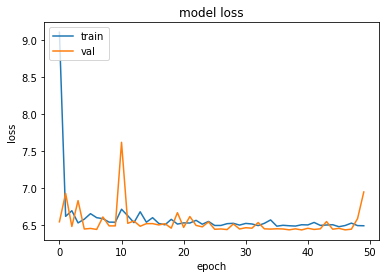

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

inp = df_b_train_airq1.iloc[:, 1:4]
out = df_b_train_airq1['PM10']
print(inp.shape)
print(out.shape)
X_train, X_test, y_train, y_test = train_test_split(inp, out, test_size=0.1)
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())
print(normalizer(X_train).numpy())
print(y_train)
model1 = tf.keras.models.load_model('/content/drive/MyDrive/IfW/combinednn1.h5')
for layer in model1.layers:
  layer.trainable = False
model = tf.keras.Sequential([
    # normalizer,
    tf.keras.layers.InputLayer(input_shape=(3)),
    model1,
    layers.Dense(units=512),
    layers.Dense(units=256),
    layers.Dense(units=128),
    layers.Dense(units=1)
])
model.summary()
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mae')
k = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/IfW/combinednn11.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch"
)
history = model.fit(
    X_train, y_train,
    epochs=50,
    callbacks=[k],
    validation_data=(X_test,y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

SINGAPORE NN1

In [ ]:
df_b_train_weather = c.merge(df_b_train_weather22, how = 'inner', on = ['Y', 'M', 'D'])
df_b_train_weather.dropna(how='any',inplace=True) 
df_b_train_weather

,Y,M,D,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,ID2,RAIN,HR30,HR60,HR120,TEMP_AVG,TEMP_MAX,TEMP_MIN,WIND_SP,MAXWIND_SP
0,2016,1,1,23.866667,30.575,26.50,90.333333,24.100,5.20,3.75,207.5,1.25,2,10.40,5.40,6.20,6.8,26.600,28.5,24.500,10.100,41.8
1,2016,1,1,23.866667,30.575,26.50,90.333333,24.100,5.20,3.75,207.5,1.25,1,3.40,1.00,1.00,1.0,27.000,30.0,24.700,11.200,38.9
2,2016,1,1,23.866667,30.575,26.50,90.333333,24.100,5.20,3.75,207.5,1.25,3,12.20,6.60,8.80,11.2,27.000,28.5,25.300,10.100,40.3
3,2016,1,1,23.866667,30.575,26.50,90.333333,24.100,5.20,3.75,207.5,1.25,4,11.20,5.60,6.00,10.4,25.200,27.1,24.200,5.800,28.1
4,2016,1,1,23.866667,30.575,26.50,90.333333,24.100,5.20,3.75,207.5,1.25,0,6.40,3.80,3.80,3.8,26.800,28.7,24.800,6.100,33.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,2017,12,31,23.250000,30.775,26.15,89.000000,34.075,0.84,4.00,257.5,1.25,2,81.05,16.35,21.45,28.9,24.775,25.7,23.825,7.475,42.5
3651,2017,12,31,23.250000,30.775,26.15,89.000000,34.075,0.84,4.00,257.5,1.25,1,103.60,19.40,28.80,37.8,24.800,25.9,23.800,9.700,69.5
3652,2017,12,31,23.250000,30.775,26.15,89.000000,34.075,0.84,4.00,257.5,1.25,3,109.80,18.00,23.20,38.8,25.200,26.1,24.000,9.400,36.4
3653,2017,12,31,23.250000,30.775,26.15,89.000000,34.075,0.84,4.00,257.5,1.25,4,27.40,5.60,7.00,8.0,24.500,25.3,24.000,5.800,28.8


In [ ]:
df_in = df_b_train_weather.iloc[:, :3]
df_in

,Y,M,D
0,2016,1,1
1,2016,1,1
2,2016,1,1
3,2016,1,1
4,2016,1,1
...,...,...,...
3650,2017,12,31
3651,2017,12,31
3652,2017,12,31
3653,2017,12,31


In [ ]:
df_out = df_b_train_weather.iloc[:, 3:]
df_out

,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,ID2,RAIN,HR30,HR60,HR120,TEMP_AVG,TEMP_MAX,TEMP_MIN,WIND_SP,MAXWIND_SP
0,23.866667,30.575,26.50,90.333333,24.100,5.20,3.75,207.5,1.25,2,10.40,5.40,6.20,6.8,26.600,28.5,24.500,10.100,41.8
1,23.866667,30.575,26.50,90.333333,24.100,5.20,3.75,207.5,1.25,1,3.40,1.00,1.00,1.0,27.000,30.0,24.700,11.200,38.9
2,23.866667,30.575,26.50,90.333333,24.100,5.20,3.75,207.5,1.25,3,12.20,6.60,8.80,11.2,27.000,28.5,25.300,10.100,40.3
3,23.866667,30.575,26.50,90.333333,24.100,5.20,3.75,207.5,1.25,4,11.20,5.60,6.00,10.4,25.200,27.1,24.200,5.800,28.1
4,23.866667,30.575,26.50,90.333333,24.100,5.20,3.75,207.5,1.25,0,6.40,3.80,3.80,3.8,26.800,28.7,24.800,6.100,33.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,23.250000,30.775,26.15,89.000000,34.075,0.84,4.00,257.5,1.25,2,81.05,16.35,21.45,28.9,24.775,25.7,23.825,7.475,42.5
3651,23.250000,30.775,26.15,89.000000,34.075,0.84,4.00,257.5,1.25,1,103.60,19.40,28.80,37.8,24.800,25.9,23.800,9.700,69.5
3652,23.250000,30.775,26.15,89.000000,34.075,0.84,4.00,257.5,1.25,3,109.80,18.00,23.20,38.8,25.200,26.1,24.000,9.400,36.4
3653,23.250000,30.775,26.15,89.000000,34.075,0.84,4.00,257.5,1.25,4,27.40,5.60,7.00,8.0,24.500,25.3,24.000,5.800,28.8


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_in, df_out, test_size=0.1)
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())
print(normalizer(X_train).numpy())
print(y_train)
model = tf.keras.Sequential([
    # normalizer,
    tf.keras.layers.InputLayer(input_shape=(3)),
    layers.Dense(units=128),
    layers.Dense(units=256),
    layers.Dense(units=128),
    layers.Dense(units=19)
])
model.summary()
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mae')
k = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/IfW/combinednn2.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch"
)
history = model.fit(
    X_train, y_train,
    epochs=500,
    callbacks=[k],
    validation_data=(X_test,y_test))

[[2016.5004       6.5214357   15.721491 ]]
[[ 0.9992741  -0.44130364 -0.6510331 ]
 [-1.000739    1.5890979  -0.76482046]
 [ 0.9992741   0.13881108  0.82820207]
 ...
 [-1.000739   -1.3114758   1.2833513 ]
 [-1.000739   -0.44130364  0.7144147 ]
 [-1.000739    1.0089831  -1.675119  ]]
tf.Tensor(
[[25.4        32.175      27.7        ... 24.5         5.8
  25.9       ]
 [23.925      32.25       27.4        ... 26.         10.4
  40.3       ]
 [23.9        32.875      27.96666667 ... 27.3         9.7
  28.4       ]
 ...
 [23.875      31.3        26.96666667 ... 25.1         8.6
  34.6       ]
 [24.8        33.4        27.6        ... 24.1        10.8
  74.9       ]
 [24.8        32.925      28.03333333 ... 25.          7.6
  38.9       ]], shape=(3289, 19), dtype=float64)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               512       
__

SINGAPORE NN2

(2615, 3)
(2615, 46)
[[  16.006805     6.8878036 2016.6199   ]]
[[-0.92112094  0.9672436   0.78298664]
 [-1.2662477  -1.2082956   0.78298664]
 [-1.7264167   0.34566098 -1.2768164 ]
 ...
 [ 0.11425935 -1.5190868   0.78298664]
 [-1.1512054   0.6564523  -1.2768164 ]
 [-0.23086743  0.34566098  0.78298664]]
tf.Tensor(
[[32. 23. 32. ... 19. 33. 20.]
 [25. 15. 26. ... 17. 27. 17.]
 [40. 19. 41. ... 20. 31. 19.]
 ...
 [42. 16. 43. ... 16. 45. 16.]
 [34. 27. 34. ... 16. 23. 15.]
 [15.  9. 15. ... 10. 16. 10.]], shape=(2353, 46), dtype=float64)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 19)                68883     
_________________________________________________________________
dense_22 (Dense)             (None, 512)               10240     
_________________________________________________________________
dense_23 (Dense)             (None, 256) 

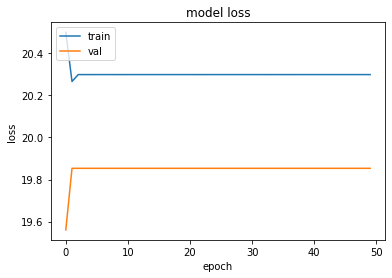

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

inp = df_b_train_airq2.iloc[:, 1:4]
out = df_b_train_airq2.iloc[:, 4:]
print(inp.shape)
print(out.shape)
X_train, X_test, y_train, y_test = train_test_split(inp, out, test_size=0.1)
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())
print(normalizer(X_train).numpy())
print(y_train)
model1 = tf.keras.models.load_model('/content/drive/MyDrive/IfW/combinednn2.h5')
for layer in model1.layers:
  layer.trainable = False
model = tf.keras.Sequential([
    # normalizer,
    tf.keras.layers.InputLayer(input_shape=(3)),
    model1,
    layers.Dense(units=512),
    layers.Dense(units=256),
    layers.Dense(units=128),
    layers.Dense(units=46,activation='relu')
])
model.summary()
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mae')
k = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/IfW/combinednn22.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch"
)
history = model.fit(
    X_train, y_train,
    epochs=50,
    callbacks=[k],
    validation_data=(X_test,y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

THAILAND NN1

In [ ]:
df_b_train_weather = c.merge(df_b_train_weather23, how = 'inner', on = ['Y', 'M', 'D'])
df_b_train_weather.dropna(how='any',inplace=True) 
df_b_train_weather

,Y,M,D,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,ID3,TEMP_AVG,TEMP_MIN,TEMP_MAX,HUM_AVG,HUM_MIN,HUM_MAX,RAIN,WIND_SP,WIND_DD,WIND_DC,MAXWIND_SP,MAXWIND_DD,MAXWIND_DC
0,2010,1,1,24.05,31.550,26.625,86.75,3.000,2.475,3.75,253.75,3.00,3,28.2,26.8,31.2,76.0,65.0,85.0,0.0,9.5,74.0,0,18.0,75.0,0
1,2010,1,1,24.05,31.550,26.625,86.75,3.000,2.475,3.75,253.75,3.00,2,28.2,23.6,32.7,70.0,51.0,88.0,0.4,6.0,61.0,0,16.6,69.0,0
2,2010,1,1,24.05,31.550,26.625,86.75,3.000,2.475,3.75,253.75,3.00,1,27.6,23.5,31.8,77.0,53.0,97.0,0.0,3.5,69.0,1,15.5,87.0,1
3,2010,1,1,24.05,31.550,26.625,86.75,3.000,2.475,3.75,253.75,3.00,5,25.9,22.8,29.0,84.0,64.0,93.0,2.8,1.1,75.0,1,12.6,96.0,1
4,2010,1,1,24.05,31.550,26.625,86.75,3.000,2.475,3.75,253.75,3.00,0,27.0,23.8,29.5,80.0,66.0,90.0,3.6,6.4,101.0,2,20.9,54.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,2017,12,31,23.25,30.775,26.150,89.00,34.075,0.840,4.00,257.50,1.25,2,28.3,25.9,32.6,68.0,53.0,78.0,0.0,9.9,55.0,4,25.6,51.0,2
11684,2017,12,31,23.25,30.775,26.150,89.00,34.075,0.840,4.00,257.50,1.25,1,26.4,23.2,32.0,80.0,54.0,90.0,8.4,5.8,79.0,2,29.2,66.0,0
11685,2017,12,31,23.25,30.775,26.150,89.00,34.075,0.840,4.00,257.50,1.25,5,26.0,23.3,29.6,85.0,71.0,97.0,0.4,7.7,74.0,0,19.4,88.0,1
11686,2017,12,31,23.25,30.775,26.150,89.00,34.075,0.840,4.00,257.50,1.25,0,27.5,25.0,30.4,73.0,66.0,87.0,0.2,21.6,90.0,2,31.0,85.0,1


In [ ]:
df_in = df_b_train_weather.iloc[:, :3]
df_in

,Y,M,D
0,2010,1,1
1,2010,1,1
2,2010,1,1
3,2010,1,1
4,2010,1,1
...,...,...,...
11683,2017,12,31
11684,2017,12,31
11685,2017,12,31
11686,2017,12,31


In [ ]:
df_out = df_b_train_weather.iloc[:, 3:]
df_out

,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,ID3,TEMP_AVG,TEMP_MIN,TEMP_MAX,HUM_AVG,HUM_MIN,HUM_MAX,RAIN,WIND_SP,WIND_DD,WIND_DC,MAXWIND_SP,MAXWIND_DD,MAXWIND_DC
0,24.05,31.550,26.625,86.75,3.000,2.475,3.75,253.75,3.00,3,28.2,26.8,31.2,76.0,65.0,85.0,0.0,9.5,74.0,0,18.0,75.0,0
1,24.05,31.550,26.625,86.75,3.000,2.475,3.75,253.75,3.00,2,28.2,23.6,32.7,70.0,51.0,88.0,0.4,6.0,61.0,0,16.6,69.0,0
2,24.05,31.550,26.625,86.75,3.000,2.475,3.75,253.75,3.00,1,27.6,23.5,31.8,77.0,53.0,97.0,0.0,3.5,69.0,1,15.5,87.0,1
3,24.05,31.550,26.625,86.75,3.000,2.475,3.75,253.75,3.00,5,25.9,22.8,29.0,84.0,64.0,93.0,2.8,1.1,75.0,1,12.6,96.0,1
4,24.05,31.550,26.625,86.75,3.000,2.475,3.75,253.75,3.00,0,27.0,23.8,29.5,80.0,66.0,90.0,3.6,6.4,101.0,2,20.9,54.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,23.25,30.775,26.150,89.00,34.075,0.840,4.00,257.50,1.25,2,28.3,25.9,32.6,68.0,53.0,78.0,0.0,9.9,55.0,4,25.6,51.0,2
11684,23.25,30.775,26.150,89.00,34.075,0.840,4.00,257.50,1.25,1,26.4,23.2,32.0,80.0,54.0,90.0,8.4,5.8,79.0,2,29.2,66.0,0
11685,23.25,30.775,26.150,89.00,34.075,0.840,4.00,257.50,1.25,5,26.0,23.3,29.6,85.0,71.0,97.0,0.4,7.7,74.0,0,19.4,88.0,1
11686,23.25,30.775,26.150,89.00,34.075,0.840,4.00,257.50,1.25,0,27.5,25.0,30.4,73.0,66.0,87.0,0.2,21.6,90.0,2,31.0,85.0,1


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_in, df_out, test_size=0.1)
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())
print(normalizer(X_train).numpy())
print(y_train)
model = tf.keras.Sequential([
    # normalizer,
    tf.keras.layers.InputLayer(input_shape=(3)),
    layers.Dense(units=128),
    layers.Dense(units=256),
    layers.Dense(units=128),
    layers.Dense(units=23)
])
model.summary()
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mae')
k = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/IfW/combinednn3.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch"
)
history = model.fit(
    X_train, y_train,
    epochs=500,
    callbacks=[k],
    validation_data=(X_test,y_test))

[[2012.9318       6.3924346   15.718127 ]]
[[ 1.6519262   1.3710988  -1.6723915 ]
 [ 0.02770807  0.7759477   0.6001687 ]
 [-0.78440094  1.6686743  -1.4451355 ]
 ...
 [-0.37834644 -1.0095055   1.1683087 ]
 [ 1.6519262  -0.41435447  1.7364488 ]
 [-1.1904554  -1.0095055  -0.9906235 ]]
tf.Tensor(
[[ 24.86666667  33.46666667  27.6        ...  15.8         56.
    2.        ]
 [ 22.575       32.575       27.75       ...  18.          45.
    2.        ]
 [ 23.55        29.35        26.25       ...  16.2        226.
   14.        ]
 ...
 [ 24.65        33.2         26.675      ...  20.16       122.8
    3.        ]
 [ 24.35        32.8         28.16666667 ...  17.3        236.
   14.        ]
 [ 23.7         33.55        28.8        ...  14.8        336.
   16.        ]], shape=(10519, 23), dtype=float64)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 

THAILAND NN2

(1324, 3)
(1324, 48)
[[  16.11083      7.1729636 2015.3649   ]]
[[-0.35604435 -1.5998135  -0.7414208 ]
 [ 1.360753    0.8743017  -1.2846386 ]
 [ 0.5595809  -0.67202026  0.8882329 ]
 ...
 [-0.5849507   0.5650373   0.8882329 ]
 [-1.0427634   0.8743017   0.8882329 ]
 [-0.2415912  -0.3627559  -1.2846386 ]]
tf.Tensor(
[[39. 37. 35. ... 19. 21. 20.]
 [16. 20. 17. ... 41. 44. 43.]
 [42. 65. 59. ...  4.  7. 13.]
 ...
 [24. 16. 18. ... 11. 10. 10.]
 [34. 27. 22. ... 14. 15. 11.]
 [37. 52. 61. ... 25. 15. 12.]], shape=(1191, 48), dtype=float64)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 23)                69399     
_________________________________________________________________
dense_26 (Dense)             (None, 512)               12288     
_________________________________________________________________
dense_27 (Dense)             (None, 256) 

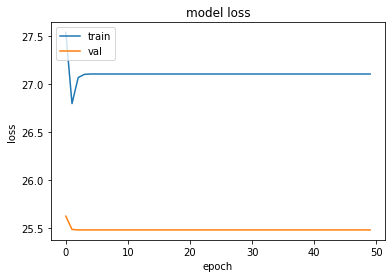

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

inp = df_b_train_airq3.iloc[:, 1:4]
out = df_b_train_airq3.iloc[:, 4:]
print(inp.shape)
print(out.shape)
X_train, X_test, y_train, y_test = train_test_split(inp, out, test_size=0.1)
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())
print(normalizer(X_train).numpy())
print(y_train)
model1 = tf.keras.models.load_model('/content/drive/MyDrive/IfW/combinednn3.h5')
for layer in model1.layers:
  layer.trainable = False
model = tf.keras.Sequential([
    # normalizer,
    tf.keras.layers.InputLayer(input_shape=(3)),
    model1,
    layers.Dense(units=512),
    layers.Dense(units=256),
    layers.Dense(units=128),
    layers.Dense(units=48,activation='relu')
])
model.summary()
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mae')
k = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/IfW/combinednn33.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch"
)
history = model.fit(
    X_train, y_train,
    epochs=50,
    callbacks=[k],
    validation_data=(X_test,y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Subtask 3

## transfer learning-using singapore's predicting model(neural network) to retrain on Thailand's data

data preparation

In [ ]:
import pandas as pd
df_b_test = pd.read_csv('/content/drive/MyDrive/Task 1/Thailand/Testing/th_test_airquality.csv',encoding = "ISO-8859-1")
df_b_train_airq = pd.read_csv('/content/drive/MyDrive/Task 1/Thailand/Training/th_train_airquality.csv',encoding = "ISO-8859-1")
df_b_train_station = pd.read_csv('/content/drive/MyDrive/Task 1/Thailand/Training/th_train_station.csv',encoding = "ISO-8859-1")
df_b_train_weather = pd.read_csv('/content/drive/MyDrive/Task 1/Thailand/Training/th_train_weather.csv',encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_b_train_station.rename(columns={'ï»¿ID': 'ID'}, inplace=True)
k = df_b_train_station.groupby(['PROVINCE','ID'])
print(k.first())

                                                            NAME  ...   LONGITUDE
PROVINCE    ID                                                    ...            
Narathiwat  62T                            City Hall, Narathiwat  ...  101.823427
            87                        Narathiwat Weather Station  ...  101.816694
Phuket      43T                          Municipal Health Center  ...   98.391281
            68          Phuket Airport Weather Observing Station  ...   98.307778
Satun       63                   Satun Weather Observing Station  ...  100.083111
            80T                                 City Hall, Satun  ...  100.066152
Songkhla    44T                             Hat Yai Municipality  ...  100.484056
            52                Songkhla Weather Observing Station  ...  100.604194
Surat Thani 42T       Environment Agency Section 14, Surat Thani  ...   99.325148
            88   Kanjanadit Kanjanadit Agrometeorlogical Station  ...   99.733333
Yala        63T 

In [ ]:
kk = k['ID'].apply(list).groupby(level=0).apply(list)
l = []
for n,i in enumerate(kk):
  l1 = []
  for j in i:
    l1.append(j[0])
  # l1.append(n)
  l.append(l1)
print(l)
ll = dict()
for n,i in enumerate(l):
  for j in i:
    ll[j] = n
print(ll)

[['62T', '87'], ['43T', '68'], ['63', '80T'], ['44T', '52'], ['42T', '88'], ['63T', '86']]
{'62T': 0, '87': 0, '43T': 1, '68': 1, '63': 2, '80T': 2, '44T': 3, '52': 3, '42T': 4, '88': 4, '63T': 5, '86': 5}


In [ ]:
df_b_train_airq = df_b_train_airq.dropna(how='any',axis=0)
def func(x):
  r = x.split("-")
  return r[0], r[1], "".join(['20',r[2].strip()])

df_b_train_airq['D'], df_b_train_airq['M'], df_b_train_airq['Y'] = zip(*df_b_train_airq['DATE'].map(func))
df_b_train_airq.dtypes
df_b_train_airq

,ï»¿ID,DATE,PM10_1,PM10_2,PM10_3,PM10_4,PM10_5,PM10_6,PM10_7,PM10_8,PM10_9,PM10_10,PM10_11,PM10_12,PM10_13,PM10_14,PM10_15,PM10_16,PM10_17,PM10_18,PM10_19,PM10_20,PM10_21,PM10_22,PM10_23,PM10_24,PM25_1,PM25_2,PM25_3,PM25_4,PM25_5,PM25_6,PM25_7,PM25_8,PM25_9,PM25_10,PM25_11,PM25_12,PM25_13,PM25_14,PM25_15,PM25_16,PM25_17,PM25_18,PM25_19,PM25_20,PM25_21,PM25_22,PM25_23,PM25_24,D,M,Y
5408,44T,20-06-12,28.0,26.0,24.0,32.0,50.0,39.0,32.0,30.0,39.0,37.0,26.0,33.0,25.0,25.0,21.0,31.0,25.0,23.0,19.0,29.0,34.0,38.0,49.0,41.0,11.0,17.0,16.0,33.0,40.0,34.0,22.0,25.0,33.0,20.0,20.0,14.0,18.0,13.0,16.0,12.0,16.0,12.0,17.0,24.0,20.0,26.0,10,38.0,20,06,2012
5420,44T,22-06-12,68.0,59.0,68.0,65.0,57.0,65.0,61.0,68.0,89.0,76.0,57.0,61.0,45.0,46.0,41.0,51.0,40.0,52.0,55.0,69.0,73.0,79.0,71.0,70.0,56.0,53.0,56.0,50.0,45.0,51.0,56.0,60.0,53.0,48.0,46.0,32.0,25.0,28.0,32.0,24.0,35.0,29.0,50.0,48.0,43.0,45.0,35,40.0,22,06,2012
5426,44T,23-06-12,71.0,88.0,72.0,76.0,65.0,60.0,52.0,56.0,68.0,67.0,69.0,50.0,45.0,52.0,43.0,24.0,23.0,32.0,28.0,31.0,37.0,52.0,55.0,51.0,49.0,58.0,52.0,59.0,57.0,42.0,29.0,32.0,48.0,47.0,40.0,35.0,32.0,29.0,27.0,16.0,11.0,18.0,11.0,16.0,23.0,27.0,30,46.0,23,06,2012
5432,44T,24-06-12,65.0,27.0,40.0,39.0,60.0,57.0,76.0,57.0,40.0,43.0,31.0,34.0,31.0,34.0,44.0,33.0,20.0,24.0,28.0,30.0,28.0,49.0,35.0,37.0,52.0,27.0,36.0,37.0,39.0,51.0,53.0,36.0,24.0,26.0,10.0,17.0,16.0,21.0,22.0,18.0,30.0,15.0,17.0,16.0,28.0,31.0,23,22.0,24,06,2012
5450,44T,27-06-12,39.0,20.0,53.0,44.0,42.0,29.0,28.0,44.0,59.0,68.0,46.0,21.0,24.0,13.0,14.0,16.0,23.0,19.0,17.0,19.0,18.0,16.0,23.0,34.0,19.0,15.0,18.0,23.0,27.0,25.0,25.0,28.0,32.0,32.0,27.0,23.0,20.0,17.0,13.0,10.0,11.0,11.0,12.0,13.0,11.0,10.0,11,12.0,27,06,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17524,63T,30-12-17,27.0,25.0,35.0,28.0,31.0,34.0,34.0,41.0,48.0,49.0,31.0,45.0,38.0,29.0,41.0,31.0,48.0,44.0,35.0,52.0,41.0,45.0,61.0,37.0,15.0,12.0,19.0,16.0,15.0,11.0,17.0,18.0,18.0,19.0,17.0,19.0,15.0,19.0,15.0,15.0,19.0,18.0,21.0,21.0,22.0,22.0,19,16.0,30,12,2017
17525,80T,30-12-17,17.0,18.0,15.0,13.0,16.0,16.0,16.0,20.0,26.0,22.0,17.0,18.0,22.0,21.0,20.0,17.0,20.0,23.0,23.0,27.0,27.0,26.0,21.0,27.0,4.0,7.0,2.0,5.0,5.0,8.0,6.0,7.0,22.0,8.0,4.0,4.0,1.0,2.0,4.0,8.0,11.0,11.0,10.0,12.0,17.0,15.0,6,8.0,30,12,2017
17528,44T,31-12-17,26.0,26.0,22.0,15.0,20.0,22.0,21.0,26.0,26.0,31.0,28.0,34.0,30.0,28.0,26.0,29.0,24.0,24.0,29.0,27.0,26.0,23.0,25.0,21.0,12.0,5.0,3.0,4.0,4.0,7.0,12.0,16.0,16.0,15.0,14.0,11.0,11.0,9.0,5.0,7.0,10.0,11.0,12.0,12.0,11.0,12.0,11,5.0,31,12,2017
17530,63T,31-12-17,34.0,32.0,38.0,32.0,33.0,32.0,33.0,49.0,58.0,54.0,33.0,27.0,44.0,46.0,42.0,41.0,38.0,37.0,48.0,46.0,39.0,48.0,44.0,44.0,15.0,16.0,17.0,15.0,15.0,17.0,15.0,17.0,22.0,24.0,18.0,18.0,18.0,17.0,19.0,18.0,18.0,18.0,18.0,20.0,18.0,21.0,18,19.0,31,12,2017


In [ ]:
df_b_train_airq['Y'] = df_b_train_airq['Y'].apply(pd.to_numeric)
df_b_train_airq['M'] = df_b_train_airq['M'].apply(pd.to_numeric)
df_b_train_airq['D'] = df_b_train_airq['D'].apply(pd.to_numeric)
# df_b_train_airq.dtypes
df_b_train_airq = df_b_train_airq.drop('DATE', 1)
df_b_train_airq

,ï»¿ID,PM10_1,PM10_2,PM10_3,PM10_4,PM10_5,PM10_6,PM10_7,PM10_8,PM10_9,PM10_10,PM10_11,PM10_12,PM10_13,PM10_14,PM10_15,PM10_16,PM10_17,PM10_18,PM10_19,PM10_20,PM10_21,PM10_22,PM10_23,PM10_24,PM25_1,PM25_2,PM25_3,PM25_4,PM25_5,PM25_6,PM25_7,PM25_8,PM25_9,PM25_10,PM25_11,PM25_12,PM25_13,PM25_14,PM25_15,PM25_16,PM25_17,PM25_18,PM25_19,PM25_20,PM25_21,PM25_22,PM25_23,PM25_24,D,M,Y
5408,44T,28.0,26.0,24.0,32.0,50.0,39.0,32.0,30.0,39.0,37.0,26.0,33.0,25.0,25.0,21.0,31.0,25.0,23.0,19.0,29.0,34.0,38.0,49.0,41.0,11.0,17.0,16.0,33.0,40.0,34.0,22.0,25.0,33.0,20.0,20.0,14.0,18.0,13.0,16.0,12.0,16.0,12.0,17.0,24.0,20.0,26.0,10,38.0,20,6,2012
5420,44T,68.0,59.0,68.0,65.0,57.0,65.0,61.0,68.0,89.0,76.0,57.0,61.0,45.0,46.0,41.0,51.0,40.0,52.0,55.0,69.0,73.0,79.0,71.0,70.0,56.0,53.0,56.0,50.0,45.0,51.0,56.0,60.0,53.0,48.0,46.0,32.0,25.0,28.0,32.0,24.0,35.0,29.0,50.0,48.0,43.0,45.0,35,40.0,22,6,2012
5426,44T,71.0,88.0,72.0,76.0,65.0,60.0,52.0,56.0,68.0,67.0,69.0,50.0,45.0,52.0,43.0,24.0,23.0,32.0,28.0,31.0,37.0,52.0,55.0,51.0,49.0,58.0,52.0,59.0,57.0,42.0,29.0,32.0,48.0,47.0,40.0,35.0,32.0,29.0,27.0,16.0,11.0,18.0,11.0,16.0,23.0,27.0,30,46.0,23,6,2012
5432,44T,65.0,27.0,40.0,39.0,60.0,57.0,76.0,57.0,40.0,43.0,31.0,34.0,31.0,34.0,44.0,33.0,20.0,24.0,28.0,30.0,28.0,49.0,35.0,37.0,52.0,27.0,36.0,37.0,39.0,51.0,53.0,36.0,24.0,26.0,10.0,17.0,16.0,21.0,22.0,18.0,30.0,15.0,17.0,16.0,28.0,31.0,23,22.0,24,6,2012
5450,44T,39.0,20.0,53.0,44.0,42.0,29.0,28.0,44.0,59.0,68.0,46.0,21.0,24.0,13.0,14.0,16.0,23.0,19.0,17.0,19.0,18.0,16.0,23.0,34.0,19.0,15.0,18.0,23.0,27.0,25.0,25.0,28.0,32.0,32.0,27.0,23.0,20.0,17.0,13.0,10.0,11.0,11.0,12.0,13.0,11.0,10.0,11,12.0,27,6,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17524,63T,27.0,25.0,35.0,28.0,31.0,34.0,34.0,41.0,48.0,49.0,31.0,45.0,38.0,29.0,41.0,31.0,48.0,44.0,35.0,52.0,41.0,45.0,61.0,37.0,15.0,12.0,19.0,16.0,15.0,11.0,17.0,18.0,18.0,19.0,17.0,19.0,15.0,19.0,15.0,15.0,19.0,18.0,21.0,21.0,22.0,22.0,19,16.0,30,12,2017
17525,80T,17.0,18.0,15.0,13.0,16.0,16.0,16.0,20.0,26.0,22.0,17.0,18.0,22.0,21.0,20.0,17.0,20.0,23.0,23.0,27.0,27.0,26.0,21.0,27.0,4.0,7.0,2.0,5.0,5.0,8.0,6.0,7.0,22.0,8.0,4.0,4.0,1.0,2.0,4.0,8.0,11.0,11.0,10.0,12.0,17.0,15.0,6,8.0,30,12,2017
17528,44T,26.0,26.0,22.0,15.0,20.0,22.0,21.0,26.0,26.0,31.0,28.0,34.0,30.0,28.0,26.0,29.0,24.0,24.0,29.0,27.0,26.0,23.0,25.0,21.0,12.0,5.0,3.0,4.0,4.0,7.0,12.0,16.0,16.0,15.0,14.0,11.0,11.0,9.0,5.0,7.0,10.0,11.0,12.0,12.0,11.0,12.0,11,5.0,31,12,2017
17530,63T,34.0,32.0,38.0,32.0,33.0,32.0,33.0,49.0,58.0,54.0,33.0,27.0,44.0,46.0,42.0,41.0,38.0,37.0,48.0,46.0,39.0,48.0,44.0,44.0,15.0,16.0,17.0,15.0,15.0,17.0,15.0,17.0,22.0,24.0,18.0,18.0,18.0,17.0,19.0,18.0,18.0,18.0,18.0,20.0,18.0,21.0,18,19.0,31,12,2017


In [ ]:
cols = df_b_train_airq.columns.tolist()
cols = [cols[0]] + cols[-3:] + cols[1:-3]
df_b_train_airq = df_b_train_airq[cols]
df_b_train_airq

,ï»¿ID,D,M,Y,PM10_1,PM10_2,PM10_3,PM10_4,PM10_5,PM10_6,PM10_7,PM10_8,PM10_9,PM10_10,PM10_11,PM10_12,PM10_13,PM10_14,PM10_15,PM10_16,PM10_17,PM10_18,PM10_19,PM10_20,PM10_21,PM10_22,PM10_23,PM10_24,PM25_1,PM25_2,PM25_3,PM25_4,PM25_5,PM25_6,PM25_7,PM25_8,PM25_9,PM25_10,PM25_11,PM25_12,PM25_13,PM25_14,PM25_15,PM25_16,PM25_17,PM25_18,PM25_19,PM25_20,PM25_21,PM25_22,PM25_23,PM25_24
5408,44T,20,6,2012,28.0,26.0,24.0,32.0,50.0,39.0,32.0,30.0,39.0,37.0,26.0,33.0,25.0,25.0,21.0,31.0,25.0,23.0,19.0,29.0,34.0,38.0,49.0,41.0,11.0,17.0,16.0,33.0,40.0,34.0,22.0,25.0,33.0,20.0,20.0,14.0,18.0,13.0,16.0,12.0,16.0,12.0,17.0,24.0,20.0,26.0,10,38.0
5420,44T,22,6,2012,68.0,59.0,68.0,65.0,57.0,65.0,61.0,68.0,89.0,76.0,57.0,61.0,45.0,46.0,41.0,51.0,40.0,52.0,55.0,69.0,73.0,79.0,71.0,70.0,56.0,53.0,56.0,50.0,45.0,51.0,56.0,60.0,53.0,48.0,46.0,32.0,25.0,28.0,32.0,24.0,35.0,29.0,50.0,48.0,43.0,45.0,35,40.0
5426,44T,23,6,2012,71.0,88.0,72.0,76.0,65.0,60.0,52.0,56.0,68.0,67.0,69.0,50.0,45.0,52.0,43.0,24.0,23.0,32.0,28.0,31.0,37.0,52.0,55.0,51.0,49.0,58.0,52.0,59.0,57.0,42.0,29.0,32.0,48.0,47.0,40.0,35.0,32.0,29.0,27.0,16.0,11.0,18.0,11.0,16.0,23.0,27.0,30,46.0
5432,44T,24,6,2012,65.0,27.0,40.0,39.0,60.0,57.0,76.0,57.0,40.0,43.0,31.0,34.0,31.0,34.0,44.0,33.0,20.0,24.0,28.0,30.0,28.0,49.0,35.0,37.0,52.0,27.0,36.0,37.0,39.0,51.0,53.0,36.0,24.0,26.0,10.0,17.0,16.0,21.0,22.0,18.0,30.0,15.0,17.0,16.0,28.0,31.0,23,22.0
5450,44T,27,6,2012,39.0,20.0,53.0,44.0,42.0,29.0,28.0,44.0,59.0,68.0,46.0,21.0,24.0,13.0,14.0,16.0,23.0,19.0,17.0,19.0,18.0,16.0,23.0,34.0,19.0,15.0,18.0,23.0,27.0,25.0,25.0,28.0,32.0,32.0,27.0,23.0,20.0,17.0,13.0,10.0,11.0,11.0,12.0,13.0,11.0,10.0,11,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17524,63T,30,12,2017,27.0,25.0,35.0,28.0,31.0,34.0,34.0,41.0,48.0,49.0,31.0,45.0,38.0,29.0,41.0,31.0,48.0,44.0,35.0,52.0,41.0,45.0,61.0,37.0,15.0,12.0,19.0,16.0,15.0,11.0,17.0,18.0,18.0,19.0,17.0,19.0,15.0,19.0,15.0,15.0,19.0,18.0,21.0,21.0,22.0,22.0,19,16.0
17525,80T,30,12,2017,17.0,18.0,15.0,13.0,16.0,16.0,16.0,20.0,26.0,22.0,17.0,18.0,22.0,21.0,20.0,17.0,20.0,23.0,23.0,27.0,27.0,26.0,21.0,27.0,4.0,7.0,2.0,5.0,5.0,8.0,6.0,7.0,22.0,8.0,4.0,4.0,1.0,2.0,4.0,8.0,11.0,11.0,10.0,12.0,17.0,15.0,6,8.0
17528,44T,31,12,2017,26.0,26.0,22.0,15.0,20.0,22.0,21.0,26.0,26.0,31.0,28.0,34.0,30.0,28.0,26.0,29.0,24.0,24.0,29.0,27.0,26.0,23.0,25.0,21.0,12.0,5.0,3.0,4.0,4.0,7.0,12.0,16.0,16.0,15.0,14.0,11.0,11.0,9.0,5.0,7.0,10.0,11.0,12.0,12.0,11.0,12.0,11,5.0
17530,63T,31,12,2017,34.0,32.0,38.0,32.0,33.0,32.0,33.0,49.0,58.0,54.0,33.0,27.0,44.0,46.0,42.0,41.0,38.0,37.0,48.0,46.0,39.0,48.0,44.0,44.0,15.0,16.0,17.0,15.0,15.0,17.0,15.0,17.0,22.0,24.0,18.0,18.0,18.0,17.0,19.0,18.0,18.0,18.0,18.0,20.0,18.0,21.0,18,19.0


In [ ]:
df_b_train_airq.rename(columns={'ï»¿ID': 'ID'}, inplace=True)

In [ ]:
for i in range(1,25):
  df_b_train_airq[f"PM10_{i}"] = pd.to_numeric(df_b_train_airq[f"PM10_{i}"], errors='coerce')
  df_b_train_airq[f"PM10_{i}"] = df_b_train_airq[f"PM10_{i}"].fillna(df_b_train_airq.groupby(["Y","M","D"])[f"PM10_{i}"].transform('mean'))
  df_b_train_airq[f"PM25_{i}"] = pd.to_numeric(df_b_train_airq[f"PM25_{i}"], errors='coerce')
  df_b_train_airq[f"PM25_{i}"] = df_b_train_airq[f"PM25_{i}"].fillna(df_b_train_airq.groupby(["Y","M","D"])[f"PM25_{i}"].transform('mean'))
df_b_train_airq = df_b_train_airq.replace({"ID": ll})
df_b_train_airq

,ID,D,M,Y,PM10_1,PM10_2,PM10_3,PM10_4,PM10_5,PM10_6,PM10_7,PM10_8,PM10_9,PM10_10,PM10_11,PM10_12,PM10_13,PM10_14,PM10_15,PM10_16,PM10_17,PM10_18,PM10_19,PM10_20,PM10_21,PM10_22,PM10_23,PM10_24,PM25_1,PM25_2,PM25_3,PM25_4,PM25_5,PM25_6,PM25_7,PM25_8,PM25_9,PM25_10,PM25_11,PM25_12,PM25_13,PM25_14,PM25_15,PM25_16,PM25_17,PM25_18,PM25_19,PM25_20,PM25_21,PM25_22,PM25_23,PM25_24
5408,3,20,6,2012,28.0,26.0,24.0,32.0,50.0,39.0,32.0,30.0,39.0,37.0,26.0,33.0,25.0,25.0,21.0,31.0,25.0,23.0,19.0,29.0,34.0,38.0,49.0,41.0,11.0,17.0,16.0,33.0,40.0,34.0,22.0,25.0,33.0,20.0,20.0,14.0,18.0,13.0,16.0,12.0,16.0,12.0,17.0,24.0,20.0,26.0,10.0,38.0
5420,3,22,6,2012,68.0,59.0,68.0,65.0,57.0,65.0,61.0,68.0,89.0,76.0,57.0,61.0,45.0,46.0,41.0,51.0,40.0,52.0,55.0,69.0,73.0,79.0,71.0,70.0,56.0,53.0,56.0,50.0,45.0,51.0,56.0,60.0,53.0,48.0,46.0,32.0,25.0,28.0,32.0,24.0,35.0,29.0,50.0,48.0,43.0,45.0,35.0,40.0
5426,3,23,6,2012,71.0,88.0,72.0,76.0,65.0,60.0,52.0,56.0,68.0,67.0,69.0,50.0,45.0,52.0,43.0,24.0,23.0,32.0,28.0,31.0,37.0,52.0,55.0,51.0,49.0,58.0,52.0,59.0,57.0,42.0,29.0,32.0,48.0,47.0,40.0,35.0,32.0,29.0,27.0,16.0,11.0,18.0,11.0,16.0,23.0,27.0,30.0,46.0
5432,3,24,6,2012,65.0,27.0,40.0,39.0,60.0,57.0,76.0,57.0,40.0,43.0,31.0,34.0,31.0,34.0,44.0,33.0,20.0,24.0,28.0,30.0,28.0,49.0,35.0,37.0,52.0,27.0,36.0,37.0,39.0,51.0,53.0,36.0,24.0,26.0,10.0,17.0,16.0,21.0,22.0,18.0,30.0,15.0,17.0,16.0,28.0,31.0,23.0,22.0
5450,3,27,6,2012,39.0,20.0,53.0,44.0,42.0,29.0,28.0,44.0,59.0,68.0,46.0,21.0,24.0,13.0,14.0,16.0,23.0,19.0,17.0,19.0,18.0,16.0,23.0,34.0,19.0,15.0,18.0,23.0,27.0,25.0,25.0,28.0,32.0,32.0,27.0,23.0,20.0,17.0,13.0,10.0,11.0,11.0,12.0,13.0,11.0,10.0,11.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17524,5,30,12,2017,27.0,25.0,35.0,28.0,31.0,34.0,34.0,41.0,48.0,49.0,31.0,45.0,38.0,29.0,41.0,31.0,48.0,44.0,35.0,52.0,41.0,45.0,61.0,37.0,15.0,12.0,19.0,16.0,15.0,11.0,17.0,18.0,18.0,19.0,17.0,19.0,15.0,19.0,15.0,15.0,19.0,18.0,21.0,21.0,22.0,22.0,19.0,16.0
17525,2,30,12,2017,17.0,18.0,15.0,13.0,16.0,16.0,16.0,20.0,26.0,22.0,17.0,18.0,22.0,21.0,20.0,17.0,20.0,23.0,23.0,27.0,27.0,26.0,21.0,27.0,4.0,7.0,2.0,5.0,5.0,8.0,6.0,7.0,22.0,8.0,4.0,4.0,1.0,2.0,4.0,8.0,11.0,11.0,10.0,12.0,17.0,15.0,6.0,8.0
17528,3,31,12,2017,26.0,26.0,22.0,15.0,20.0,22.0,21.0,26.0,26.0,31.0,28.0,34.0,30.0,28.0,26.0,29.0,24.0,24.0,29.0,27.0,26.0,23.0,25.0,21.0,12.0,5.0,3.0,4.0,4.0,7.0,12.0,16.0,16.0,15.0,14.0,11.0,11.0,9.0,5.0,7.0,10.0,11.0,12.0,12.0,11.0,12.0,11.0,5.0
17530,5,31,12,2017,34.0,32.0,38.0,32.0,33.0,32.0,33.0,49.0,58.0,54.0,33.0,27.0,44.0,46.0,42.0,41.0,38.0,37.0,48.0,46.0,39.0,48.0,44.0,44.0,15.0,16.0,17.0,15.0,15.0,17.0,15.0,17.0,22.0,24.0,18.0,18.0,18.0,17.0,19.0,18.0,18.0,18.0,18.0,20.0,18.0,21.0,18.0,19.0


In [ ]:
df_b_train_weather.head()

,ID,DATE,TEMP_AVG,TEMP_MIN,TEMP_MAX,HUM_AVG,HUM_MIN,HUM_MAX,RAIN,WIND_SP,WIND_DD,WIND_DC,MAXWIND_SP,MAXWIND_DD,MAXWIND_DC
0,52,10/01/01,28.2,26.8,31.2,76,65,85,0.0,9.5,74,ENE,18.0,75,ENE
1,63,10/01/01,28.2,23.6,32.7,70,51,88,0.4,6.0,61,ENE,16.6,69,ENE
2,68,10/01/01,27.6,23.5,31.8,77,53,97,0.0,3.5,69,CALM,15.5,87,E
3,86,10/01/01,25.9,22.8,29.0,84,64,93,2.8,1.1,75,CALM,12.6,96,E
4,87,10/01/01,27.0,23.8,29.5,80,66,90,3.6,6.4,101,E,20.9,54,NE


In [ ]:
kk1 = df_b_train_weather['WIND_DC'].unique()
d = dict()
for j,i in enumerate(kk1):
  try:
    d[i] = j
  except:
    d['nan'] = j
print(d)
df_b_train_weather2 = df_b_train_weather.replace({"WIND_DC": d})
kk1 = df_b_train_weather['MAXWIND_DC'].unique()
d = dict()
for j,i in enumerate(kk1):
  try:
    d[i] = j
  except:
    d['nan'] = j
print(d)
df_b_train_weather2 = df_b_train_weather2.replace({"MAXWIND_DC": d})
df_b_train_weather2['ID'] = df_b_train_weather2['ID'].astype("string")
df_b_train_weather2 = df_b_train_weather2.replace({"ID": ll})
df_b_train_weather2

{'\xa0ENE': 0, '\xa0CALM': 1, '\xa0 E': 2, '\xa0': 3, '\xa0 NE': 4, '\xa0SSE': 5, '\xa0ESE': 6, '\xa0 SE': 7, '\xa0NNE': 8, '\xa0 N': 9, '\xa0 NW': 10, '\xa0NNW': 11, '\xa0WNW': 12, '\xa0 S': 13, '\xa0 SW': 14, '\xa0SSW': 15, '\xa0 W': 16, '\xa0WSW': 17, nan: 18}
{'\xa0ENE': 0, '\xa0 E': 1, '\xa0 NE': 2, '\xa0': 3, '\xa0 SE': 4, '\xa0 NW': 5, '\xa0SSW': 6, '\xa0NNE': 7, '\xa0 W': 8, '\xa0ESE': 9, '\xa0 N': 10, '\xa0SSE': 11, '\xa0WNW': 12, '\xa0WSW': 13, '\xa0 SW': 14, '\xa0 S': 15, '\xa0NNW': 16, '\xa0CALM': 17, nan: 18}


,ID,DATE,TEMP_AVG,TEMP_MIN,TEMP_MAX,HUM_AVG,HUM_MIN,HUM_MAX,RAIN,WIND_SP,WIND_DD,WIND_DC,MAXWIND_SP,MAXWIND_DD,MAXWIND_DC
0,3,10/01/01,28.2,26.8,31.2,76,65,85,0.0,9.5,74,0,18.0,75,0
1,2,10/01/01,28.2,23.6,32.7,70,51,88,0.4,6.0,61,0,16.6,69,0
2,1,10/01/01,27.6,23.5,31.8,77,53,97,0.0,3.5,69,1,15.5,87,1
3,5,10/01/01,25.9,22.8,29.0,84,64,93,2.8,1.1,75,1,12.6,96,1
4,0,10/01/01,27.0,23.8,29.5,80,66,90,3.6,6.4,101,2,20.9,54,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,2,17/12/31,28.3,25.9,32.6,68,53,78,0.0,9.9,55,4,25.6,51,2
17528,1,17/12/31,26.4,23.2,32.0,80,54,90,8.4,5.8,79,2,29.2,66,0
17529,5,17/12/31,26.0,23.3,29.6,85,71,97,0.4,7.7,74,0,19.4,88,1
17530,0,17/12/31,27.5,25.0,30.4,73,66,87,0.2,21.6,90,2,31.0,85,1


In [ ]:
def func(x):
  r = x.split("/")
  return "".join(['20',r[0].strip()]), r[1], r[2]

df_b_train_weather2['Y'], df_b_train_weather2['M'], df_b_train_weather2['D'] = zip(*df_b_train_weather2['DATE'].map(func))
df_b_train_weather2.dtypes
df_b_train_weather2

,ID,DATE,TEMP_AVG,TEMP_MIN,TEMP_MAX,HUM_AVG,HUM_MIN,HUM_MAX,RAIN,WIND_SP,WIND_DD,WIND_DC,MAXWIND_SP,MAXWIND_DD,MAXWIND_DC,Y,M,D
0,3,10/01/01,28.2,26.8,31.2,76,65,85,0.0,9.5,74,0,18.0,75,0,2010,01,01
1,2,10/01/01,28.2,23.6,32.7,70,51,88,0.4,6.0,61,0,16.6,69,0,2010,01,01
2,1,10/01/01,27.6,23.5,31.8,77,53,97,0.0,3.5,69,1,15.5,87,1,2010,01,01
3,5,10/01/01,25.9,22.8,29.0,84,64,93,2.8,1.1,75,1,12.6,96,1,2010,01,01
4,0,10/01/01,27.0,23.8,29.5,80,66,90,3.6,6.4,101,2,20.9,54,2,2010,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,2,17/12/31,28.3,25.9,32.6,68,53,78,0.0,9.9,55,4,25.6,51,2,2017,12,31
17528,1,17/12/31,26.4,23.2,32.0,80,54,90,8.4,5.8,79,2,29.2,66,0,2017,12,31
17529,5,17/12/31,26.0,23.3,29.6,85,71,97,0.4,7.7,74,0,19.4,88,1,2017,12,31
17530,0,17/12/31,27.5,25.0,30.4,73,66,87,0.2,21.6,90,2,31.0,85,1,2017,12,31


In [ ]:
df_b_train_weather2['Y'] = df_b_train_weather2['Y'].apply(pd.to_numeric)
df_b_train_weather2['M'] = df_b_train_weather2['M'].apply(pd.to_numeric)
df_b_train_weather2['D'] = df_b_train_weather2['D'].apply(pd.to_numeric)
# df_b_train_weather2.dtypes
df_b_train_weather2 = df_b_train_weather2.drop('DATE', 1)
df_b_train_weather2

,ID,TEMP_AVG,TEMP_MIN,TEMP_MAX,HUM_AVG,HUM_MIN,HUM_MAX,RAIN,WIND_SP,WIND_DD,WIND_DC,MAXWIND_SP,MAXWIND_DD,MAXWIND_DC,Y,M,D
0,3,28.2,26.8,31.2,76,65,85,0.0,9.5,74,0,18.0,75,0,2010,1,1
1,2,28.2,23.6,32.7,70,51,88,0.4,6.0,61,0,16.6,69,0,2010,1,1
2,1,27.6,23.5,31.8,77,53,97,0.0,3.5,69,1,15.5,87,1,2010,1,1
3,5,25.9,22.8,29.0,84,64,93,2.8,1.1,75,1,12.6,96,1,2010,1,1
4,0,27.0,23.8,29.5,80,66,90,3.6,6.4,101,2,20.9,54,2,2010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,2,28.3,25.9,32.6,68,53,78,0.0,9.9,55,4,25.6,51,2,2017,12,31
17528,1,26.4,23.2,32.0,80,54,90,8.4,5.8,79,2,29.2,66,0,2017,12,31
17529,5,26.0,23.3,29.6,85,71,97,0.4,7.7,74,0,19.4,88,1,2017,12,31
17530,0,27.5,25.0,30.4,73,66,87,0.2,21.6,90,2,31.0,85,1,2017,12,31


In [ ]:
cols = df_b_train_weather2.columns.tolist()
cols = [cols[0]] + cols[-3:] + cols[1:-3]
df_b_train_weather2 = df_b_train_weather2[cols]
df_b_train_weather2

,ID,Y,M,D,TEMP_AVG,TEMP_MIN,TEMP_MAX,HUM_AVG,HUM_MIN,HUM_MAX,RAIN,WIND_SP,WIND_DD,WIND_DC,MAXWIND_SP,MAXWIND_DD,MAXWIND_DC
0,3,2010,1,1,28.2,26.8,31.2,76,65,85,0.0,9.5,74,0,18.0,75,0
1,2,2010,1,1,28.2,23.6,32.7,70,51,88,0.4,6.0,61,0,16.6,69,0
2,1,2010,1,1,27.6,23.5,31.8,77,53,97,0.0,3.5,69,1,15.5,87,1
3,5,2010,1,1,25.9,22.8,29.0,84,64,93,2.8,1.1,75,1,12.6,96,1
4,0,2010,1,1,27.0,23.8,29.5,80,66,90,3.6,6.4,101,2,20.9,54,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,2,2017,12,31,28.3,25.9,32.6,68,53,78,0.0,9.9,55,4,25.6,51,2
17528,1,2017,12,31,26.4,23.2,32.0,80,54,90,8.4,5.8,79,2,29.2,66,0
17529,5,2017,12,31,26.0,23.3,29.6,85,71,97,0.4,7.7,74,0,19.4,88,1
17530,0,2017,12,31,27.5,25.0,30.4,73,66,87,0.2,21.6,90,2,31.0,85,1


In [ ]:
print(df_b_train_weather2['TEMP_AVG'].str.split().str.join(' ').tolist())

['28.2', '28.2', '27.6', '25.9', '27.0', '', '28.2', '27.4', '27.2', '25.6', '27.8', '', '27.6', '26.8', '27.5', '24.9', '25.4', '', '27.2', '26.9', '28.2', '27.1', '27.1', '', '27.2', '27.2', '27.5', '26.5', '26.9', '', '27.9', '27.5', '28.3', '27.6', '28.2', '', '26.6', '26.9', '25.5', '25.8', '26.3', '', '27.5', '27.7', '27.8', '26.0', '26.7', '', '27.5', '27.3', '27.8', '26.1', '26.9', '', '27.3', '26.9', '27.6', '25.8', '26.8', '', '27.2', '27.1', '28.0', '26.0', '26.6', '', '27.7', '27.9', '28.1', '26.0', '27.0', '', '28.2', '28.3', '28.3', '26.6', '27.9', '', '27.8', '28.0', '28.8', '26.0', '27.2', '', '27.8', '27.7', '27.6', '26.3', '27.4', '', '27.5', '27.2', '27.9', '26.0', '27.1', '', '27.8', '27.3', '27.9', '26.1', '27.2', '', '27.7', '27.6', '27.8', '26.4', '27.3', '', '27.5', '27.6', '28.1', '26.0', '27.0', '', '27.3', '27.3', '27.8', '26.7', '27.6', '', '28.2', '27.8', '28.3', '27.7', '27.9', '', '28.4', '28.4', '28.7', '27.3', '27.2', '', '28.6', '29.2', '28.7', '27.5',

In [ ]:
cols1 = ['TEMP_AVG', 'TEMP_MIN', 'TEMP_MAX', 'HUM_AVG', 'HUM_MIN', 'HUM_MAX', 'RAIN', 'WIND_SP', 'WIND_DD', 'MAXWIND_SP', 'MAXWIND_DD']
for i in cols1:
  df_b_train_weather2[i] = pd.to_numeric(df_b_train_weather2[i].str.split().str.join(' '), errors='coerce')
  df_b_train_weather2[i] = df_b_train_weather2[i].fillna(df_b_train_weather2.groupby(["Y","M","D"])[i].transform('mean'))
df_b_train_weather2 = df_b_train_weather2.dropna(how='any',axis=0)
df_b_train_weather2

,ID,Y,M,D,TEMP_AVG,TEMP_MIN,TEMP_MAX,HUM_AVG,HUM_MIN,HUM_MAX,RAIN,WIND_SP,WIND_DD,WIND_DC,MAXWIND_SP,MAXWIND_DD,MAXWIND_DC
0,3,2010,1,1,28.2,26.8,31.2,76.0,65.0,85.0,0.0,9.5,74.0,0,18.0,75.0,0
1,2,2010,1,1,28.2,23.6,32.7,70.0,51.0,88.0,0.4,6.0,61.0,0,16.6,69.0,0
2,1,2010,1,1,27.6,23.5,31.8,77.0,53.0,97.0,0.0,3.5,69.0,1,15.5,87.0,1
3,5,2010,1,1,25.9,22.8,29.0,84.0,64.0,93.0,2.8,1.1,75.0,1,12.6,96.0,1
4,0,2010,1,1,27.0,23.8,29.5,80.0,66.0,90.0,3.6,6.4,101.0,2,20.9,54.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,2,2017,12,31,28.3,25.9,32.6,68.0,53.0,78.0,0.0,9.9,55.0,4,25.6,51.0,2
17528,1,2017,12,31,26.4,23.2,32.0,80.0,54.0,90.0,8.4,5.8,79.0,2,29.2,66.0,0
17529,5,2017,12,31,26.0,23.3,29.6,85.0,71.0,97.0,0.4,7.7,74.0,0,19.4,88.0,1
17530,0,2017,12,31,27.5,25.0,30.4,73.0,66.0,87.0,0.2,21.6,90.0,2,31.0,85.0,1


(1324, 4)
(1324, 48)
[[   2.9680939   16.021828     7.2502112 2015.4012   ]]
[[-0.81932276 -0.23031771 -0.3910504   0.87084365]
 [ 0.02700298 -1.4833893  -0.07826294 -1.8526621 ]
 [ 0.02700298 -1.0277269  -1.0166253   0.32614246]
 ...
 [ 0.02700298 -0.00248652  0.23452452 -1.8526621 ]
 [ 0.02700298 -1.4833893  -0.7038379   0.87084365]
 [ 1.7196544  -1.5973049   0.86009943  0.87084365]]
tf.Tensor(
[[10. 19. 27. ... 24. 22. 24.]
 [42. 57. 47. ... 11. 16. 19.]
 [33. 31. 51. ... 17. 24. 26.]
 ...
 [44. 43. 36. ... 18. 16. 18.]
 [65. 51. 50. ... 12. 15. 21.]
 [36. 25. 29. ... 13. 10. 13.]], shape=(1191, 48), dtype=float64)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 9)                 67721     
_________________________________________________________________
dense_10 (Dense)             (None, 512)               5120      
______________________

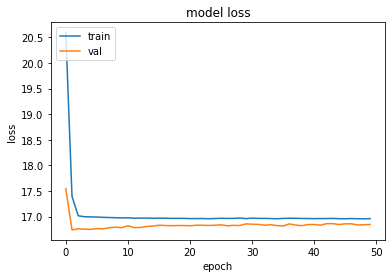

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

inp = df_b_train_airq.iloc[:, :4]
out = df_b_train_airq.iloc[:, 4:]
print(inp.shape)
print(out.shape)
X_train, X_test, y_train, y_test = train_test_split(inp, out, test_size=0.1)
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())
print(normalizer(X_train).numpy())
print(y_train)
model1 = tf.keras.models.load_model('/content/drive/MyDrive/IfW/nn22.h5')
for layer in model1.layers:
  layer.trainable = False
model2 = tf.keras.Model(inputs=model1.input, outputs=model1.get_layer("dense_12").output)
model = tf.keras.Sequential([
    model2,
    layers.Dense(units=48,activation='relu')
])
model1.summary()
model.summary()
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mae')
k = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/IfW/transferlearningnn33.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch"
)
history = model.fit(
    X_train, y_train,
    epochs=50,
    callbacks=[k],
    validation_data=(X_test,y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## transfer learning-using Thailand's predicting model(neural network) to retrain on Brunei's data

In [ ]:
import pandas as pd
df_b_test = pd.read_csv('/content/drive/MyDrive/Task 1/Brunei/Testing/bn_test_airquality.csv')
df_b_train_airq = pd.read_csv('/content/drive/MyDrive/Task 1/Brunei/Training/bn_train_airquality.csv')
df_b_train_station = pd.read_csv('/content/drive/MyDrive/Task 1/Brunei/Training/bn_train_station.csv')
df_b_train_weather = pd.read_csv('/content/drive/MyDrive/Task 1/Brunei/Training/bn_train_weather.csv')

In [ ]:
k = df_b_train_station.groupby(['DISTRICT','ID'])
print(k.first())

                                                                NAME  ...   LONGITUDE
DISTRICT     ID                                                       ...            
Belait       302B              Mumong Air Quality Monitoring Station  ...  114.233096
             AWS9                       Sungai Liang Weather Station  ...  114.489167
Brunei-Muara 101B            Anggerek Air Quality Monitoring Station  ...  114.933330
             AWS1                       Brunei International Airport  ...  114.923664
Temburong    401B   Taman Batang Duri Air Quality Monitoring Station  ...  115.121521
             AWS12                      Pekan Bangar Weather Station  ...  115.068611
Tutong       201B       Bukit Bendera Air Quality Monitoring Station  ...  114.660166
             AWS6                             Sinaut Weather Station  ...  114.740278

[8 rows x 4 columns]


In [ ]:
kk = k['ID'].apply(list).groupby(level=0).apply(list)
l = []
for n,i in enumerate(kk):
  l1 = []
  for j in i:
    l1.append(j[0])
  # l1.append(n)
  l.append(l1)
print(l)
ll = dict()
for n,i in enumerate(l):
  for j in i:
    ll[j] = n
print(ll)

[['302B', 'AWS9'], ['101B', 'AWS1'], ['401B', 'AWS12'], ['201B', 'AWS6']]
{'302B': 0, 'AWS9': 0, '101B': 1, 'AWS1': 1, '401B': 2, 'AWS12': 2, '201B': 3, 'AWS6': 3}


In [ ]:
df_b_train_airq["PM10"] = pd.to_numeric(df_b_train_airq["PM10"], errors='coerce')
df_b_train_airq["PM10"] = df_b_train_airq["PM10"].fillna(df_b_train_airq.groupby(["Y","M","D"])["PM10"].transform('mean'))
df_b_train_airq = df_b_train_airq.replace({"ID": ll})
df_b_train_airq

,ID,Y,M,D,PM10
0,1,2010,1,1,19.0
1,3,2010,1,1,19.0
2,0,2010,1,1,19.0
3,2,2010,1,1,19.0
4,1,2010,1,2,17.0
...,...,...,...,...,...
11683,2,2017,12,30,11.2
11684,1,2017,12,31,13.9
11685,3,2017,12,31,17.1
11686,0,2017,12,31,17.7


(11688, 4)
(11688, 1)
[[1.5033753e+00 2.0135006e+03 6.5205851e+00 1.5702067e+01]]
[[-0.4500124   0.65550995 -0.73258215 -0.07970669]
 [ 1.3379673  -0.21885909  0.42997676  0.03382471]
 [-0.4500124   1.0926944  -1.3138616   1.3962015 ]
 ...
 [ 0.44397745 -0.21885909  1.5925357   0.03382471]
 [-0.4500124   1.0926944   1.301896    0.14735611]
 [ 1.3379673   1.529879    1.0112562   0.6014817 ]]
tf.Tensor(
[[14.4]
 [20.9]
 [22.7]
 ...
 [ 9.9]
 [11. ]
 [20.6]], shape=(10519, 1), dtype=float64)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 13)                68237     
_________________________________________________________________
dense_14 (Dense)             (None, 512)               7168      
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_______________________

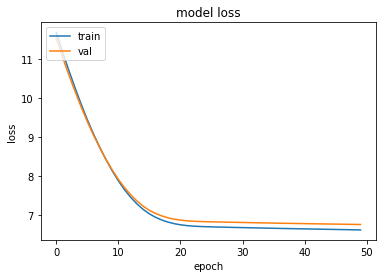

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

inp = df_b_train_airq.iloc[:, :4]
out = df_b_train_airq.iloc[:, 4:]
print(inp.shape)
print(out.shape)
X_train, X_test, y_train, y_test = train_test_split(inp, out, test_size=0.1)
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())
print(normalizer(X_train).numpy())
print(y_train)
model1 = tf.keras.models.load_model('/content/drive/MyDrive/IfW/nn33.h5')
for layer in model1.layers:
  layer.trainable = False
model2 = tf.keras.Model(inputs=model1.input, outputs=model1.get_layer("dense_16").output)
model = tf.keras.Sequential([
    model2,
    layers.Dense(units=1,activation='relu')
])
model1.summary()
model.summary()
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.000001),
    loss='mae')
k = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/IfW/transferlearningnn11.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch"
)
history = model.fit(
    X_train, y_train,
    epochs=50,
    callbacks=[k],
    validation_data=(X_test,y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## transfer learning-using Brunei's predicting model(neural network) to retrain on Singapore's data

In [ ]:
import pandas as pd
df_b_test = pd.read_csv('/content/drive/MyDrive/Task 1/Singapore/Testing/sg_test_airquality.csv')
df_b_train_airq = pd.read_csv('/content/drive/MyDrive/Task 1/Singapore/Training/sg_train_airquality.csv')
df_b_train_station = pd.read_csv('/content/drive/MyDrive/Task 1/Singapore/Training/sg_train_station.csv')
df_b_train_weather = pd.read_csv('/content/drive/MyDrive/Task 1/Singapore/Training/sg_train_weather.csv')

In [ ]:
li = ['North','East','West','South','Central']
o = [k for k,i in enumerate(df_b_train_station['REGION']) if i in li]
for idx in o:
  df_b_train_station.loc[idx,['NAME','REGION']] = df_b_train_station.loc[idx,['REGION','NAME']].values
df_b_train_station

,ID,NAME,TYPE,REGION,LATITUDE,LONGITUDE
0,1WS,West,Air Quality Monitoring Stations,"Lim Chu Kang, Choa Chu Kang, Bukit Panjang, Tu...",1.357350,103.700000
1,2ES,East,Air Quality Monitoring Stations,"Serangoon, Punggol, Hougang, Tampines, Pasir R...",1.357350,103.940000
2,3CS,Central,Air Quality Monitoring Stations,"Thomson, Marymount, Sin Ming, Ang Mo Kio, Bish...",1.357350,103.820000
3,4SS,South,Air Quality Monitoring Stations,"Holland, Queenstown, Bukit Merah, Telok Blanga...",1.295870,103.820000
4,5NS,North,Air Quality Monitoring Stations,"Admirality, Kranji, Woodlands, Sembawang, Yish...",1.418030,103.820000
5,S104,North,Weather Station,Admiralty,1.443867,103.785383
6,S106,East,Weather Station,Pulau Ubin,1.416800,103.967300
7,S116,South,Weather Station,Pasir Panjang,1.282350,103.754500
8,S44,West,Weather Station,Jurong West,1.345233,103.683333
9,S109,Central,Weather Station,Ang Mo Kio,1.379267,103.850017


In [ ]:
k = df_b_train_station.groupby(['NAME','ID'])
print(k.first())

                                         TYPE  ...   LONGITUDE
NAME    ID                                     ...            
Central 3CS   Air Quality Monitoring Stations  ...  103.820000
        S109                  Weather Station  ...  103.850017
East    2ES   Air Quality Monitoring Stations  ...  103.940000
        S106                  Weather Station  ...  103.967300
North   5NS   Air Quality Monitoring Stations  ...  103.820000
        S104                  Weather Station  ...  103.785383
South   4SS   Air Quality Monitoring Stations  ...  103.820000
        S116                  Weather Station  ...  103.754500
West    1WS   Air Quality Monitoring Stations  ...  103.700000
        S44                   Weather Station  ...  103.683333

[10 rows x 4 columns]


In [ ]:
kk = k['ID'].apply(list).groupby(level=0).apply(list)
l = []
for n,i in enumerate(kk):
  l1 = []
  for j in i:
    l1.append(j[0])
  # l1.append(n)
  l.append(l1)
print(l)
ll = dict()
for n,i in enumerate(l):
  for j in i:
    ll[j] = n
print(ll)

[['3CS', 'S109'], ['2ES', 'S106'], ['5NS', 'S104'], ['4SS', 'S116'], ['1WS', 'S44']]
{'3CS': 0, 'S109': 0, '2ES': 1, 'S106': 1, '5NS': 2, 'S104': 2, '4SS': 3, 'S116': 3, '1WS': 4, 'S44': 4}


In [ ]:
df_b_train_airq = df_b_train_airq.dropna(how='any',axis=0)
def func(x):
  r = x.split("-")
  return r[0], r[1], "".join(['20',r[2].strip()])

df_b_train_airq['D'], df_b_train_airq['M'], df_b_train_airq['Y'] = zip(*df_b_train_airq['DATE'].map(func))
df_b_train_airq.dtypes
df_b_train_airq

,ID,DATE,PM10_1,PM25_1,PM10_2,PM25_2,PM10_3,PM25_3,PM10_4,PM25_4,PM10_5,PM25_5,PM10_6,PM25_6,PM10_7,PM25_7,PM10_8,PM25_8,PM10_9,PM25_9,PM10_10,PM25_10,PM10_11,PM25_11,PM10_12,PM25_12,PM10_13,PM25_13,PM10_14,PM25_14,PM10_15,PM25_15,PM10_16,PM25_16,PM10_17,PM25_17,PM10_18,PM25_18,PM10_19,PM25_19,PM10_20,PM25_20,PM10_21,PM25_21,PM10_22,PM25_22,PM10_23,PM25_23,D,M,Y
11150,4SS,09-02-16,42.0,18.0,42.0,18.0,42.0,18.0,42.0,18.0,42.0,18.0,42.0,19.0,41.0,18.0,41.0,18.0,41.0,18.0,42.0,18.0,43.0,18.0,43.0,19.0,44.0,19.0,44.0,19.0,45.0,19.0,45.0,19.0,46.0,20.0,46.0,20.0,46.0,20.0,45.0,19.0,44.0,19.0,43.0,19.0,43.0,19.0,09,02,2016
11151,5NS,09-02-16,30.0,16.0,30.0,15.0,30.0,15.0,30.0,16.0,31.0,16.0,31.0,16.0,31.0,17.0,31.0,17.0,31.0,17.0,31.0,18.0,31.0,18.0,32.0,18.0,32.0,19.0,32.0,19.0,33.0,19.0,33.0,19.0,33.0,19.0,34.0,19.0,34.0,19.0,33.0,19.0,33.0,19.0,32.0,19.0,32.0,18.0,09,02,2016
11152,2ES,09-02-16,35.0,19.0,35.0,19.0,35.0,19.0,36.0,20.0,36.0,20.0,38.0,20.0,39.0,21.0,39.0,21.0,39.0,21.0,40.0,21.0,41.0,22.0,41.0,22.0,42.0,22.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,41.0,23.0,41.0,23.0,41.0,23.0,40.0,22.0,09,02,2016
11153,3CS,09-02-16,34.0,17.0,34.0,17.0,33.0,17.0,33.0,17.0,33.0,17.0,34.0,17.0,34.0,17.0,34.0,17.0,34.0,17.0,34.0,18.0,34.0,18.0,34.0,18.0,35.0,19.0,35.0,19.0,35.0,19.0,35.0,19.0,36.0,19.0,36.0,20.0,35.0,20.0,35.0,19.0,35.0,19.0,34.0,19.0,34.0,19.0,09,02,2016
11154,1WS,09-02-16,27.0,16.0,27.0,16.0,27.0,16.0,27.0,17.0,27.0,16.0,27.0,17.0,27.0,17.0,27.0,17.0,27.0,17.0,28.0,17.0,28.0,18.0,29.0,18.0,29.0,19.0,30.0,19.0,30.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,30.0,20.0,09,02,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,1WS,31-12-17,18.0,8.0,18.0,8.0,18.0,8.0,18.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,16.0,7.0,15.0,6.0,15.0,6.0,13.0,5.0,13.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,31,12,2017
14606,2ES,31-12-17,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,26.0,12.0,27.0,12.0,27.0,12.0,28.0,13.0,28.0,12.0,27.0,12.0,27.0,12.0,26.0,11.0,25.0,11.0,24.0,11.0,24.0,11.0,23.0,10.0,23.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,31,12,2017
14607,3CS,31-12-17,21.0,12.0,21.0,12.0,21.0,11.0,21.0,11.0,20.0,11.0,20.0,11.0,21.0,11.0,20.0,11.0,20.0,12.0,20.0,11.0,19.0,11.0,19.0,11.0,18.0,10.0,17.0,10.0,16.0,9.0,15.0,8.0,15.0,8.0,14.0,8.0,13.0,7.0,13.0,7.0,13.0,7.0,13.0,7.0,13.0,7.0,31,12,2017
14608,4SS,31-12-17,42.0,10.0,42.0,10.0,42.0,10.0,41.0,10.0,41.0,10.0,41.0,10.0,41.0,11.0,41.0,11.0,41.0,11.0,41.0,11.0,40.0,10.0,39.0,10.0,39.0,10.0,38.0,9.0,37.0,9.0,36.0,8.0,36.0,8.0,36.0,8.0,35.0,7.0,35.0,7.0,35.0,7.0,22.0,7.0,15.0,7.0,31,12,2017


In [ ]:
df_b_train_airq['Y'] = df_b_train_airq['Y'].apply(pd.to_numeric)
df_b_train_airq['M'] = df_b_train_airq['M'].apply(pd.to_numeric)
df_b_train_airq['D'] = df_b_train_airq['D'].apply(pd.to_numeric)
# df_b_train_airq.dtypes
df_b_train_airq = df_b_train_airq.drop('DATE', 1)
df_b_train_airq

,ID,PM10_1,PM25_1,PM10_2,PM25_2,PM10_3,PM25_3,PM10_4,PM25_4,PM10_5,PM25_5,PM10_6,PM25_6,PM10_7,PM25_7,PM10_8,PM25_8,PM10_9,PM25_9,PM10_10,PM25_10,PM10_11,PM25_11,PM10_12,PM25_12,PM10_13,PM25_13,PM10_14,PM25_14,PM10_15,PM25_15,PM10_16,PM25_16,PM10_17,PM25_17,PM10_18,PM25_18,PM10_19,PM25_19,PM10_20,PM25_20,PM10_21,PM25_21,PM10_22,PM25_22,PM10_23,PM25_23,D,M,Y
11150,4SS,42.0,18.0,42.0,18.0,42.0,18.0,42.0,18.0,42.0,18.0,42.0,19.0,41.0,18.0,41.0,18.0,41.0,18.0,42.0,18.0,43.0,18.0,43.0,19.0,44.0,19.0,44.0,19.0,45.0,19.0,45.0,19.0,46.0,20.0,46.0,20.0,46.0,20.0,45.0,19.0,44.0,19.0,43.0,19.0,43.0,19.0,9,2,2016
11151,5NS,30.0,16.0,30.0,15.0,30.0,15.0,30.0,16.0,31.0,16.0,31.0,16.0,31.0,17.0,31.0,17.0,31.0,17.0,31.0,18.0,31.0,18.0,32.0,18.0,32.0,19.0,32.0,19.0,33.0,19.0,33.0,19.0,33.0,19.0,34.0,19.0,34.0,19.0,33.0,19.0,33.0,19.0,32.0,19.0,32.0,18.0,9,2,2016
11152,2ES,35.0,19.0,35.0,19.0,35.0,19.0,36.0,20.0,36.0,20.0,38.0,20.0,39.0,21.0,39.0,21.0,39.0,21.0,40.0,21.0,41.0,22.0,41.0,22.0,42.0,22.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,41.0,23.0,41.0,23.0,41.0,23.0,40.0,22.0,9,2,2016
11153,3CS,34.0,17.0,34.0,17.0,33.0,17.0,33.0,17.0,33.0,17.0,34.0,17.0,34.0,17.0,34.0,17.0,34.0,17.0,34.0,18.0,34.0,18.0,34.0,18.0,35.0,19.0,35.0,19.0,35.0,19.0,35.0,19.0,36.0,19.0,36.0,20.0,35.0,20.0,35.0,19.0,35.0,19.0,34.0,19.0,34.0,19.0,9,2,2016
11154,1WS,27.0,16.0,27.0,16.0,27.0,16.0,27.0,17.0,27.0,16.0,27.0,17.0,27.0,17.0,27.0,17.0,27.0,17.0,28.0,17.0,28.0,18.0,29.0,18.0,29.0,19.0,30.0,19.0,30.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,30.0,20.0,9,2,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,1WS,18.0,8.0,18.0,8.0,18.0,8.0,18.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,16.0,7.0,15.0,6.0,15.0,6.0,13.0,5.0,13.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,31,12,2017
14606,2ES,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,26.0,12.0,27.0,12.0,27.0,12.0,28.0,13.0,28.0,12.0,27.0,12.0,27.0,12.0,26.0,11.0,25.0,11.0,24.0,11.0,24.0,11.0,23.0,10.0,23.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,31,12,2017
14607,3CS,21.0,12.0,21.0,12.0,21.0,11.0,21.0,11.0,20.0,11.0,20.0,11.0,21.0,11.0,20.0,11.0,20.0,12.0,20.0,11.0,19.0,11.0,19.0,11.0,18.0,10.0,17.0,10.0,16.0,9.0,15.0,8.0,15.0,8.0,14.0,8.0,13.0,7.0,13.0,7.0,13.0,7.0,13.0,7.0,13.0,7.0,31,12,2017
14608,4SS,42.0,10.0,42.0,10.0,42.0,10.0,41.0,10.0,41.0,10.0,41.0,10.0,41.0,11.0,41.0,11.0,41.0,11.0,41.0,11.0,40.0,10.0,39.0,10.0,39.0,10.0,38.0,9.0,37.0,9.0,36.0,8.0,36.0,8.0,36.0,8.0,35.0,7.0,35.0,7.0,35.0,7.0,22.0,7.0,15.0,7.0,31,12,2017


In [ ]:
cols = df_b_train_airq.columns.tolist()
cols = [cols[0]] + cols[-3:] + cols[1:-3]
df_b_train_airq = df_b_train_airq[cols]
df_b_train_airq

,ID,D,M,Y,PM10_1,PM25_1,PM10_2,PM25_2,PM10_3,PM25_3,PM10_4,PM25_4,PM10_5,PM25_5,PM10_6,PM25_6,PM10_7,PM25_7,PM10_8,PM25_8,PM10_9,PM25_9,PM10_10,PM25_10,PM10_11,PM25_11,PM10_12,PM25_12,PM10_13,PM25_13,PM10_14,PM25_14,PM10_15,PM25_15,PM10_16,PM25_16,PM10_17,PM25_17,PM10_18,PM25_18,PM10_19,PM25_19,PM10_20,PM25_20,PM10_21,PM25_21,PM10_22,PM25_22,PM10_23,PM25_23
11150,4SS,9,2,2016,42.0,18.0,42.0,18.0,42.0,18.0,42.0,18.0,42.0,18.0,42.0,19.0,41.0,18.0,41.0,18.0,41.0,18.0,42.0,18.0,43.0,18.0,43.0,19.0,44.0,19.0,44.0,19.0,45.0,19.0,45.0,19.0,46.0,20.0,46.0,20.0,46.0,20.0,45.0,19.0,44.0,19.0,43.0,19.0,43.0,19.0
11151,5NS,9,2,2016,30.0,16.0,30.0,15.0,30.0,15.0,30.0,16.0,31.0,16.0,31.0,16.0,31.0,17.0,31.0,17.0,31.0,17.0,31.0,18.0,31.0,18.0,32.0,18.0,32.0,19.0,32.0,19.0,33.0,19.0,33.0,19.0,33.0,19.0,34.0,19.0,34.0,19.0,33.0,19.0,33.0,19.0,32.0,19.0,32.0,18.0
11152,2ES,9,2,2016,35.0,19.0,35.0,19.0,35.0,19.0,36.0,20.0,36.0,20.0,38.0,20.0,39.0,21.0,39.0,21.0,39.0,21.0,40.0,21.0,41.0,22.0,41.0,22.0,42.0,22.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,41.0,23.0,41.0,23.0,41.0,23.0,40.0,22.0
11153,3CS,9,2,2016,34.0,17.0,34.0,17.0,33.0,17.0,33.0,17.0,33.0,17.0,34.0,17.0,34.0,17.0,34.0,17.0,34.0,17.0,34.0,18.0,34.0,18.0,34.0,18.0,35.0,19.0,35.0,19.0,35.0,19.0,35.0,19.0,36.0,19.0,36.0,20.0,35.0,20.0,35.0,19.0,35.0,19.0,34.0,19.0,34.0,19.0
11154,1WS,9,2,2016,27.0,16.0,27.0,16.0,27.0,16.0,27.0,17.0,27.0,16.0,27.0,17.0,27.0,17.0,27.0,17.0,27.0,17.0,28.0,17.0,28.0,18.0,29.0,18.0,29.0,19.0,30.0,19.0,30.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,30.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,1WS,31,12,2017,18.0,8.0,18.0,8.0,18.0,8.0,18.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,16.0,7.0,15.0,6.0,15.0,6.0,13.0,5.0,13.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0
14606,2ES,31,12,2017,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,26.0,12.0,27.0,12.0,27.0,12.0,28.0,13.0,28.0,12.0,27.0,12.0,27.0,12.0,26.0,11.0,25.0,11.0,24.0,11.0,24.0,11.0,23.0,10.0,23.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0
14607,3CS,31,12,2017,21.0,12.0,21.0,12.0,21.0,11.0,21.0,11.0,20.0,11.0,20.0,11.0,21.0,11.0,20.0,11.0,20.0,12.0,20.0,11.0,19.0,11.0,19.0,11.0,18.0,10.0,17.0,10.0,16.0,9.0,15.0,8.0,15.0,8.0,14.0,8.0,13.0,7.0,13.0,7.0,13.0,7.0,13.0,7.0,13.0,7.0
14608,4SS,31,12,2017,42.0,10.0,42.0,10.0,42.0,10.0,41.0,10.0,41.0,10.0,41.0,10.0,41.0,11.0,41.0,11.0,41.0,11.0,41.0,11.0,40.0,10.0,39.0,10.0,39.0,10.0,38.0,9.0,37.0,9.0,36.0,8.0,36.0,8.0,36.0,8.0,35.0,7.0,35.0,7.0,35.0,7.0,22.0,7.0,15.0,7.0


In [ ]:
for i in range(1,24):
  df_b_train_airq[f"PM10_{i}"] = pd.to_numeric(df_b_train_airq[f"PM10_{i}"], errors='coerce')
  df_b_train_airq[f"PM10_{i}"] = df_b_train_airq[f"PM10_{i}"].fillna(df_b_train_airq.groupby(["Y","M","D"])[f"PM10_{i}"].transform('mean'))
  df_b_train_airq[f"PM25_{i}"] = pd.to_numeric(df_b_train_airq[f"PM25_{i}"], errors='coerce')
  df_b_train_airq[f"PM25_{i}"] = df_b_train_airq[f"PM25_{i}"].fillna(df_b_train_airq.groupby(["Y","M","D"])[f"PM25_{i}"].transform('mean'))
df_b_train_airq = df_b_train_airq.replace({"ID": ll})
df_b_train_airq

,ID,D,M,Y,PM10_1,PM25_1,PM10_2,PM25_2,PM10_3,PM25_3,PM10_4,PM25_4,PM10_5,PM25_5,PM10_6,PM25_6,PM10_7,PM25_7,PM10_8,PM25_8,PM10_9,PM25_9,PM10_10,PM25_10,PM10_11,PM25_11,PM10_12,PM25_12,PM10_13,PM25_13,PM10_14,PM25_14,PM10_15,PM25_15,PM10_16,PM25_16,PM10_17,PM25_17,PM10_18,PM25_18,PM10_19,PM25_19,PM10_20,PM25_20,PM10_21,PM25_21,PM10_22,PM25_22,PM10_23,PM25_23
11150,3,9,2,2016,42.0,18.0,42.0,18.0,42.0,18.0,42.0,18.0,42.0,18.0,42.0,19.0,41.0,18.0,41.0,18.0,41.0,18.0,42.0,18.0,43.0,18.0,43.0,19.0,44.0,19.0,44.0,19.0,45.0,19.0,45.0,19.0,46.0,20.0,46.0,20.0,46.0,20.0,45.0,19.0,44.0,19.0,43.0,19.0,43.0,19.0
11151,2,9,2,2016,30.0,16.0,30.0,15.0,30.0,15.0,30.0,16.0,31.0,16.0,31.0,16.0,31.0,17.0,31.0,17.0,31.0,17.0,31.0,18.0,31.0,18.0,32.0,18.0,32.0,19.0,32.0,19.0,33.0,19.0,33.0,19.0,33.0,19.0,34.0,19.0,34.0,19.0,33.0,19.0,33.0,19.0,32.0,19.0,32.0,18.0
11152,1,9,2,2016,35.0,19.0,35.0,19.0,35.0,19.0,36.0,20.0,36.0,20.0,38.0,20.0,39.0,21.0,39.0,21.0,39.0,21.0,40.0,21.0,41.0,22.0,41.0,22.0,42.0,22.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,42.0,23.0,41.0,23.0,41.0,23.0,41.0,23.0,40.0,22.0
11153,0,9,2,2016,34.0,17.0,34.0,17.0,33.0,17.0,33.0,17.0,33.0,17.0,34.0,17.0,34.0,17.0,34.0,17.0,34.0,17.0,34.0,18.0,34.0,18.0,34.0,18.0,35.0,19.0,35.0,19.0,35.0,19.0,35.0,19.0,36.0,19.0,36.0,20.0,35.0,20.0,35.0,19.0,35.0,19.0,34.0,19.0,34.0,19.0
11154,4,9,2,2016,27.0,16.0,27.0,16.0,27.0,16.0,27.0,17.0,27.0,16.0,27.0,17.0,27.0,17.0,27.0,17.0,27.0,17.0,28.0,17.0,28.0,18.0,29.0,18.0,29.0,19.0,30.0,19.0,30.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,31.0,20.0,30.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,4,31,12,2017,18.0,8.0,18.0,8.0,18.0,8.0,18.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,17.0,8.0,16.0,7.0,15.0,6.0,15.0,6.0,13.0,5.0,13.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0,12.0,5.0
14606,1,31,12,2017,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,25.0,12.0,26.0,12.0,27.0,12.0,27.0,12.0,28.0,13.0,28.0,12.0,27.0,12.0,27.0,12.0,26.0,11.0,25.0,11.0,24.0,11.0,24.0,11.0,23.0,10.0,23.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0
14607,0,31,12,2017,21.0,12.0,21.0,12.0,21.0,11.0,21.0,11.0,20.0,11.0,20.0,11.0,21.0,11.0,20.0,11.0,20.0,12.0,20.0,11.0,19.0,11.0,19.0,11.0,18.0,10.0,17.0,10.0,16.0,9.0,15.0,8.0,15.0,8.0,14.0,8.0,13.0,7.0,13.0,7.0,13.0,7.0,13.0,7.0,13.0,7.0
14608,3,31,12,2017,42.0,10.0,42.0,10.0,42.0,10.0,41.0,10.0,41.0,10.0,41.0,10.0,41.0,11.0,41.0,11.0,41.0,11.0,41.0,11.0,40.0,10.0,39.0,10.0,39.0,10.0,38.0,9.0,37.0,9.0,36.0,8.0,36.0,8.0,36.0,8.0,35.0,7.0,35.0,7.0,35.0,7.0,22.0,7.0,15.0,7.0


(2615, 4)
(2615, 46)
       PM10_1  PM25_1  PM10_2  PM25_2  ...  PM10_22  PM25_22  PM10_23  PM25_23
11150    42.0    18.0    42.0    18.0  ...     43.0     19.0     43.0     19.0
11151    30.0    16.0    30.0    15.0  ...     32.0     19.0     32.0     18.0
11152    35.0    19.0    35.0    19.0  ...     41.0     23.0     40.0     22.0
11153    34.0    17.0    34.0    17.0  ...     34.0     19.0     34.0     19.0
11154    27.0    16.0    27.0    16.0  ...     31.0     20.0     30.0     20.0

[5 rows x 46 columns]
[[2.0038247e+00 1.5902252e+01 6.9235034e+00 2.0166222e+03]]
[[ 1.4110643   0.01136042 -1.8522671   0.7792463 ]
 [-0.7095876   1.6384653  -0.9141734  -1.2833015 ]
 [-0.7095876   0.70869106  0.64931613  0.7792463 ]
 ...
 [-0.00270363  0.1275822   0.02392033 -1.2833015 ]
 [-0.00270363  0.36002576 -1.8522671   0.7792463 ]
 [-0.00270363  1.1735781  -0.6014755  -1.2833015 ]]
tf.Tensor(
[[25. 15. 25. ... 11. 21. 11.]
 [26. 17. 27. ... 32. 45. 33.]
 [12.  5. 12. ... 10. 19. 11.]
 ...
 

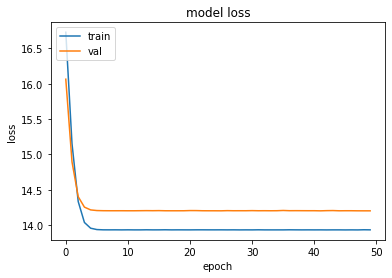

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

inp = df_b_train_airq.iloc[:, :4]
out = df_b_train_airq.iloc[:, 4:]
print(inp.shape)
print(out.shape)
print(out.head())
X_train, X_test, y_train, y_test = train_test_split(inp, out, test_size=0.1)
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())
print(normalizer(X_train).numpy())
print(y_train)
model1 = tf.keras.models.load_model('/content/drive/MyDrive/IfW/nn11.h5')
for layer in model1.layers:
  layer.trainable = False
model2 = tf.keras.Model(inputs=model1.input, outputs=model1.get_layer("dense_8").output)
model = tf.keras.Sequential([
    model2,
    layers.Dense(units=46,activation='relu')
])
model1.summary()
model.summary()
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss='mae')
k = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/IfW/transferlearningnn22.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch"
)
for i in range(len(model.weights)):
    model.weights[i]._handle_name = model.weights[i].name + "_" + str(i)
history = model.fit(
    X_train, y_train,
    epochs=50,
    callbacks=[k],
    validation_data=(X_test,y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#CSV missing value filling using models from subtask1, 2 and 3

In [ ]:
import tensorflow as tf
import pandas as pd
model = tf.keras.models.load_model('/content/drive/MyDrive/IfW/nn11.h5')
csv = pd.read_csv('/content/drive/MyDrive/Task 1/Brunei/Testing/bn_test_airquality.csv')
h = pd.read_csv('/content/drive/MyDrive/Task 1/Brunei/Training/bn_train_station.csv')
k = h.groupby(['DISTRICT','ID'])
kk = k['ID'].apply(list).groupby(level=0).apply(list)
l = []
for n,i in enumerate(kk):
  l1 = []
  for j in i:
    l1.append(j[0])
  l.append(l1)
print(l)
ll = dict()
for n,i in enumerate(l):
  for j in i:
    ll[j] = n
print(ll)
csv = csv.replace({"ID": ll})

def func(x):
  print([x[x.index[0]],x[x.index[1]],x[x.index[2]],x[x.index[3]]],x.name)
  return model.predict(np.expand_dims(np.array([x[x.index[0]],x[x.index[1]],x[x.index[2]],x[x.index[3]]]),axis=0))[0][0]
csv["PM10"] = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-1]]) else x,axis=1)
csv.to_csv('/content/drive/MyDrive/csv/subtask1_Brunei.csv', index=False)

[['302B', 'AWS9'], ['101B', 'AWS1'], ['401B', 'AWS12'], ['201B', 'AWS6']]
{'302B': 0, 'AWS9': 0, '101B': 1, 'AWS1': 1, '401B': 2, 'AWS12': 2, '201B': 3, 'AWS6': 3}
[1.0, 2018.0, 1.0, 11.0] 40
[3.0, 2018.0, 1.0, 11.0] 41
[0.0, 2018.0, 1.0, 11.0] 42
[2.0, 2018.0, 1.0, 11.0] 43
[1.0, 2018.0, 1.0, 12.0] 44
[3.0, 2018.0, 1.0, 12.0] 45
[0.0, 2018.0, 1.0, 12.0] 46
[2.0, 2018.0, 1.0, 12.0] 47
[1.0, 2018.0, 1.0, 13.0] 48
[3.0, 2018.0, 1.0, 13.0] 49
[0.0, 2018.0, 1.0, 13.0] 50
[2.0, 2018.0, 1.0, 13.0] 51
[1.0, 2018.0, 1.0, 14.0] 52
[3.0, 2018.0, 1.0, 14.0] 53
[0.0, 2018.0, 1.0, 14.0] 54
[2.0, 2018.0, 1.0, 14.0] 55
[1.0, 2018.0, 1.0, 15.0] 56
[3.0, 2018.0, 1.0, 15.0] 57
[0.0, 2018.0, 1.0, 15.0] 58
[2.0, 2018.0, 1.0, 15.0] 59
[1.0, 2018.0, 1.0, 16.0] 60
[3.0, 2018.0, 1.0, 16.0] 61
[0.0, 2018.0, 1.0, 16.0] 62
[2.0, 2018.0, 1.0, 16.0] 63
[1.0, 2018.0, 1.0, 17.0] 64
[3.0, 2018.0, 1.0, 17.0] 65
[0.0, 2018.0, 1.0, 17.0] 66
[2.0, 2018.0, 1.0, 17.0] 67
[1.0, 2018.0, 1.0, 18.0] 68
[3.0, 2018.0, 1.0, 18.0]

In [ ]:
import tensorflow as tf
import pandas as pd
model = tf.keras.models.load_model('/content/drive/MyDrive/IfW/combinednn11.h5')
csv = pd.read_csv('/content/drive/MyDrive/Task 1/Brunei/Testing/bn_test_airquality.csv')
h = pd.read_csv('/content/drive/MyDrive/Task 1/Brunei/Training/bn_train_station.csv')
k = h.groupby(['DISTRICT','ID'])
kk = k['ID'].apply(list).groupby(level=0).apply(list)
l = []
for n,i in enumerate(kk):
  l1 = []
  for j in i:
    l1.append(j[0])
  l.append(l1)
print(l)
ll = dict()
for n,i in enumerate(l):
  for j in i:
    ll[j] = n
print(ll)
csv = csv.replace({"ID": ll})

def func(x):
  print([x[x.index[0]],x[x.index[1]],x[x.index[2]],x[x.index[3]]],x.name)
  return model.predict(np.expand_dims(np.array([x[x.index[1]],x[x.index[2]],x[x.index[3]]]),axis=0))[0][0]
csv["PM10"] = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-1]]) else x,axis=1)
csv.to_csv('/content/drive/MyDrive/csv/subtask2_Brunei.csv', index=False)

[['302B', 'AWS9'], ['101B', 'AWS1'], ['401B', 'AWS12'], ['201B', 'AWS6']]
{'302B': 0, 'AWS9': 0, '101B': 1, 'AWS1': 1, '401B': 2, 'AWS12': 2, '201B': 3, 'AWS6': 3}
[1.0, 2018.0, 1.0, 11.0] 40
[3.0, 2018.0, 1.0, 11.0] 41
[0.0, 2018.0, 1.0, 11.0] 42
[2.0, 2018.0, 1.0, 11.0] 43
[1.0, 2018.0, 1.0, 12.0] 44
[3.0, 2018.0, 1.0, 12.0] 45
[0.0, 2018.0, 1.0, 12.0] 46
[2.0, 2018.0, 1.0, 12.0] 47
[1.0, 2018.0, 1.0, 13.0] 48
[3.0, 2018.0, 1.0, 13.0] 49
[0.0, 2018.0, 1.0, 13.0] 50
[2.0, 2018.0, 1.0, 13.0] 51
[1.0, 2018.0, 1.0, 14.0] 52
[3.0, 2018.0, 1.0, 14.0] 53
[0.0, 2018.0, 1.0, 14.0] 54
[2.0, 2018.0, 1.0, 14.0] 55
[1.0, 2018.0, 1.0, 15.0] 56
[3.0, 2018.0, 1.0, 15.0] 57
[0.0, 2018.0, 1.0, 15.0] 58
[2.0, 2018.0, 1.0, 15.0] 59
[1.0, 2018.0, 1.0, 16.0] 60
[3.0, 2018.0, 1.0, 16.0] 61
[0.0, 2018.0, 1.0, 16.0] 62
[2.0, 2018.0, 1.0, 16.0] 63
[1.0, 2018.0, 1.0, 17.0] 64
[3.0, 2018.0, 1.0, 17.0] 65
[0.0, 2018.0, 1.0, 17.0] 66
[2.0, 2018.0, 1.0, 17.0] 67
[1.0, 2018.0, 1.0, 18.0] 68
[3.0, 2018.0, 1.0, 18.0]

In [ ]:
import tensorflow as tf
import pandas as pd
model = tf.keras.models.load_model('/content/drive/MyDrive/IfW/transferlearningnn11.h5')
csv = pd.read_csv('/content/drive/MyDrive/Task 1/Brunei/Testing/bn_test_airquality.csv')
h = pd.read_csv('/content/drive/MyDrive/Task 1/Brunei/Training/bn_train_station.csv')
k = h.groupby(['DISTRICT','ID'])
kk = k['ID'].apply(list).groupby(level=0).apply(list)
l = []
for n,i in enumerate(kk):
  l1 = []
  for j in i:
    l1.append(j[0])
  l.append(l1)
print(l)
ll = dict()
for n,i in enumerate(l):
  for j in i:
    ll[j] = n
print(ll)
csv = csv.replace({"ID": ll})

def func(x):
  print([x[x.index[0]],x[x.index[1]],x[x.index[2]],x[x.index[3]]],x.name)
  return model.predict(np.expand_dims(np.array([x[x.index[0]],x[x.index[1]],x[x.index[2]],x[x.index[3]]]),axis=0))[0][0]
csv["PM10"] = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-1]]) else x,axis=1)
csv.to_csv('/content/drive/MyDrive/csv/subtask3_Brunei.csv', index=False)

[['302B', 'AWS9'], ['101B', 'AWS1'], ['401B', 'AWS12'], ['201B', 'AWS6']]
{'302B': 0, 'AWS9': 0, '101B': 1, 'AWS1': 1, '401B': 2, 'AWS12': 2, '201B': 3, 'AWS6': 3}
[1.0, 2018.0, 1.0, 11.0] 40
[3.0, 2018.0, 1.0, 11.0] 41
[0.0, 2018.0, 1.0, 11.0] 42
[2.0, 2018.0, 1.0, 11.0] 43
[1.0, 2018.0, 1.0, 12.0] 44
[3.0, 2018.0, 1.0, 12.0] 45
[0.0, 2018.0, 1.0, 12.0] 46
[2.0, 2018.0, 1.0, 12.0] 47
[1.0, 2018.0, 1.0, 13.0] 48
[3.0, 2018.0, 1.0, 13.0] 49
[0.0, 2018.0, 1.0, 13.0] 50
[2.0, 2018.0, 1.0, 13.0] 51
[1.0, 2018.0, 1.0, 14.0] 52
[3.0, 2018.0, 1.0, 14.0] 53
[0.0, 2018.0, 1.0, 14.0] 54
[2.0, 2018.0, 1.0, 14.0] 55
[1.0, 2018.0, 1.0, 15.0] 56
[3.0, 2018.0, 1.0, 15.0] 57
[0.0, 2018.0, 1.0, 15.0] 58
[2.0, 2018.0, 1.0, 15.0] 59
[1.0, 2018.0, 1.0, 16.0] 60
[3.0, 2018.0, 1.0, 16.0] 61
[0.0, 2018.0, 1.0, 16.0] 62
[2.0, 2018.0, 1.0, 16.0] 63
[1.0, 2018.0, 1.0, 17.0] 64
[3.0, 2018.0, 1.0, 17.0] 65
[0.0, 2018.0, 1.0, 17.0] 66
[2.0, 2018.0, 1.0, 17.0] 67
[1.0, 2018.0, 1.0, 18.0] 68
[3.0, 2018.0, 1.0, 18.0]

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
model = tf.keras.models.load_model('/content/drive/MyDrive/IfW/nn22.h5')
csv = pd.read_csv('/content/drive/MyDrive/Task 1/Singapore/Testing/sg_test_airquality.csv')
h = pd.read_csv('/content/drive/MyDrive/Task 1/Singapore/Training/sg_train_station.csv')
li = ['North','East','West','South','Central']
o = [k for k,i in enumerate(h['REGION']) if i in li]
for idx in o:
  h.loc[idx,['NAME','REGION']] = h.loc[idx,['REGION','NAME']].values
# df_b_train_station
k = h.groupby(['NAME','ID'])
kk = k['ID'].apply(list).groupby(level=0).apply(list)
l = []
for n,i in enumerate(kk):
  l1 = []
  for j in i:
    l1.append(j[0])
  l.append(l1)
print(l)
ll = dict()
for n,i in enumerate(l):
  for j in i:
    ll[j] = n
print(ll)
csv = csv.replace({"ID": ll})
def func(x):
  r = x.split("-")
  return r[0], r[1], "".join(['20',r[2].strip()])
csv['D'], csv['M'], csv['Y'] = zip(*csv['DATE'].map(func))
csv['Y'] = csv['Y'].apply(pd.to_numeric)
csv['M'] = csv['M'].apply(pd.to_numeric)
csv['D'] = csv['D'].apply(pd.to_numeric)
csv = csv.drop('DATE', 1)
cols = csv.columns.tolist()
cols = [cols[0]] + cols[-3:] + cols[1:-3]
csv = csv[cols]
csv.reset_index()
print(csv.columns)
def func(x):
  r = model.predict(np.expand_dims(np.array([x[x.index[0]],x[x.index[1]],x[x.index[2]],x[x.index[3]]]),axis=0))[0]
  p=[i for j,i in enumerate(r) if j%2==0]
  print([x[x.index[0]],x[x.index[1]],x[x.index[2]],x[x.index[3]]],x.name)
  for i in range(23):
    x[i+4] = p[i]
  return x
  # return r[0]
# csv['PM10_1', 'PM10_2', 'PM10_3', 'PM10_4', 'PM10_5', 'PM10_6', 'PM10_7', 'PM10_8', 'PM10_9', 'PM10_10', 'PM10_11', 'PM10_12', 'PM10_13', 'PM10_14', 'PM10_15', 'PM10_16', 'PM10_17', 'PM10_18', 'PM10_19', 'PM10_20', 'PM10_21', 'PM10_22', 'PM10_23'] = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-1]]) else x, axis=1)
# csv['PM10_1'] = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-4]]) else x)
csv = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-1]]) else x,axis=1)
# csv
csv.to_csv('/content/drive/MyDrive/csv/subtask1_Singapore.csv', index=False)

[['3CS', 'S109'], ['2ES', 'S106'], ['5NS', 'S104'], ['4SS', 'S116'], ['1WS', 'S44']]
{'3CS': 0, 'S109': 0, '2ES': 1, 'S106': 1, '5NS': 2, 'S104': 2, '4SS': 3, 'S116': 3, '1WS': 4, 'S44': 4}
Index(['ID', 'D', 'M', 'Y', 'PM10_1', 'PM10_2', 'PM10_3', 'PM10_4', 'PM10_5',
       'PM10_6', 'PM10_7', 'PM10_8', 'PM10_9', 'PM10_10', 'PM10_11', 'PM10_12',
       'PM10_13', 'PM10_14', 'PM10_15', 'PM10_16', 'PM10_17', 'PM10_18',
       'PM10_19', 'PM10_20', 'PM10_21', 'PM10_22', 'PM10_23'],
      dtype='object')
[4.0, 11.0, 1.0, 2018.0] 50
[1.0, 11.0, 1.0, 2018.0] 51
[0.0, 11.0, 1.0, 2018.0] 52
[3.0, 11.0, 1.0, 2018.0] 53
[2.0, 11.0, 1.0, 2018.0] 54
[4.0, 12.0, 1.0, 2018.0] 55
[1.0, 12.0, 1.0, 2018.0] 56
[0.0, 12.0, 1.0, 2018.0] 57
[3.0, 12.0, 1.0, 2018.0] 58
[2.0, 12.0, 1.0, 2018.0] 59
[4.0, 13.0, 1.0, 2018.0] 60
[1.0, 13.0, 1.0, 2018.0] 61
[0.0, 13.0, 1.0, 2018.0] 62
[3.0, 13.0, 1.0, 2018.0] 63
[2.0, 13.0, 1.0, 2018.0] 64
[4.0, 14.0, 1.0, 2018.0] 65
[1.0, 14.0, 1.0, 2018.0] 66
[0.0, 14.0, 1.0, 2

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
model = tf.keras.models.load_model('/content/drive/MyDrive/IfW/combinednn22.h5')
csv = pd.read_csv('/content/drive/MyDrive/Task 1/Singapore/Testing/sg_test_airquality.csv')
h = pd.read_csv('/content/drive/MyDrive/Task 1/Singapore/Training/sg_train_station.csv')
li = ['North','East','West','South','Central']
o = [k for k,i in enumerate(h['REGION']) if i in li]
for idx in o:
  h.loc[idx,['NAME','REGION']] = h.loc[idx,['REGION','NAME']].values
# df_b_train_station
k = h.groupby(['NAME','ID'])
kk = k['ID'].apply(list).groupby(level=0).apply(list)
l = []
for n,i in enumerate(kk):
  l1 = []
  for j in i:
    l1.append(j[0])
  l.append(l1)
print(l)
ll = dict()
for n,i in enumerate(l):
  for j in i:
    ll[j] = n
print(ll)
csv = csv.replace({"ID": ll})
def func(x):
  r = x.split("-")
  return r[0], r[1], "".join(['20',r[2].strip()])
csv['D'], csv['M'], csv['Y'] = zip(*csv['DATE'].map(func))
csv['Y'] = csv['Y'].apply(pd.to_numeric)
csv['M'] = csv['M'].apply(pd.to_numeric)
csv['D'] = csv['D'].apply(pd.to_numeric)
csv = csv.drop('DATE', 1)
cols = csv.columns.tolist()
cols = [cols[0]] + cols[-3:] + cols[1:-3]
csv = csv[cols]
csv.reset_index()
print(csv.columns)
def func(x):
  r = model.predict(np.expand_dims(np.array([x[x.index[1]],x[x.index[2]],x[x.index[3]]]),axis=0))[0]
  p=[i for j,i in enumerate(r) if j%2==0]
  # print(x)
  print([x[x.index[0]],x[x.index[1]],x[x.index[2]],x[x.index[3]]],x.name)
  for i in range(23):
    x[i+4] = p[i]
  # print(x)
  # print(r)
  return x
  # print(x)
  # return r[0]
# csv['PM10_1', 'PM10_2', 'PM10_3', 'PM10_4', 'PM10_5', 'PM10_6', 'PM10_7', 'PM10_8', 'PM10_9', 'PM10_10', 'PM10_11', 'PM10_12', 'PM10_13', 'PM10_14', 'PM10_15', 'PM10_16', 'PM10_17', 'PM10_18', 'PM10_19', 'PM10_20', 'PM10_21', 'PM10_22', 'PM10_23'] = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-1]]) else x, axis=1)
# csv['PM10_1'] = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-4]]) else x)
csv = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-1]]) else x,axis=1)
# csv
csv.to_csv('/content/drive/MyDrive/csv/subtask2_Singapore.csv', index=False)

[['3CS', 'S109'], ['2ES', 'S106'], ['5NS', 'S104'], ['4SS', 'S116'], ['1WS', 'S44']]
{'3CS': 0, 'S109': 0, '2ES': 1, 'S106': 1, '5NS': 2, 'S104': 2, '4SS': 3, 'S116': 3, '1WS': 4, 'S44': 4}
Index(['ID', 'D', 'M', 'Y', 'PM10_1', 'PM10_2', 'PM10_3', 'PM10_4', 'PM10_5',
       'PM10_6', 'PM10_7', 'PM10_8', 'PM10_9', 'PM10_10', 'PM10_11', 'PM10_12',
       'PM10_13', 'PM10_14', 'PM10_15', 'PM10_16', 'PM10_17', 'PM10_18',
       'PM10_19', 'PM10_20', 'PM10_21', 'PM10_22', 'PM10_23'],
      dtype='object')
[4.0, 11.0, 1.0, 2018.0] 50
[1.0, 11.0, 1.0, 2018.0] 51
[0.0, 11.0, 1.0, 2018.0] 52
[3.0, 11.0, 1.0, 2018.0] 53
[2.0, 11.0, 1.0, 2018.0] 54
[4.0, 12.0, 1.0, 2018.0] 55
[1.0, 12.0, 1.0, 2018.0] 56
[0.0, 12.0, 1.0, 2018.0] 57
[3.0, 12.0, 1.0, 2018.0] 58
[2.0, 12.0, 1.0, 2018.0] 59
[4.0, 13.0, 1.0, 2018.0] 60
[1.0, 13.0, 1.0, 2018.0] 61
[0.0, 13.0, 1.0, 2018.0] 62
[3.0, 13.0, 1.0, 2018.0] 63
[2.0, 13.0, 1.0, 2018.0] 64
[4.0, 14.0, 1.0, 2018.0] 65
[1.0, 14.0, 1.0, 2018.0] 66
[0.0, 14.0, 1.0, 2

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
model = tf.keras.models.load_model('/content/drive/MyDrive/IfW/transferlearningnn22.h5')
csv = pd.read_csv('/content/drive/MyDrive/Task 1/Singapore/Testing/sg_test_airquality.csv')
h = pd.read_csv('/content/drive/MyDrive/Task 1/Singapore/Training/sg_train_station.csv')
li = ['North','East','West','South','Central']
o = [k for k,i in enumerate(h['REGION']) if i in li]
for idx in o:
  h.loc[idx,['NAME','REGION']] = h.loc[idx,['REGION','NAME']].values
# df_b_train_station
k = h.groupby(['NAME','ID'])
kk = k['ID'].apply(list).groupby(level=0).apply(list)
l = []
for n,i in enumerate(kk):
  l1 = []
  for j in i:
    l1.append(j[0])
  l.append(l1)
print(l)
ll = dict()
for n,i in enumerate(l):
  for j in i:
    ll[j] = n
print(ll)
csv = csv.replace({"ID": ll})
def func(x):
  r = x.split("-")
  return r[0], r[1], "".join(['20',r[2].strip()])
csv['D'], csv['M'], csv['Y'] = zip(*csv['DATE'].map(func))
csv['Y'] = csv['Y'].apply(pd.to_numeric)
csv['M'] = csv['M'].apply(pd.to_numeric)
csv['D'] = csv['D'].apply(pd.to_numeric)
csv = csv.drop('DATE', 1)
cols = csv.columns.tolist()
cols = [cols[0]] + cols[-3:] + cols[1:-3]
csv = csv[cols]
csv.reset_index()
print(csv.columns)
def func(x):
  r = model.predict(np.expand_dims(np.array([x[x.index[0]],x[x.index[1]],x[x.index[2]],x[x.index[3]]]),axis=0))[0]
  p=[i for j,i in enumerate(r) if j%2==0]
  # print(r)
  print([x[x.index[1]],x[x.index[0]],x[x.index[1]],x[x.index[2]],x[x.index[3]]],x.name)
  for i in range(23):
    x[i+4] = p[i]
  # print(x)
  # print(r)
  return x
  # print(x)
  # return r[0]
# csv['PM10_1', 'PM10_2', 'PM10_3', 'PM10_4', 'PM10_5', 'PM10_6', 'PM10_7', 'PM10_8', 'PM10_9', 'PM10_10', 'PM10_11', 'PM10_12', 'PM10_13', 'PM10_14', 'PM10_15', 'PM10_16', 'PM10_17', 'PM10_18', 'PM10_19', 'PM10_20', 'PM10_21', 'PM10_22', 'PM10_23'] = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-1]]) else x, axis=1)
# csv['PM10_1'] = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-4]]) else x)
csv = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-1]]) else x,axis=1)
# csv
csv.to_csv('/content/drive/MyDrive/csv/subtask3_Singapore.csv', index=False)

[['3CS', 'S109'], ['2ES', 'S106'], ['5NS', 'S104'], ['4SS', 'S116'], ['1WS', 'S44']]
{'3CS': 0, 'S109': 0, '2ES': 1, 'S106': 1, '5NS': 2, 'S104': 2, '4SS': 3, 'S116': 3, '1WS': 4, 'S44': 4}
Index(['ID', 'D', 'M', 'Y', 'PM10_1', 'PM10_2', 'PM10_3', 'PM10_4', 'PM10_5',
       'PM10_6', 'PM10_7', 'PM10_8', 'PM10_9', 'PM10_10', 'PM10_11', 'PM10_12',
       'PM10_13', 'PM10_14', 'PM10_15', 'PM10_16', 'PM10_17', 'PM10_18',
       'PM10_19', 'PM10_20', 'PM10_21', 'PM10_22', 'PM10_23'],
      dtype='object')
[11.0, 4.0, 11.0, 1.0, 2018.0] 50
[11.0, 1.0, 11.0, 1.0, 2018.0] 51
[11.0, 0.0, 11.0, 1.0, 2018.0] 52
[11.0, 3.0, 11.0, 1.0, 2018.0] 53
[11.0, 2.0, 11.0, 1.0, 2018.0] 54
[12.0, 4.0, 12.0, 1.0, 2018.0] 55
[12.0, 1.0, 12.0, 1.0, 2018.0] 56
[12.0, 0.0, 12.0, 1.0, 2018.0] 57
[12.0, 3.0, 12.0, 1.0, 2018.0] 58
[12.0, 2.0, 12.0, 1.0, 2018.0] 59
[13.0, 4.0, 13.0, 1.0, 2018.0] 60
[13.0, 1.0, 13.0, 1.0, 2018.0] 61
[13.0, 0.0, 13.0, 1.0, 2018.0] 62
[13.0, 3.0, 13.0, 1.0, 2018.0] 63
[13.0, 2.0, 13.0, 

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
model = tf.keras.models.load_model('/content/drive/MyDrive/IfW/nn33.h5')
csv = pd.read_csv('/content/drive/MyDrive/Task 1/Thailand/Testing/th_test_airquality.csv')
h = pd.read_csv('/content/drive/MyDrive/Task 1/Thailand/Training/th_train_station.csv')
h.rename(columns={'ï»¿ID': 'ID'}, inplace=True)
k = h.groupby(['PROVINCE','ID'])
kk = k['ID'].apply(list).groupby(level=0).apply(list)
l = []
for n,i in enumerate(kk):
  l1 = []
  for j in i:
    l1.append(j[0])
  # l1.append(n)
  l.append(l1)
print(l)
ll = dict()
for n,i in enumerate(l):
  for j in i:
    ll[j] = n
print(ll)
def func(x):
  r = x.split("-")
  return r[0], r[1], "".join(['20',r[2].strip()])

csv['D'], csv['M'], csv['Y'] = zip(*csv['DATE'].map(func))
csv['Y'] = csv['Y'].apply(pd.to_numeric)
csv['M'] = csv['M'].apply(pd.to_numeric)
csv['D'] = csv['D'].apply(pd.to_numeric)
csv = csv.drop('DATE', 1)
cols = csv.columns.tolist()
cols = [cols[0]] + cols[-3:] + cols[1:-3]
csv = csv[cols]
csv.rename(columns={'ï»¿ID': 'ID'}, inplace=True)
# csv
for i in range(1,25):
  csv[f"PM10_{i}"] = pd.to_numeric(csv[f"PM10_{i}"], errors='coerce')
  csv[f"PM10_{i}"] = csv[f"PM10_{i}"].fillna(csv.groupby(["Y","M","D"])[f"PM10_{i}"].transform('mean'))
  # csv[f"PM25_{i}"] = pd.to_numeric(csv[f"PM25_{i}"], errors='coerce')
  # csv[f"PM25_{i}"] = csv[f"PM25_{i}"].fillna(csv.groupby(["Y","M","D"])[f"PM25_{i}"].transform('mean'))
csv = csv.replace({"ID": ll})
# csv
csv.reset_index()
print(csv.columns)
def func(x):
  r = model.predict(np.expand_dims(np.array([x[x.index[0]],x[x.index[1]],x[x.index[2]],x[x.index[3]]]),axis=0))[0]
  p=r[:24]
  # print(p)
  print([x[x.index[0]],x[x.index[1]],x[x.index[2]],x[x.index[3]]],x.name)
  for i in range(24):
    x[i+4] = p[i]
  print(x)
  return x
  # print(p)
  # return r[0]
# csv['PM10_1', 'PM10_2', 'PM10_3', 'PM10_4', 'PM10_5', 'PM10_6', 'PM10_7', 'PM10_8', 'PM10_9', 'PM10_10', 'PM10_11', 'PM10_12', 'PM10_13', 'PM10_14', 'PM10_15', 'PM10_16', 'PM10_17', 'PM10_18', 'PM10_19', 'PM10_20', 'PM10_21', 'PM10_22', 'PM10_23'] = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-1]]) else x, axis=1)
# csv['PM10_1'] = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-4]]) else x)
csv = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-1]]) else x,axis=1)
csv
csv.to_csv('/content/drive/MyDrive/csv/subtask1_Thailand.csv', index=False)

Streaming output truncated to the last 5000 lines.
PM10_6       25.928707
PM10_7       28.044025
PM10_8       32.163105
PM10_9       36.193581
PM10_10      32.590172
PM10_11      27.906750
PM10_12      23.615274
PM10_13      21.825535
PM10_14      17.291052
PM10_15      18.358145
PM10_16      20.703936
PM10_17      19.774340
PM10_18      20.336798
PM10_19      21.192553
PM10_20      25.596207
PM10_21      28.448639
PM10_22      31.017941
PM10_23      31.844784
PM10_24      31.166946
Name: 4213, dtype: float64
[3.0, 4.0, 12.0, 2019.0] 4214
ID            3.000000
D             4.000000
M            12.000000
Y          2019.000000
PM10_1       30.886553
PM10_2       29.179766
PM10_3       28.494572
PM10_4       28.723513
PM10_5       28.966730
PM10_6       27.039055
PM10_7       28.215147
PM10_8       31.497118
PM10_9       33.852432
PM10_10      32.566570
PM10_11      27.994226
PM10_12      24.192869
PM10_13      23.123171
PM10_14      19.057976
PM10_15      20.714281
PM10_16      22.22

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
model = tf.keras.models.load_model('/content/drive/MyDrive/IfW/combinednn33.h5')
csv = pd.read_csv('/content/drive/MyDrive/Task 1/Thailand/Testing/th_test_airquality.csv')
h = pd.read_csv('/content/drive/MyDrive/Task 1/Thailand/Training/th_train_station.csv')
h.rename(columns={'ï»¿ID': 'ID'}, inplace=True)
k = h.groupby(['PROVINCE','ID'])
kk = k['ID'].apply(list).groupby(level=0).apply(list)
l = []
for n,i in enumerate(kk):
  l1 = []
  for j in i:
    l1.append(j[0])
  # l1.append(n)
  l.append(l1)
print(l)
ll = dict()
for n,i in enumerate(l):
  for j in i:
    ll[j] = n
print(ll)
def func(x):
  r = x.split("-")
  return r[0], r[1], "".join(['20',r[2].strip()])

csv['D'], csv['M'], csv['Y'] = zip(*csv['DATE'].map(func))
csv['Y'] = csv['Y'].apply(pd.to_numeric)
csv['M'] = csv['M'].apply(pd.to_numeric)
csv['D'] = csv['D'].apply(pd.to_numeric)
csv = csv.drop('DATE', 1)
cols = csv.columns.tolist()
cols = [cols[0]] + cols[-3:] + cols[1:-3]
csv = csv[cols]
csv.rename(columns={'ï»¿ID': 'ID'}, inplace=True)
# csv
for i in range(1,25):
  csv[f"PM10_{i}"] = pd.to_numeric(csv[f"PM10_{i}"], errors='coerce')
  csv[f"PM10_{i}"] = csv[f"PM10_{i}"].fillna(csv.groupby(["Y","M","D"])[f"PM10_{i}"].transform('mean'))
  # csv[f"PM25_{i}"] = pd.to_numeric(csv[f"PM25_{i}"], errors='coerce')
  # csv[f"PM25_{i}"] = csv[f"PM25_{i}"].fillna(csv.groupby(["Y","M","D"])[f"PM25_{i}"].transform('mean'))
csv = csv.replace({"ID": ll})
# csv
csv.reset_index()
print(csv.columns)
def func(x):
  r = model.predict(np.expand_dims(np.array([x[x.index[1]],x[x.index[2]],x[x.index[3]]]),axis=0))[0]
  p=r[:24]
  print([x[x.index[0]],x[x.index[1]],x[x.index[2]],x[x.index[3]]],x.name)
  for i in range(24):
    x[i+4] = p[i]
  return x
  # print(x)
  # return r[0]
# csv['PM10_1', 'PM10_2', 'PM10_3', 'PM10_4', 'PM10_5', 'PM10_6', 'PM10_7', 'PM10_8', 'PM10_9', 'PM10_10', 'PM10_11', 'PM10_12', 'PM10_13', 'PM10_14', 'PM10_15', 'PM10_16', 'PM10_17', 'PM10_18', 'PM10_19', 'PM10_20', 'PM10_21', 'PM10_22', 'PM10_23'] = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-1]]) else x, axis=1)
# csv['PM10_1'] = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-4]]) else x)
csv = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-1]]) else x,axis=1)
csv
csv.to_csv('/content/drive/MyDrive/csv/subtask2_Thailand.csv', index=False)

[['62T', '87'], ['43T', '68'], ['63', '80T'], ['44T', '52'], ['42T', '88'], ['63T', '86']]
{'62T': 0, '87': 0, '43T': 1, '68': 1, '63': 2, '80T': 2, '44T': 3, '52': 3, '42T': 4, '88': 4, '63T': 5, '86': 5}
Index(['ID', 'D', 'M', 'Y', 'PM10_1', 'PM10_2', 'PM10_3', 'PM10_4', 'PM10_5',
       'PM10_6', 'PM10_7', 'PM10_8', 'PM10_9', 'PM10_10', 'PM10_11', 'PM10_12',
       'PM10_13', 'PM10_14', 'PM10_15', 'PM10_16', 'PM10_17', 'PM10_18',
       'PM10_19', 'PM10_20', 'PM10_21', 'PM10_22', 'PM10_23', 'PM10_24'],
      dtype='object')
[4.0, 11.0, 1.0, 2018.0] 60
[1.0, 11.0, 1.0, 2018.0] 61
[3.0, 11.0, 1.0, 2018.0] 62
[0.0, 11.0, 1.0, 2018.0] 63
[5.0, 11.0, 1.0, 2018.0] 64
[2.0, 11.0, 1.0, 2018.0] 65
[4.0, 12.0, 1.0, 2018.0] 66
[1.0, 12.0, 1.0, 2018.0] 67
[3.0, 12.0, 1.0, 2018.0] 68
[0.0, 12.0, 1.0, 2018.0] 69
[5.0, 12.0, 1.0, 2018.0] 70
[2.0, 12.0, 1.0, 2018.0] 71
[4.0, 13.0, 1.0, 2018.0] 72
[1.0, 13.0, 1.0, 2018.0] 73
[3.0, 13.0, 1.0, 2018.0] 74
[0.0, 13.0, 1.0, 2018.0] 75
[5.0, 13.0, 1.0, 20

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
model = tf.keras.models.load_model('/content/drive/MyDrive/IfW/transferlearningnn33.h5')
csv = pd.read_csv('/content/drive/MyDrive/Task 1/Thailand/Testing/th_test_airquality.csv')
h = pd.read_csv('/content/drive/MyDrive/Task 1/Thailand/Training/th_train_station.csv')
h.rename(columns={'ï»¿ID': 'ID'}, inplace=True)
k = h.groupby(['PROVINCE','ID'])
kk = k['ID'].apply(list).groupby(level=0).apply(list)
l = []
for n,i in enumerate(kk):
  l1 = []
  for j in i:
    l1.append(j[0])
  # l1.append(n)
  l.append(l1)
print(l)
ll = dict()
for n,i in enumerate(l):
  for j in i:
    ll[j] = n
print(ll)
def func(x):
  r = x.split("-")
  return r[0], r[1], "".join(['20',r[2].strip()])

csv['D'], csv['M'], csv['Y'] = zip(*csv['DATE'].map(func))
csv['Y'] = csv['Y'].apply(pd.to_numeric)
csv['M'] = csv['M'].apply(pd.to_numeric)
csv['D'] = csv['D'].apply(pd.to_numeric)
csv = csv.drop('DATE', 1)
cols = csv.columns.tolist()
cols = [cols[0]] + cols[-3:] + cols[1:-3]
csv = csv[cols]
csv.rename(columns={'ï»¿ID': 'ID'}, inplace=True)
# csv
for i in range(1,25):
  csv[f"PM10_{i}"] = pd.to_numeric(csv[f"PM10_{i}"], errors='coerce')
  csv[f"PM10_{i}"] = csv[f"PM10_{i}"].fillna(csv.groupby(["Y","M","D"])[f"PM10_{i}"].transform('mean'))
  # csv[f"PM25_{i}"] = pd.to_numeric(csv[f"PM25_{i}"], errors='coerce')
  # csv[f"PM25_{i}"] = csv[f"PM25_{i}"].fillna(csv.groupby(["Y","M","D"])[f"PM25_{i}"].transform('mean'))
csv = csv.replace({"ID": ll})
# csv
csv.reset_index()
print(csv.columns)
def func(x):
  r = model.predict(np.expand_dims(np.array([x[x.index[0]],x[x.index[1]],x[x.index[2]],x[x.index[3]]]),axis=0))[0]
  p=r[:24]
  print([x[x.index[0]],x[x.index[1]],x[x.index[2]],x[x.index[3]]],x.name)
  for i in range(24):
    x[i+4] = p[i]
  return x
  # print(x)
  # return r[0]
# csv['PM10_1', 'PM10_2', 'PM10_3', 'PM10_4', 'PM10_5', 'PM10_6', 'PM10_7', 'PM10_8', 'PM10_9', 'PM10_10', 'PM10_11', 'PM10_12', 'PM10_13', 'PM10_14', 'PM10_15', 'PM10_16', 'PM10_17', 'PM10_18', 'PM10_19', 'PM10_20', 'PM10_21', 'PM10_22', 'PM10_23'] = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-1]]) else x, axis=1)
# csv['PM10_1'] = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-4]]) else x)
csv = csv.apply(lambda x: func(x) if pd.isnull(x[x.index[-1]]) else x,axis=1)
csv
csv.to_csv('/content/drive/MyDrive/csv/subtask3_Thailand.csv', index=False)

[['62T', '87'], ['43T', '68'], ['63', '80T'], ['44T', '52'], ['42T', '88'], ['63T', '86']]
{'62T': 0, '87': 0, '43T': 1, '68': 1, '63': 2, '80T': 2, '44T': 3, '52': 3, '42T': 4, '88': 4, '63T': 5, '86': 5}
Index(['ID', 'D', 'M', 'Y', 'PM10_1', 'PM10_2', 'PM10_3', 'PM10_4', 'PM10_5',
       'PM10_6', 'PM10_7', 'PM10_8', 'PM10_9', 'PM10_10', 'PM10_11', 'PM10_12',
       'PM10_13', 'PM10_14', 'PM10_15', 'PM10_16', 'PM10_17', 'PM10_18',
       'PM10_19', 'PM10_20', 'PM10_21', 'PM10_22', 'PM10_23', 'PM10_24'],
      dtype='object')
[4.0, 11.0, 1.0, 2018.0] 60
[1.0, 11.0, 1.0, 2018.0] 61
[3.0, 11.0, 1.0, 2018.0] 62
[0.0, 11.0, 1.0, 2018.0] 63
[5.0, 11.0, 1.0, 2018.0] 64
[2.0, 11.0, 1.0, 2018.0] 65
[4.0, 12.0, 1.0, 2018.0] 66
[1.0, 12.0, 1.0, 2018.0] 67
[3.0, 12.0, 1.0, 2018.0] 68
[0.0, 12.0, 1.0, 2018.0] 69
[5.0, 12.0, 1.0, 2018.0] 70
[2.0, 12.0, 1.0, 2018.0] 71
[4.0, 13.0, 1.0, 2018.0] 72
[1.0, 13.0, 1.0, 2018.0] 73
[3.0, 13.0, 1.0, 2018.0] 74
[0.0, 13.0, 1.0, 2018.0] 75
[5.0, 13.0, 1.0, 20